# Hate Crime Data Analysis

This project explores hate crime data provided by the FBI with the aim of answering the following key questions:

- What patterns can be identified in the reported hate crime incidents?

- Can the data be meaningfully clustered to suggest a manageable number of targeted prevention programs?

- How reliable are the analytical results, and what methodological limitations need to be considered?

## EDA & Pre-Processing

### Import libraries and load data
Loading all the necessary packages (for analysis and visualization) and the dataset

In [2]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.utils import resample
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings('ignore')

# Set plotting style for consistency
plt.style.use('default')
sns.set_palette("husl")

In [3]:
# Load the dataset
df_raw = pd.read_csv('../data/hate_crime.csv')

### Overview and basic information

These steps provide an initial overview of the data set, its structure, data types and basic statistical key figures

In [5]:
# Display first rows of the dataset
print("First 5 rows of the dataset:")
df_raw.head()

First 5 rows of the dataset:


incident_id  data_year        ori    pug_agency_name pub_agency_unit  \
0           43       1991  AR0350100         Pine Bluff             NaN   
1           44       1991  AR0350100         Pine Bluff             NaN   
2           45       1991  AR0600300  North Little Rock             NaN   
3           46       1991  AR0600300  North Little Rock             NaN   
4           47       1991  AR0670000             Sevier             NaN   

  agency_type_name state_abbr state_name       division_name region_name  ...  \
0             City         AR   Arkansas  West South Central       South  ...   
1             City         AR   Arkansas  West South Central       South  ...   
2             City         AR   Arkansas  West South Central       South  ...   
3             City         AR   Arkansas  West South Central       South  ...   
4           County         AR   Arkansas  West South Central       South  ...   

               offender_race offender_ethnicity victim_count  \
0  Black or African American      Not Specified            1   
1  Black or African American      Not Specified            2   
2  Black or African American      Not Specified            2   
3  Black or African American      Not Specified            1   
4                      White      Not Specified            1   

                                        offense_name  \
0                                 Aggravated Assault   
1  Aggravated Assault;Destruction/Damage/Vandalis...   
2  Aggravated Assault;Murder and Nonnegligent Man...   
3                                       Intimidation   
4                                       Intimidation   

   total_individual_victims                       location_name  \
0                       1.0                      Residence/Home   
1                       1.0  Highway/Road/Alley/Street/Sidewalk   
2                       2.0                      Residence/Home   
3                       1.0                      Residence/Home   
4                       1.0                      School/College   

                        bias_desc  victim_types multiple_offense multiple_bias  
0  Anti-Black or African American    Individual                S             S  
1                      Anti-White    Individual                M             S  
2                      Anti-White    Individual                M             S  
3                      Anti-White    Individual                S             S  
4  Anti-Black or African American    Individual                S             S  

[5 rows x 28 columns]

In [6]:
# Display last rows of the dataset
print("\nLast 5 rows of the dataset:")
df_raw.tail()


Last 5 rows of the dataset:


incident_id  data_year        ori pug_agency_name pub_agency_unit  \
253771      1513747       2023  WY0190100     Green River             NaN   
253772      1517229       2023  WY0130100          Casper             NaN   
253773      1517231       2023  WY0110100        Cheyenne             NaN   
253774      1519468       2023  WY0150000            Park             NaN   
253775      1519469       2023  WY0110100        Cheyenne             NaN   

       agency_type_name state_abbr state_name division_name region_name  ...  \
253771             City         WY    Wyoming      Mountain        West  ...   
253772             City         WY    Wyoming      Mountain        West  ...   
253773             City         WY    Wyoming      Mountain        West  ...   
253774           County         WY    Wyoming      Mountain        West  ...   
253775             City         WY    Wyoming      Mountain        West  ...   

        offender_race      offender_ethnicity victim_count  \
253771          White  Not Hispanic or Latino            1   
253772          White  Not Hispanic or Latino            1   
253773          White  Not Hispanic or Latino            1   
253774  Not Specified           Not Specified            1   
253775          White  Not Hispanic or Latino            1   

              offense_name  total_individual_victims  \
253771        Intimidation                       1.0   
253772  Aggravated Assault                       1.0   
253773         Shoplifting                       0.0   
253774   All Other Larceny                       1.0   
253775         Shoplifting                       0.0   

                      location_name                        bias_desc  \
253771  School-Elementary/Secondary                      Anti-Jewish   
253772      Parking/Drop Lot/Garage  Anti-Arab;Anti-Islamic (Muslim)   
253773          Grocery/Supermarket           Anti-Jehovah's Witness   
253774               Residence/Home                       Anti-White   
253775            Convenience Store                    Anti-Buddhist   

        victim_types multiple_offense multiple_bias  
253771    Individual                S             S  
253772    Individual                S             M  
253773      Business                S             S  
253774    Individual                S             S  
253775      Business                S             S  

[5 rows x 28 columns]

In [7]:
# Size of the dataset
print(f"\nSize of the dataset: {df_raw.shape[0]} rows and {df_raw.shape[1]} columns")


Size of the dataset: 253776 rows and 28 columns


In [8]:
# Basic information about the dataset
print("\nBasic information about the dataset:")
df_raw.info()


Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253776 entries, 0 to 253775
Data columns (total 28 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   incident_id                   253776 non-null  int64  
 1   data_year                     253776 non-null  int64  
 2   ori                           253776 non-null  object 
 3   pug_agency_name               253776 non-null  object 
 4   pub_agency_unit               7595 non-null    object 
 5   agency_type_name              253776 non-null  object 
 6   state_abbr                    253776 non-null  object 
 7   state_name                    253776 non-null  object 
 8   division_name                 253776 non-null  object 
 9   region_name                   253776 non-null  object 
 10  population_group_code         253109 non-null  object 
 11  population_group_description  253109 non-null  object 
 12  incide

In [9]:
# Explore victim-related data to better understand the data set
victim_columns = [col for col in df_raw.columns if 'victim' in col.lower()]
df_raw[victim_columns].head(40)

adult_victim_count  juvenile_victim_count  victim_count  \
0                  NaN                    NaN             1   
1                  NaN                    NaN             2   
2                  NaN                    NaN             2   
3                  NaN                    NaN             1   
4                  NaN                    NaN             1   
5                  NaN                    NaN             1   
6                  NaN                    NaN             1   
7                  NaN                    NaN             1   
8                  NaN                    NaN             1   
9                  NaN                    NaN             1   
10                 NaN                    NaN             1   
11                 NaN                    NaN             1   
12                 NaN                    NaN             1   
13                 NaN                    NaN             1   
14                 NaN                    NaN             1   
15                 NaN                    NaN             1   
16                 NaN                    NaN             1   
17                 NaN                    NaN             1   
18                 NaN                    NaN             1   
19                 NaN                    NaN             1   
20                 NaN                    NaN             1   
21                 NaN                    NaN             1   
22                 NaN                    NaN             1   
23                 NaN                    NaN             1   
24                 NaN                    NaN             1   
25                 NaN                    NaN             1   
26                 NaN                    NaN             1   
27                 NaN                    NaN             1   
28                 NaN                    NaN             1   
29                 NaN                    NaN             1   
30                 NaN                    NaN             1   
31                 NaN                    NaN             1   
32                 NaN                    NaN             1   
33                 NaN                    NaN             2   
34                 NaN                    NaN             1   
35                 NaN                    NaN             1   
36                 NaN                    NaN             1   
37                 NaN                    NaN             1   
38                 NaN                    NaN             1   
39                 NaN                    NaN             1   

    total_individual_victims            victim_types  
0                        1.0              Individual  
1                        1.0              Individual  
2                        2.0              Individual  
3                        1.0              Individual  
4                        1.0              Individual  
5                        1.0              Individual  
6                        1.0              Individual  
7                        1.0              Individual  
8                        1.0              Individual  
9                        1.0              Individual  
10                       2.0              Individual  
11                       1.0              Individual  
12                       1.0              Individual  
13                       1.0              Individual  
14                       1.0              Individual  
15                       1.0              Individual  
16                       0.0  Religious Organization  
17                       1.0              Individual  
18                       1.0              Individual  
19                       1.0              Individual  
20                       1.0              Individual  
21                       1.0              Individual  
22                       1.0              Individual  
23                       1.0              Individual  
24                       0.0  Religious Organ

There seem to be many missing values, especially in adult / juvenile count.

In [10]:
# Explore offender-related data to better understand the data set
offender_columns = [col for col in df_raw.columns if 'offender' in col.lower()]
df_raw[offender_columns].head(40)

total_offender_count  adult_offender_count  juvenile_offender_count  \
0                      1                   NaN                      NaN   
1                      1                   NaN                      NaN   
2                      1                   NaN                      NaN   
3                      2                   NaN                      NaN   
4                      1                   NaN                      NaN   
5                      1                   NaN                      NaN   
6                      1                   NaN                      NaN   
7                      1                   NaN                      NaN   
8                      1                   NaN                      NaN   
9                      2                   NaN                      NaN   
10                    10                   NaN                      NaN   
11                     2                   NaN                      NaN   
12                     0                   NaN                      NaN   
13                     1                   NaN                      NaN   
14                     1                   NaN                      NaN   
15                     1                   NaN                      NaN   
16                     0                   NaN                      NaN   
17                     1                   NaN                      NaN   
18                     1                   NaN                      NaN   
19                     1                   NaN                      NaN   
20                     0                   NaN                      NaN   
21                     1                   NaN                      NaN   
22                     1                   NaN                      NaN   
23                     1                   NaN                      NaN   
24                     0                   NaN                      NaN   
25                     0                   NaN                      NaN   
26                     1                   NaN                      NaN   
27                     1                   NaN                      NaN   
28                     1                   NaN                      NaN   
29                     1                   NaN                      NaN   
30                     1                   NaN                      NaN   
31                     1                   NaN                      NaN   
32                     0                   NaN                      NaN   
33                     1                   NaN                      NaN   
34                     1                   NaN                      NaN   
35                     1                   NaN                      NaN   
36                     1                   NaN                      NaN   
37                     1                   NaN                      NaN   
38                     1                   NaN                      NaN   
39                     0                   NaN                      NaN   

                offender_race offender_ethnicity  
0   Black or African American      Not Specified  
1   Black or African American      Not Specified  
2   Black or African American      Not Specified  
3   Black or African American      Not Specified  
4                       White      Not Specified  
5                       White      Not Specified  
6   Black or African American      Not Specified  
7   Black or African American      Not Specified  
8   Black or African American      Not Specified  
9   Black or African American      Not Specified  
10  Black or African American      Not Specified  
11  Black or African American      Not Specified  
12                    Unknown      Not Specified  
13                    Unknown      Not Specified  
14                    Unknown      Not Specified  
15                      White      Not Specified  
16                    Unknown      Not Specified  
17        

Also here seem to be many missing values, especially in adult / juvenile count. Offender ethnicity often unspecified.

In [11]:
# Explore offender-ethnicity data to better understand the data set
df_raw['offender_ethnicity'].value_counts()

offender_ethnicity
Not Specified             209199
Unknown                    22822
Not Hispanic or Latino     16761
Hispanic or Latino          3913
Multiple                    1081
Name: count, dtype: int64

In [12]:
# Explore offense data to better understand the data set
offense_columns = [col for col in df_raw.columns if 'offense' in col.lower()]
df_raw[offense_columns].head(30)

offense_name multiple_offense
0                                  Aggravated Assault                S
1   Aggravated Assault;Destruction/Damage/Vandalis...                M
2   Aggravated Assault;Murder and Nonnegligent Man...                M
3                                        Intimidation                S
4                                        Intimidation                S
5                                        Intimidation                S
6                                      Simple Assault                S
7                                  Aggravated Assault                S
8                                             Robbery                S
9                                  Aggravated Assault                S
10                                            Robbery                S
11                                       Intimidation                S
12                                       Intimidation                S
13                                       Intimidation                S
14                                       Intimidation                S
15                                 Aggravated Assault                S
16           Destruction/Damage/Vandalism of Property                S
17                                       Intimidation                S
18                                     Simple Assault                S
19                                       Intimidation                S
20           Destruction/Damage/Vandalism of Property                S
21                                       Intimidation                S
22                                       Intimidation                S
23                                       Intimidation                S
24           Destruction/Damage/Vandalism of Property                S
25           Destruction/Damage/Vandalism of Property                S
26                                       Intimidation                S
27                                 Aggravated Assault                S
28                                 Aggravated Assault                S
29                                       Intimidation                S

In [13]:
# Check ORI and agency name mapping
df_raw[['ori', 'pug_agency_name']].drop_duplicates().sort_values('ori')

ori pug_agency_name
11251   AK0010100       Anchorage
194135  AK0010200       Fairbanks
180542  AK0010300          Juneau
219148  AK0010400       Ketchikan
230152  AK0010500          Kodiak
...           ...             ...
106134  WY0190100     Green River
24807   WY0190200    Rock Springs
143534  WY0200100         Jackson
209178  WY0210100        Evanston
83426   WY0230100       Newcastle

[10710 rows x 2 columns]

### Investigation of a seasonal distribution of incidents

<Axes: xlabel='month', ylabel='count'>

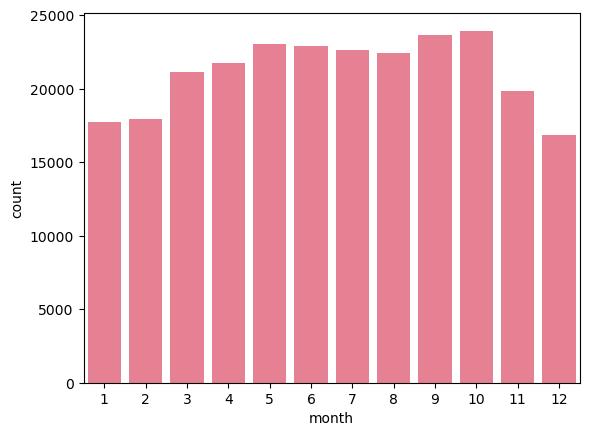

In [14]:
# Plot the number of incidents per month
df_raw['month'] = pd.to_datetime(df_raw['incident_date']).dt.month
sns.countplot(x = 'month', data = df_raw)

### Separating numerical and categorical columns

In [15]:
# Create separate lists for numerical and categorical columns
numeric_columns = df_raw.select_dtypes(include = ['number']).columns.tolist()
categorical_columns = df_raw.select_dtypes(exclude =['number']).columns.tolist()

# Remove identifier and discrete numbers (year)
numeric_columns = [col for col in numeric_columns if col not in ['incident_id', 'data_year']]

print(f"\nNumerical columns ({len(numeric_columns)}): {numeric_columns}")
print(f"Categorical columns ({len(categorical_columns)}): {categorical_columns}")


Numerical columns (8): ['adult_victim_count', 'juvenile_victim_count', 'total_offender_count', 'adult_offender_count', 'juvenile_offender_count', 'victim_count', 'total_individual_victims', 'month']
Categorical columns (19): ['ori', 'pug_agency_name', 'pub_agency_unit', 'agency_type_name', 'state_abbr', 'state_name', 'division_name', 'region_name', 'population_group_code', 'population_group_description', 'incident_date', 'offender_race', 'offender_ethnicity', 'offense_name', 'location_name', 'bias_desc', 'victim_types', 'multiple_offense', 'multiple_bias']


### Check for missing values

Identifying missing values in the data set and visualizing their patterns

In [16]:
# Number and percentage of missing values per column
missing_values = df_raw.isnull().sum()
missing_percentage = (missing_values / len(df_raw)) * 100
missing_info = pd.DataFrame({
    'Missing values': missing_values,
    'Percentage (%)': missing_percentage
})
missing_info = missing_info[missing_info['Missing values'] > 0].sort_values('Percentage (%)', ascending=False)

print("Missing values per column:")
if len(missing_info) > 0:
    display(missing_info)
else:
    print("No missing values found")

Missing values per column:


Missing values  Percentage (%)
pub_agency_unit                       246181       97.007203
juvenile_offender_count               180564       71.150936
adult_offender_count                  180557       71.148178
juvenile_victim_count                 173713       68.451311
adult_victim_count                    171076       67.412206
total_individual_victims                5125        2.019498
population_group_code                    667        0.262830
population_group_description             667        0.262830

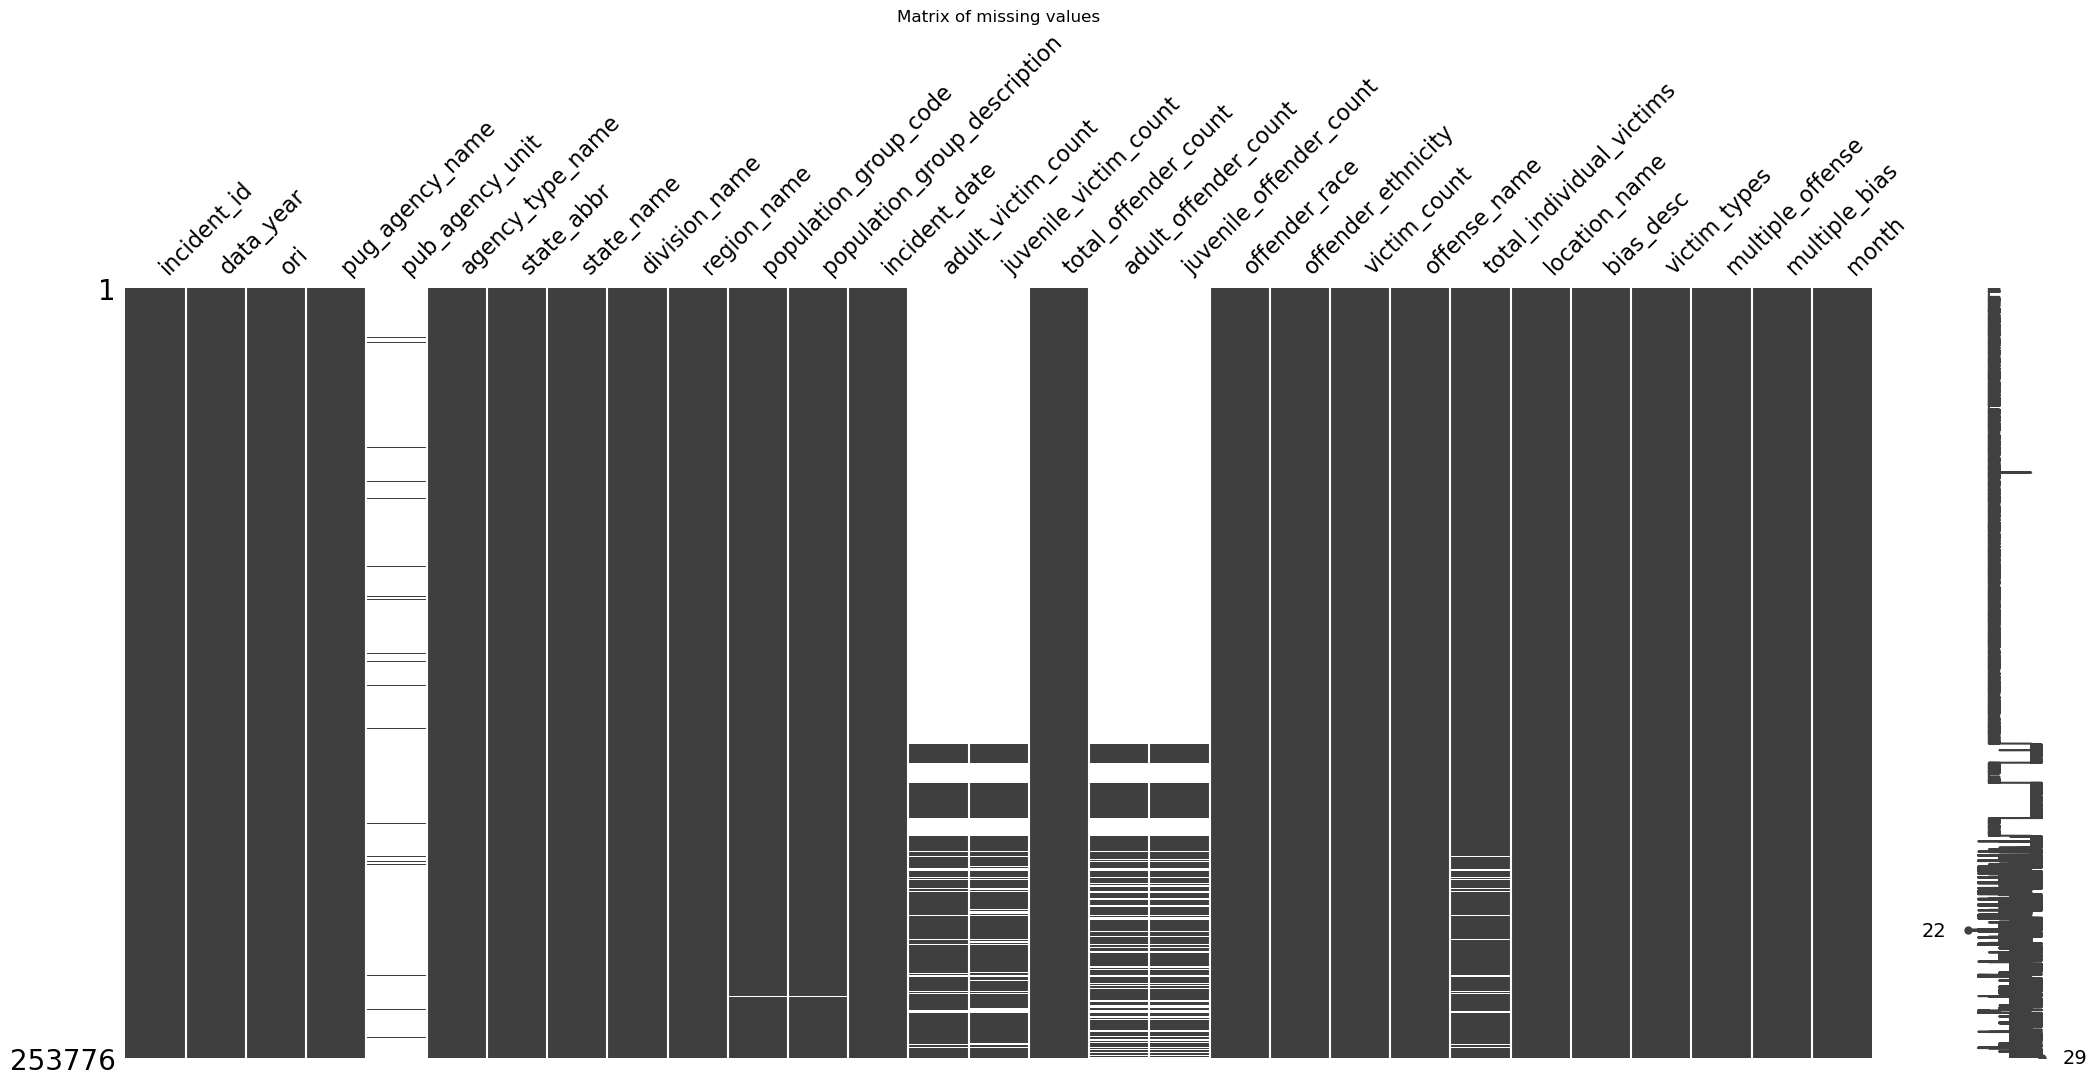

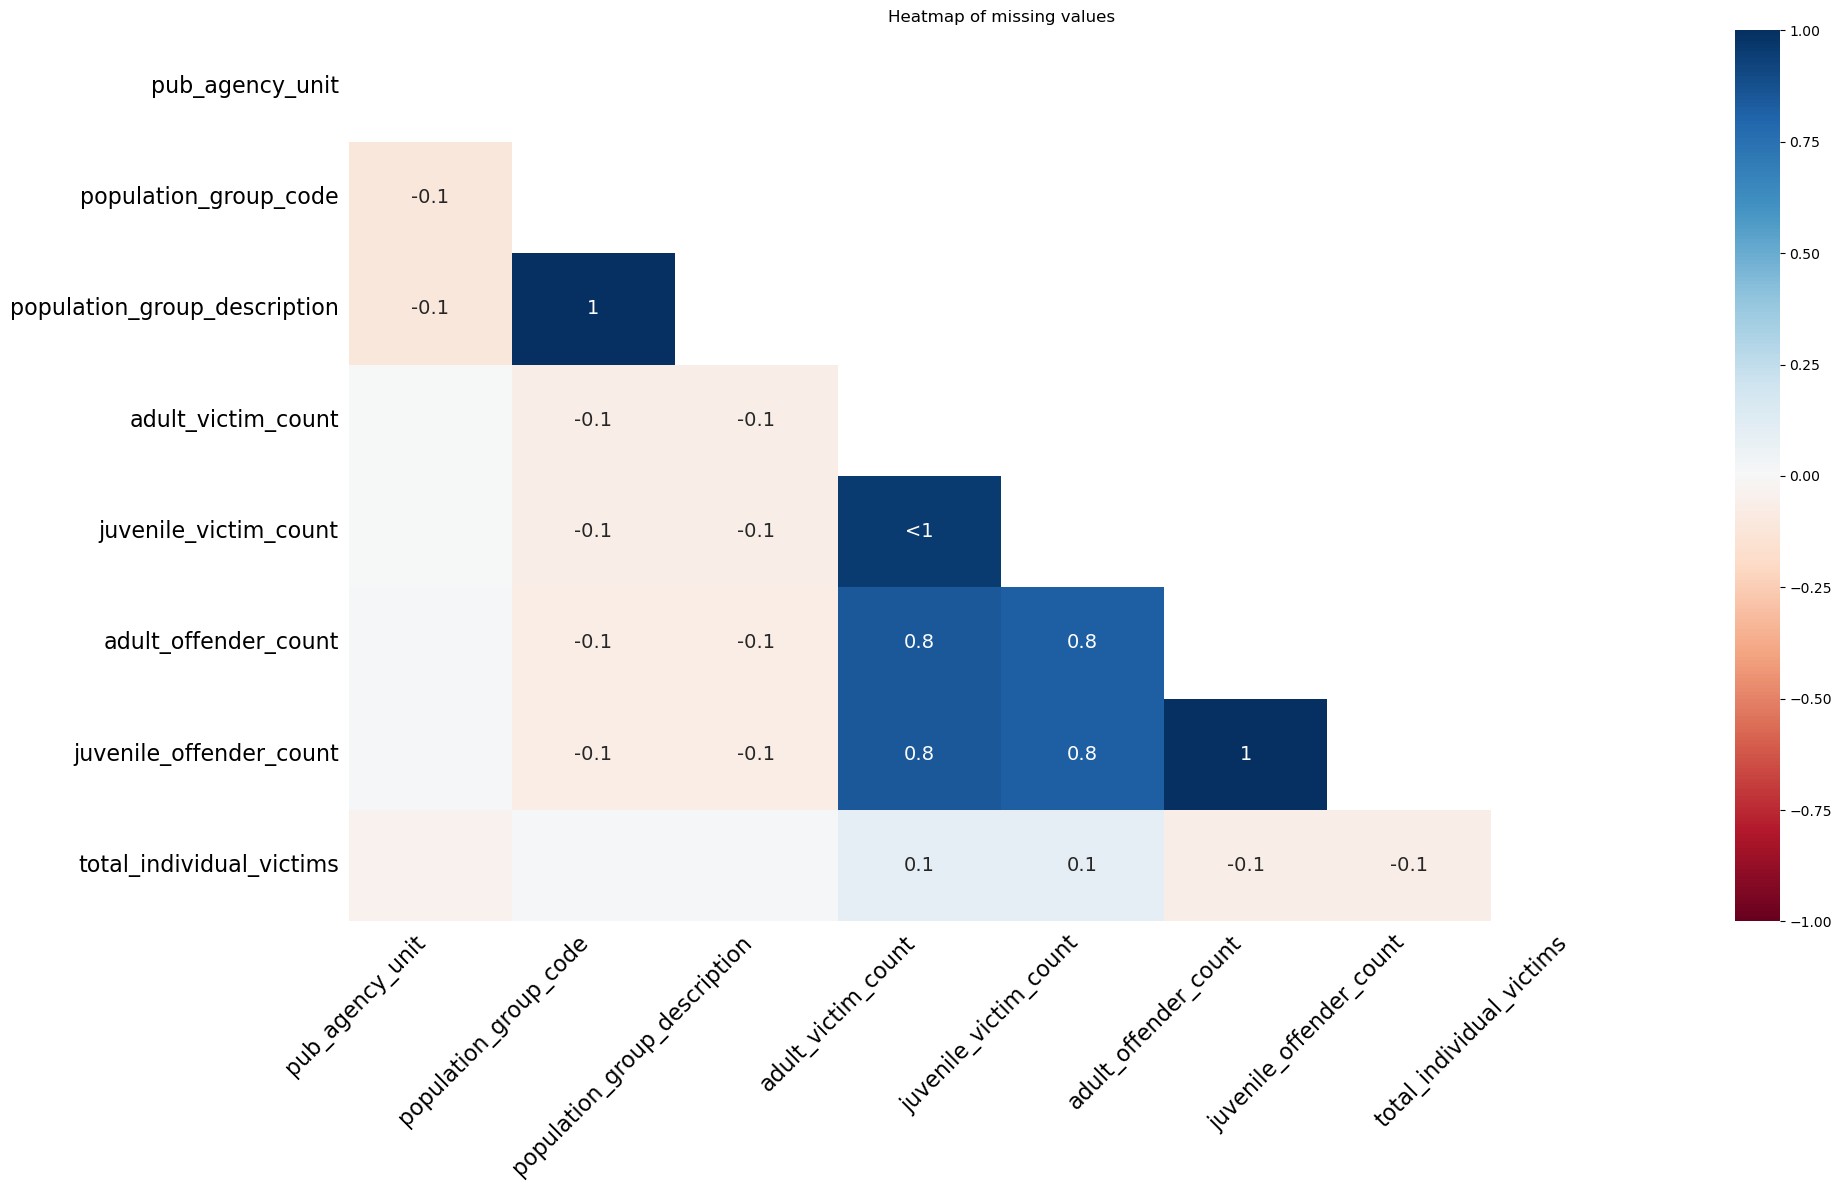

<Figure size 1200x600 with 0 Axes>

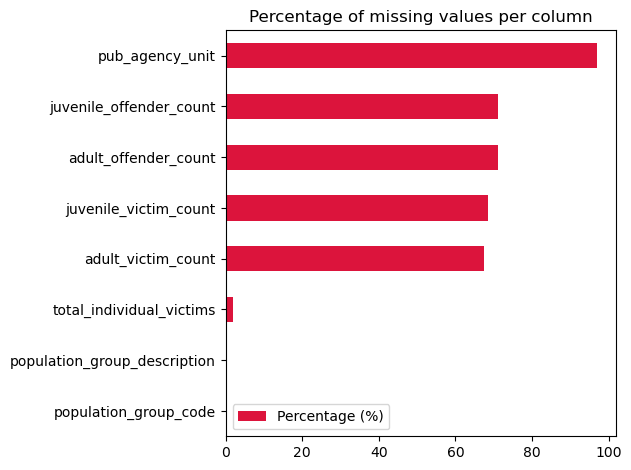

In [17]:
# Visualization of missing values with different plots
    # Matrix
if missing_values.sum() > 0:
    msno.matrix(df_raw)
    plt.title('Matrix of missing values')

    # Heatmap
    plt.subplot(1, 2, 2)
    msno.heatmap(df_raw)
    plt.title('Heatmap of missing values')
    plt.tight_layout()
    plt.show()
    
    # Bar plot
    plt.figure(figsize = (12, 6))
    missing_info.sort_values('Missing values').plot(
        kind = 'barh', y='Percentage (%)', 
        color = 'crimson', 
        title = 'Percentage of missing values per column'
    )
    plt.tight_layout()
    plt.show()


<Figure size 1000x800 with 0 Axes>

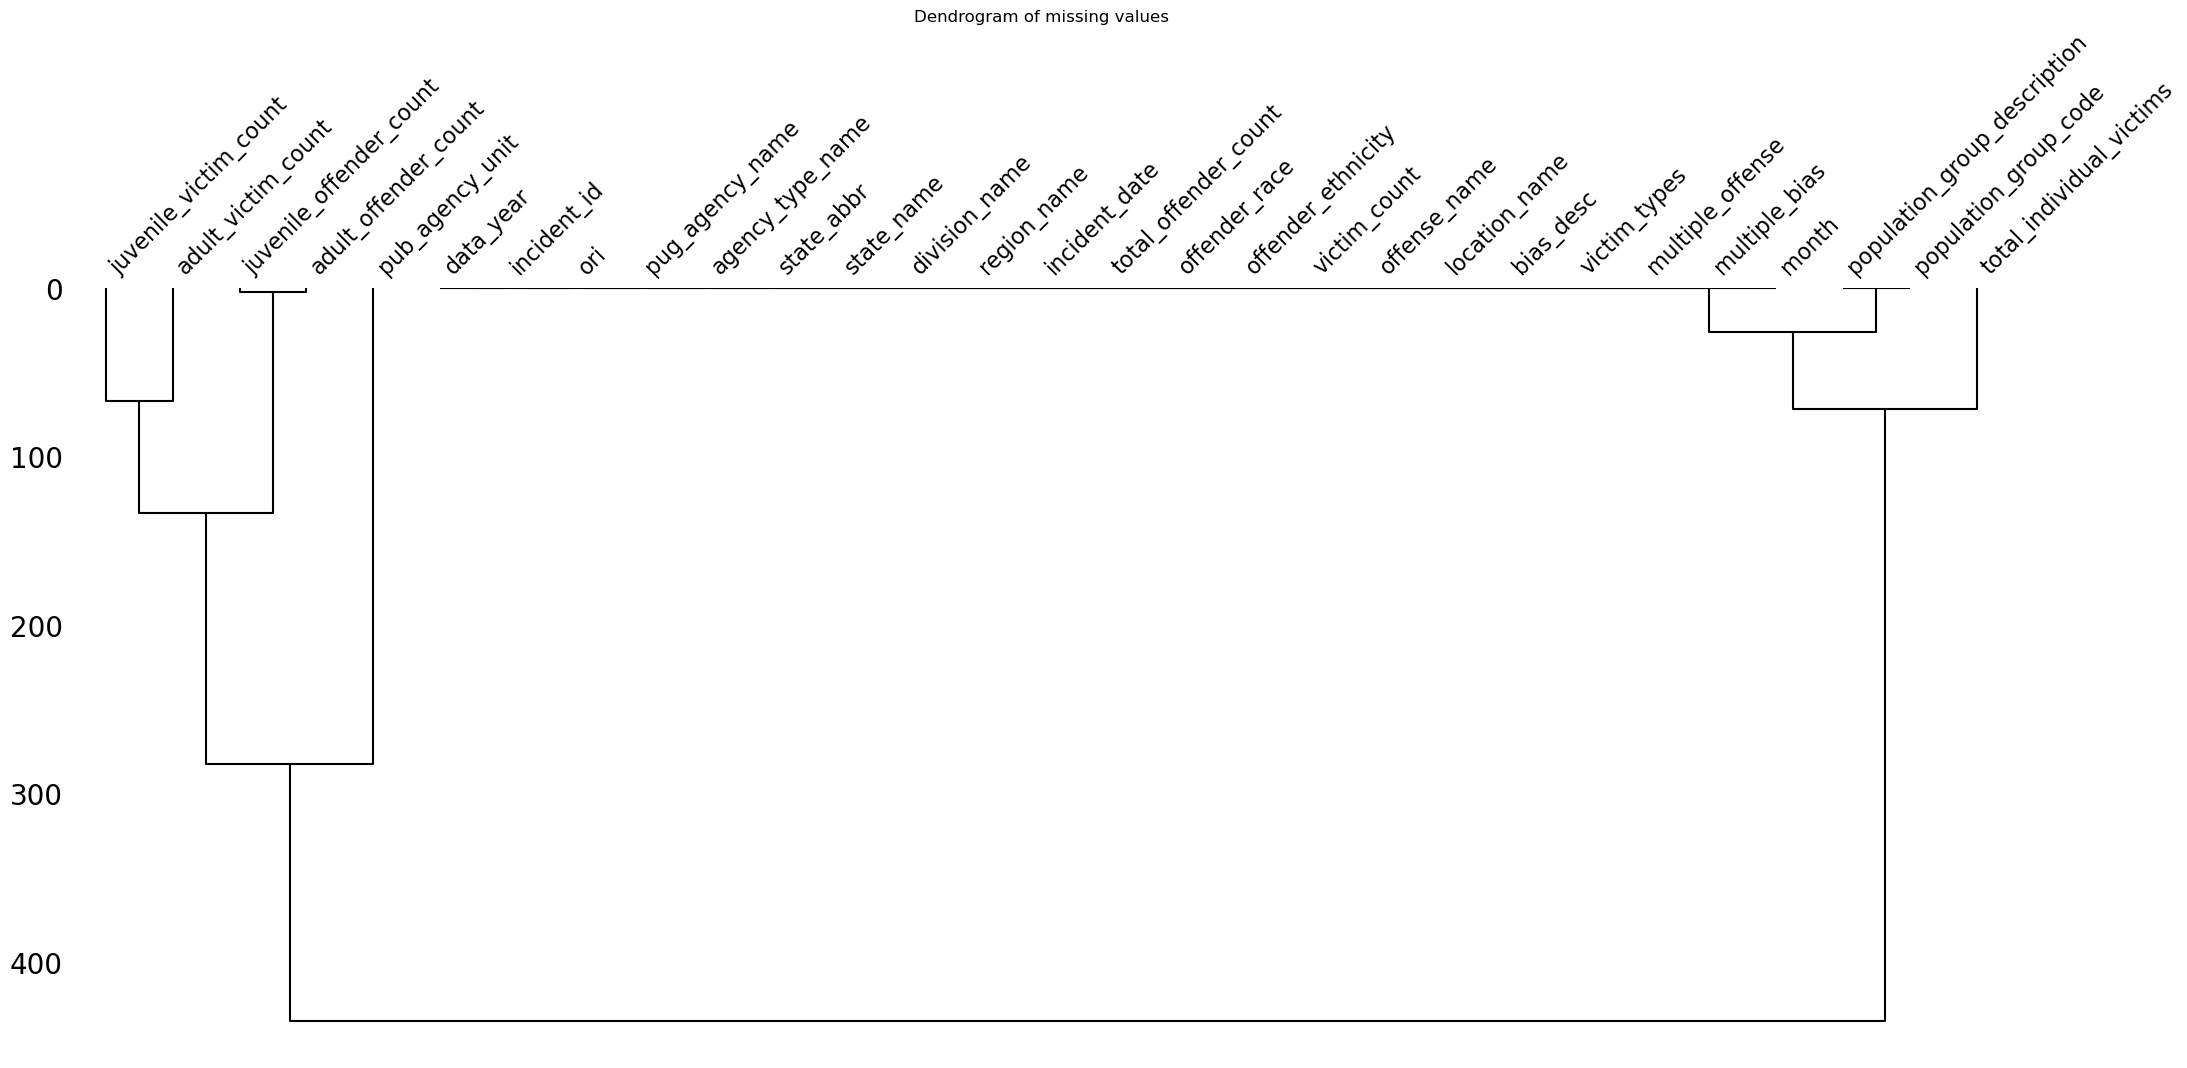

In [18]:
# Visualize relationship between missing values with a dendrogram
plt.figure(figsize = (10, 8))
msno.dendrogram(df_raw)
plt.title('Dendrogram of missing values')
plt.show()

### Grouping values to reduce dimensionality

##### Check and group unique values of 'location_name'

In [19]:
df_raw['location_name'].nunique()
df_raw['location_name'].value_counts().head(50)

location_name
Residence/Home                                                74283
Highway/Road/Alley/Street/Sidewalk                            47202
Other/Unknown                                                 32375
School/College                                                17788
Parking/Drop Lot/Garage                                       14417
Church/Synagogue/Temple/Mosque                                 9546
Commercial/Office Building                                     5711
Restaurant                                                     5446
School-Elementary/Secondary                                    4922
Bar/Nightclub                                                  4305
Government/Public Building                                     3831
Convenience Store                                              3529
Specialty Store                                                2936
Air/Bus/Train Terminal                                         2730
Service/Gas Station               

In [20]:
def simplify_location(name):
    if 'Residence/Home' in name:
        return 'Residence/Home'
    elif 'Highway/Road/Alley/Street/Sidewalk' in name or 'Parking/Drop Lot/Garage' in name:
        return 'Highway/Road/Alley/Street/Sidewalk/Parking'
    elif 'School/College' in name:
        return 'School/College'
    elif 'Church/Synagogue/Temple/Mosque' in name:
        return 'Church/Synagogue/Temple/Mosque'
    elif 'Commercial/Office Building' in name:
        return 'Commercial/Office Building'
    elif 'Restaurant' in name or 'Bar/Nightclub' in name:
        return 'Restaurant/Bar/Nightclub'
    elif 'Government/Public Building' in name:
        return 'Government/Public Building'
    elif 'Store' in name or 'Grocery/Supermarket' in name or 'Shopping Mall' in name:
        return 'Store/Grocery/Supermarket/Shopping Mall'
    else:
        return 'Other'
    
df_raw['location_group'] = df_raw['location_name'].apply(simplify_location)
df_raw['location_group'].nunique()
df_raw['location_group'].value_counts().head(50)

location_group
Residence/Home                                74451
Highway/Road/Alley/Street/Sidewalk/Parking    61746
Other                                         57072
School/College                                17793
Store/Grocery/Supermarket/Shopping Mall       13853
Restaurant/Bar/Nightclub                       9755
Church/Synagogue/Temple/Mosque                 9549
Commercial/Office Building                     5718
Government/Public Building                     3839
Name: count, dtype: int64

##### Check and group unique values of 'offense_name'

In [21]:
df_raw['offense_name'].nunique()
df_raw['offense_name'].value_counts().head(50)

offense_name
Destruction/Damage/Vandalism of Property                                 75192
Intimidation                                                             74049
Simple Assault                                                           49037
Aggravated Assault                                                       26549
Robbery                                                                   4166
Burglary/Breaking & Entering                                              3194
All Other Larceny                                                         2806
Destruction/Damage/Vandalism of Property;Intimidation                     2134
Arson                                                                     1342
Drug/Narcotic Violations                                                  1292
Intimidation;Simple Assault                                                975
Theft From Motor Vehicle                                                   825
Shoplifting                            

In [22]:
def simplify_offense(name):
    if 'Assault' in name:
        return 'Assault'
    elif 'Intimidation' in name:
        return 'Intimidation'
    elif 'Destruction' in name or 'Damage' in name and 'Burglary' not in name:
        return 'Vandalism'
    elif 'Robbery' in name:
        return 'Robbery'
    elif 'Burglary' in name or 'Larceny' in name or 'Theft' in name:
        return 'Burglary/Larceny/Theft'
    elif 'Arson' in name:
        return 'Arson'
    elif 'Drug' in name or 'Narcotic' in name:
        return 'Drug/Narcotic'
    else:
        return 'Other'
    
df_raw['offense_group'] = df_raw['offense_name'].apply(simplify_offense)
df_raw['offense_group'].nunique()
df_raw['offense_group'].value_counts().head(50)


offense_group
Assault                   79997
Intimidation              76646
Vandalism                 76539
Burglary/Larceny/Theft     8601
Other                      4609
Robbery                    4247
Drug/Narcotic              1789
Arson                      1348
Name: count, dtype: int64

##### Check and group unique values of 'victim_types'

In [23]:
df_raw['victim_types'].nunique()
df_raw['victim_types'].value_counts().head(50)

victim_types
Individual                                            200725
Other                                                  14843
Business                                               11953
Government                                              7507
Religious Organization                                  6909
Society/Public                                          5631
Individual;Other                                        1608
Unknown                                                 1406
Business;Individual                                     1118
Individual;Society/Public                                517
Law Enforcement Officer                                  496
Individual;Religious Organization                        263
Government;Individual                                    251
Individual;Law Enforcement Officer                       122
Financial Institution                                    105
Business;Government                                       60
Individual;

In [24]:
def simplify_victim_types(name):
    if name.strip() == 'Individual':
        return 'Individual'
    elif name.strip() == 'Business':
        return 'Business'
    elif name.strip() == 'Government':
        return 'Government'
    elif name.strip() == 'Religious Organization':
        return 'Religious Organization'
    elif name.strip() == 'Society/Public':
        return 'Society/Public'
    else:
        return 'Other/Mix'
    
df_raw['victim_types_group'] = df_raw['victim_types'].apply(simplify_victim_types)
df_raw['victim_types_group'].nunique()
df_raw['victim_types_group'].value_counts().head(50)

victim_types_group
Individual                200725
Other/Mix                  21051
Business                   11953
Government                  7507
Religious Organization      6909
Society/Public              5631
Name: count, dtype: int64

##### Check and group unique values of 'bias_desc'

In [25]:
df_raw['bias_desc'].nunique()
df_raw['bias_desc'].value_counts().head(50)

bias_desc
Anti-Black or African American                                                              84531
Anti-Jewish                                                                                 31832
Anti-White                                                                                  27957
Anti-Gay (Male)                                                                             24926
Anti-Hispanic or Latino                                                                     16253
Anti-Other Race/Ethnicity/Ancestry                                                          11904
Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)                                    8741
Anti-Asian                                                                                   8104
Anti-Multiple Races, Group                                                                   5845
Anti-Lesbian (Female)                                                                        5048
Anti-Islam

In [26]:
def simplify_bias_desc (name):
    if name.strip() == 'Anti-Black or African American':
        return 'Anti-Black or African American'
    elif name.strip() == 'Anti-Jewish':
        return 'Anti-Jewish'
    elif name.strip() == 'Anti-White':
        return 'Anti-White'
    elif name.strip() == 'Anti-Gay (Male)' or name.strip() == 'Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)' or name.strip() == 'Anti-Lesbian (Female)' or name.strip() == 'Anti-Transgender' or name.strip() == 'Anti-Bisexual' or name.strip() == 'Anti-Heterosexual' or name.strip() == 'Anti-Heterosexual (Mixed Group)' or name.strip() == 'Anti_Gender Conforming':
        return 'Sexuality/Anti-LGBTQ+'
    elif name.strip() == 'Anti-Asian':
        return 'Anti-Asian'
    elif name.strip() == 'Anti-Hispanic or Latino':
        return 'Anti-Hispanic or Latino'
    elif name.strip() == 'Anti-Islamic (Muslim)':
        return 'Anti-Islamic (Muslim)'
    elif name.strip() == 'Anti-American Indian or Alaska Native':
        return 'Anti-American Indian or Alaska Native'
    else:
        return 'Other/Mix'
    
df_raw['bias_desc_group'] = df_raw['bias_desc'].apply(simplify_bias_desc)
df_raw['bias_desc_group'].nunique()
df_raw['bias_desc_group'].value_counts().head(50)

bias_desc_group
Anti-Black or African American           84531
Sexuality/Anti-LGBTQ+                    41866
Other/Mix                                35967
Anti-Jewish                              31832
Anti-White                               27957
Anti-Hispanic or Latino                  16253
Anti-Asian                                8104
Anti-Islamic (Muslim)                     4467
Anti-American Indian or Alaska Native     2799
Name: count, dtype: int64

##### Check unique values of 'offender_race'

In [27]:
df_raw['offender_race'].nunique()
df_raw['offender_race'].value_counts().head(50)

offender_race
White                                        99689
Unknown                                      98890
Black or African American                    33599
Not Specified                                12734
Multiple                                      5243
Asian                                         1979
American Indian or Alaska Native              1467
Native Hawaiian or Other Pacific Islander      175
Name: count, dtype: int64

##### Check if 'offender_race' and 'offender_ethnicity' should both be kept

In [28]:
pd.crosstab(df_raw['offender_race'], df_raw['offender_ethnicity'])

offender_ethnicity                         Hispanic or Latino  Multiple  \
offender_race                                                             
American Indian or Alaska Native                           18         4   
Asian                                                       4        14   
Black or African American                                  74       126   
Multiple                                                  420       334   
Native Hawaiian or Other Pacific Islander                   3         7   
Not Specified                                               0         0   
Unknown                                                   703       207   
White                                                    2691       389   

offender_ethnicity                         Not Hispanic or Latino  \
offender_race                                                       
American Indian or Alaska Native                              237   
Asian                                                         308   
Black or African American                                    4780   
Multiple                                                      365   
Native Hawaiian or Other Pacific Islander                     116   
Not Specified                                                   0   
Unknown                                                       235   
White                                                       10720   

offender_ethnicity                         Not Specified  Unknown  
offender_race                                                      
American Indian or Alaska Native                    1077      131  
Asian                                               1489      164  
Black or African American                          25652     2967  
Multiple                                            3892      232  
Native Hawaiian or Other Pacific Islander             26       23  
Not Specified                                      12717       17  
Unknown                                            85161    12584  
White                                              79185     6704

### Removing IDs, redundant, highly correlated and unnecessary data

In [29]:
# Removing redundant columns ('ori', 'state_abbr', state_name, 'population_group_code', division_name)
# Removing administrative data (incident_id)
# Removing columns with many missing values, free text, time info and unnecessary data (month, data_year, incident_date, pug_agency_name, pub_agency_unit, adult_offender_count', juvenile_offender_count, adult_victim_count, juvenile_victim_count)

drop_columns = [
    'incident_id', 'month', 'data_year', 'ori', 'pug_agency_name', 'pub_agency_unit',
    'state_abbr', 'state_name', 'population_group_code', 'division_name', 'incident_date',
    'offense_name', 'location_name', 'bias_desc', 'victim_types', 'adult_offender_count', 'juvenile_offender_count',
    'adult_victim_count', 'juvenile_victim_count'
]


df_clean = df_raw.drop(drop_columns, axis=1)
df_clean.head(25)

agency_type_name region_name      population_group_description  \
0              City       South    Cities from 50,000 thru 99,999   
1              City       South    Cities from 50,000 thru 99,999   
2              City       South    Cities from 50,000 thru 99,999   
3              City       South    Cities from 50,000 thru 99,999   
4            County       South     Non-MSA counties under 10,000   
5              City       South    Cities from 10,000 thru 24,999   
6              City       South      Cities from 2,500 thru 9,999   
7              City       South    Cities from 50,000 thru 99,999   
8              City       South    Cities from 50,000 thru 99,999   
9              City       South  Cities from 100,000 thru 249,999   
10             City       South    Cities from 50,000 thru 99,999   
11             City       South    Cities from 50,000 thru 99,999   
12             City        West  Cities from 500,000 thru 999,999   
13             City        West  Cities from 500,000 thru 999,999   
14             City        West  Cities from 500,000 thru 999,999   
15             City        West  Cities from 500,000 thru 999,999   
16             City        West  Cities from 500,000 thru 999,999   
17             City        West  Cities from 500,000 thru 999,999   
18             City        West  Cities from 500,000 thru 999,999   
19             City        West  Cities from 500,000 thru 999,999   
20             City        West  Cities from 500,000 thru 999,999   
21             City        West  Cities from 500,000 thru 999,999   
22             City        West  Cities from 500,000 thru 999,999   
23             City        West  Cities from 500,000 thru 999,999   
24             City        West  Cities from 500,000 thru 999,999   

    total_offender_count              offender_race offender_ethnicity  \
0                      1  Black or African American      Not Specified   
1                      1  Black or African American      Not Specified   
2                      1  Black or African American      Not Specified   
3                      2  Black or African American      Not Specified   
4                      1                      White      Not Specified   
5                      1                      White      Not Specified   
6                      1  Black or African American      Not Specified   
7                      1  Black or African American      Not Specified   
8                      1  Black or African American      Not Specified   
9                      2  Black or African American      Not Specified   
10                    10  Black or African American      Not Specified   
11                     2  Black or African American      Not Specified   
12                     0                    Unknown      Not Specified   
13                     1                    Unknown      Not Specified   
14                     1                    Unknown      Not Specified   
15                     1                      White      Not Specified   
16                     0                    Unknown      Not Specified   
17                     1                    Unknown      Not Specified   
18                     1                      White      Not Specified   
19                     1                      White      Not Specified   
20                     0                    Unknown      Not Specified   
21                     1                      White      Not Specified   
22                     1                    Unknown      Not Specified   
23                     1                      White      Not Specified   
24                     0                    Unknown      Not Specified   

    victim_count  total_individual_victims multiple_offense multiple_bias  \
0              1                       1.0                S             S   
1              2                       1.0                M             S   
2              2                       2.0          

In [30]:
# New size of the dataset
print(f"\nSize of the dataset: {df_clean.shape[0]} rows and {df_clean.shape[1]} columns")


Size of the dataset: 253776 rows and 14 columns


### Removing NaNs

In [31]:
# Check for missing values in the cleaned dataset
df_clean.isnull().sum()

agency_type_name                   0
region_name                        0
population_group_description     667
total_offender_count               0
offender_race                      0
offender_ethnicity                 0
victim_count                       0
total_individual_victims        5125
multiple_offense                   0
multiple_bias                      0
location_group                     0
offense_group                      0
victim_types_group                 0
bias_desc_group                    0
dtype: int64

In [32]:
# Remove rows with missing values
df_clean = df_clean.dropna()

In [33]:
# Check again for missing values in the cleaned dataset
df_clean.isnull().sum()

agency_type_name                0
region_name                     0
population_group_description    0
total_offender_count            0
offender_race                   0
offender_ethnicity              0
victim_count                    0
total_individual_victims        0
multiple_offense                0
multiple_bias                   0
location_group                  0
offense_group                   0
victim_types_group              0
bias_desc_group                 0
dtype: int64

In [34]:
# New size of the dataset
print(f"\nSize of the dataset: {df_clean.shape[0]} rows and {df_clean.shape[1]} columns")


Size of the dataset: 248024 rows and 14 columns


### Create new lists for numerical and categorical columns after clean-up

In [35]:
# Create new lists for numerical and categorical columns
numeric_columns = df_clean.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df_clean.select_dtypes(exclude=['number']).columns.tolist()

print(f"\nNumerical columns ({len(numeric_columns)}): {numeric_columns}")
print(f"Categorical columns ({len(categorical_columns)}): {categorical_columns}")


Numerical columns (3): ['total_offender_count', 'victim_count', 'total_individual_victims']
Categorical columns (11): ['agency_type_name', 'region_name', 'population_group_description', 'offender_race', 'offender_ethnicity', 'multiple_offense', 'multiple_bias', 'location_group', 'offense_group', 'victim_types_group', 'bias_desc_group']


## Univariate analysis - Distributions of individual variables

### Statistical summary and visualizations that show the distribution of each individual variable

In [36]:
# Statistical summary for numerical columns
if len(numeric_columns) > 0:
    print("\nStatistical summary for numerical columns:")
    display(df_clean[numeric_columns].describe().T)


Statistical summary for numerical columns:


count      mean       std  min  25%  50%  75%  \
total_offender_count      248024.0  0.956089  1.308248  0.0  0.0  1.0  1.0   
victim_count              248024.0  1.037642  0.204975  1.0  1.0  1.0  1.0   
total_individual_victims  248024.0  0.987074  1.054734  0.0  1.0  1.0  1.0   

                            max  
total_offender_count       99.0  
victim_count                5.0  
total_individual_victims  147.0

In [37]:
# Distributions for categorical columns
if len(categorical_columns) > 0:
    print("\nDistributions for categorical columns:")
    for col in categorical_columns:
        print(f"\n{col}:")
        display(df_clean[col].value_counts().head(10))  # Top 10
        print(f"Number of unique values: {df_clean[col].nunique()}")


Distributions for categorical columns:

agency_type_name:


agency_type_name
City                     198124
County                    36113
University or College      8240
State Police               3229
Other                      1622
Other State Agency          434
Federal                     135
Tribal                      127
Name: count, dtype: int64

Number of unique values: 8

region_name:


region_name
West                76945
Northeast           68350
South               53052
Midwest             49520
Other                 132
U.S. Territories       25
Name: count, dtype: int64

Number of unique values: 6

population_group_description:


population_group_description
Cities 1,000,000 or over            34421
Cities from 50,000 thru 99,999      27902
Cities from 25,000 thru 49,999      27711
Cities from 500,000 thru 999,999    24668
Cities from 10,000 thru 24,999      24403
Cities from 100,000 thru 249,999    24011
MSA counties 100,000 or over        22806
Cities from 250,000 thru 499,999    17073
Cities from 2,500 thru 9,999        15073
Cities under 2,500                  12982
Name: count, dtype: int64

Number of unique values: 20

offender_race:


offender_race
White                                        98826
Unknown                                      94432
Black or African American                    33365
Not Specified                                12701
Multiple                                      5132
Asian                                         1944
American Indian or Alaska Native              1455
Native Hawaiian or Other Pacific Islander      169
Name: count, dtype: int64

Number of unique values: 8

offender_ethnicity:


offender_ethnicity
Not Specified             206636
Unknown                    20176
Not Hispanic or Latino     16376
Hispanic or Latino          3773
Multiple                    1063
Name: count, dtype: int64

Number of unique values: 5

multiple_offense:


multiple_offense
S    239346
M      8678
Name: count, dtype: int64

Number of unique values: 2

multiple_bias:


multiple_bias
S    246221
M      1803
Name: count, dtype: int64

Number of unique values: 2

location_group:


location_group
Residence/Home                                73843
Highway/Road/Alley/Street/Sidewalk/Parking    61264
Other                                         53828
School/College                                17707
Store/Grocery/Supermarket/Shopping Mall       13697
Restaurant/Bar/Nightclub                       9615
Church/Synagogue/Temple/Mosque                 8811
Commercial/Office Building                     5565
Government/Public Building                     3694
Name: count, dtype: int64

Number of unique values: 9

offense_group:


offense_group
Assault                   79789
Intimidation              76385
Vandalism                 71648
Burglary/Larceny/Theft     8524
Other                      4467
Robbery                    4172
Drug/Narcotic              1784
Arson                      1255
Name: count, dtype: int64

Number of unique values: 8

victim_types_group:


victim_types_group
Individual                200185
Other/Mix                  18345
Business                   11037
Government                  6697
Religious Organization      6140
Society/Public              5620
Name: count, dtype: int64

Number of unique values: 6

bias_desc_group:


bias_desc_group
Anti-Black or African American           83203
Sexuality/Anti-LGBTQ+                    41415
Other/Mix                                34776
Anti-Jewish                              29522
Anti-White                               27840
Anti-Hispanic or Latino                  16177
Anti-Asian                                7934
Anti-Islamic (Muslim)                     4366
Anti-American Indian or Alaska Native     2791
Name: count, dtype: int64

Number of unique values: 9


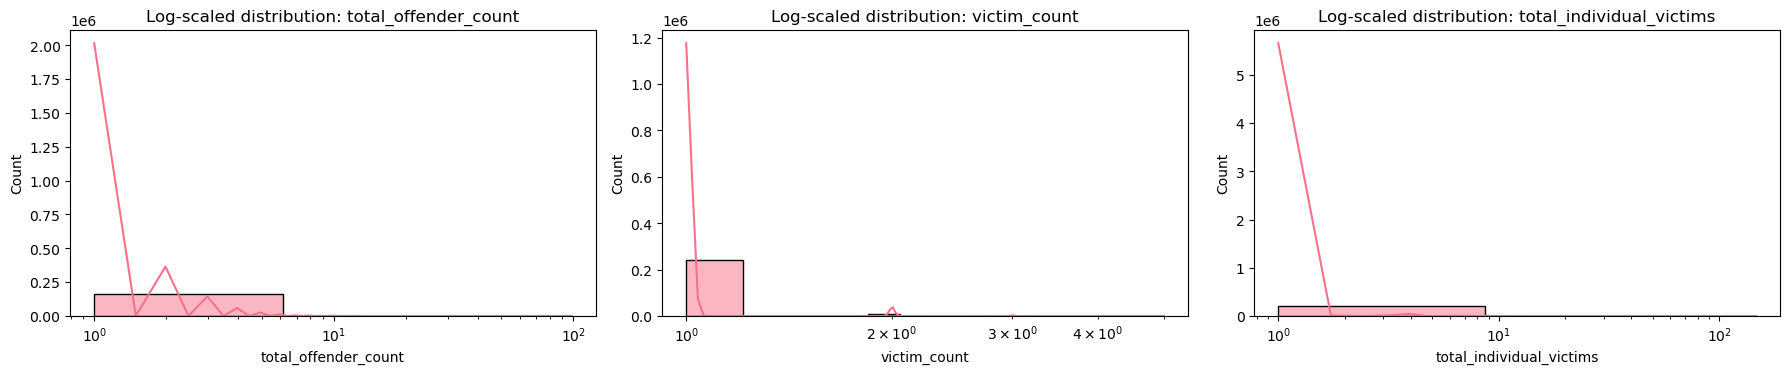

In [38]:
# Histograms for offender, victim, and individual victim counts
# X-axis is log-scaled to address heavy right skew in the data
# Only positive values are considered to enable log transformation
if len(numeric_columns) > 0:
    rows = int(np.ceil(len(numeric_columns) / 3))
    plt.figure(figsize=(18, rows * 4))
    for i, column in enumerate(numeric_columns):
        plt.subplot(rows, 3, i+1)
        data = df_clean[column].dropna()
        data = data[data > 0]
        sns.histplot(data, kde=True)
        plt.xscale('log') 
        plt.title(f'Log-scaled distribution: {column}')
    plt.tight_layout()
    plt.show()

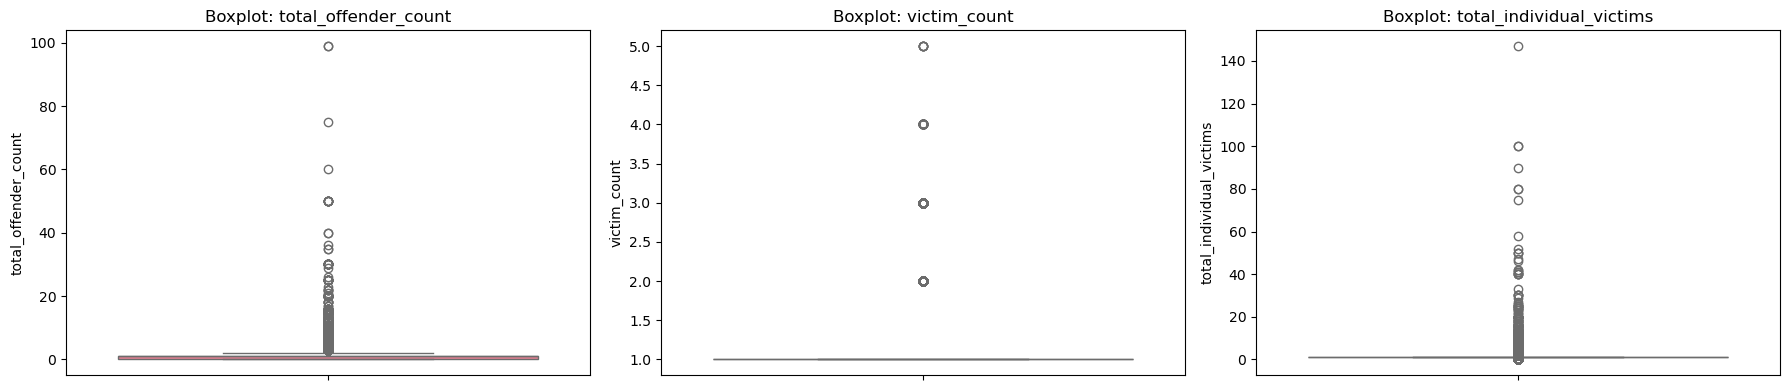

In [39]:
# Box-Plots for numerical variables
if len(numeric_columns) > 0:
    rows = int(np.ceil(len(numeric_columns) / 3))
    plt.figure(figsize=(18, rows * 4))
    for i, column in enumerate(numeric_columns):
        plt.subplot(rows, 3, i+1)
        sns.boxplot(y = df_clean[column].dropna())
        plt.title(f'Boxplot: {column}')
    plt.tight_layout()
    plt.show()

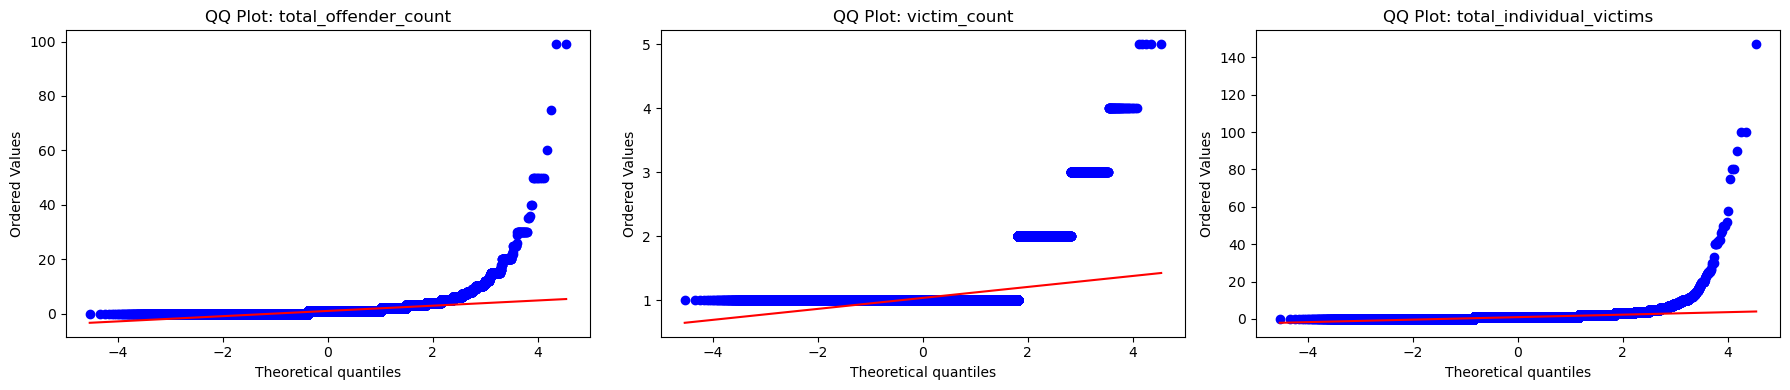

In [40]:
# Quantile-Quantile (QQ) plot for numeric variables
if len(numeric_columns) > 0:
    rows = int(np.ceil(len(numeric_columns) / 3))
    plt.figure(figsize=(18, rows * 4))

    for i, column in enumerate(numeric_columns):
        data = df_clean[column].dropna()
        plt.subplot(rows, 3, i + 1)
        stats.probplot(data, dist = "norm", plot=plt)
        plt.title(f'QQ Plot: {column}')

    plt.tight_layout()
    plt.show()

None of the variables are normally distributed. They show strong right skew and contain outliers.

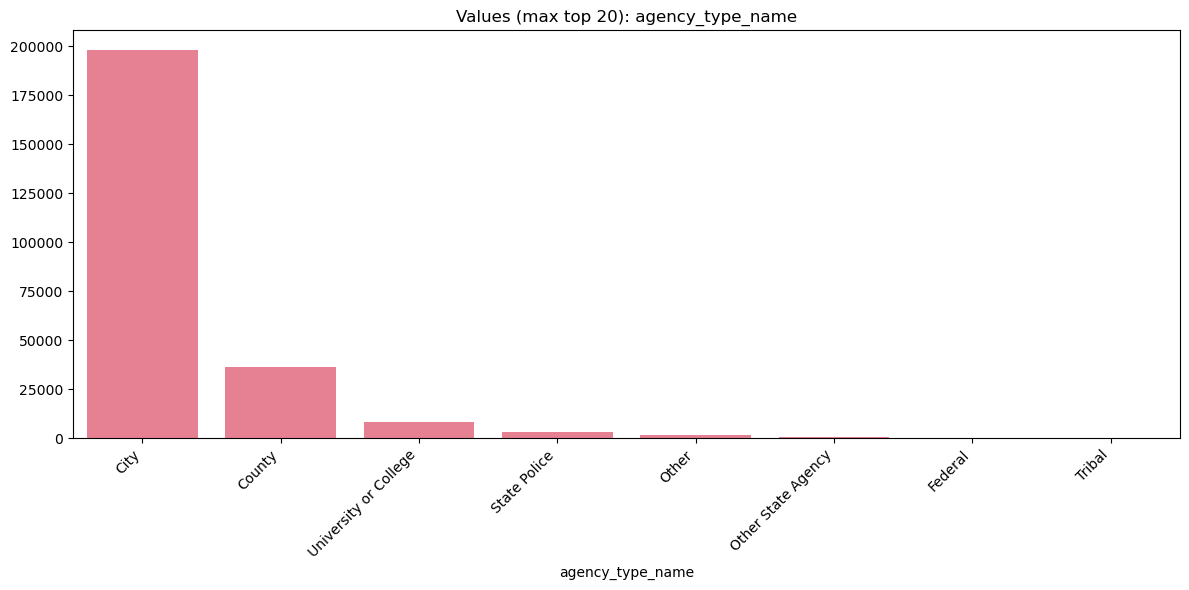

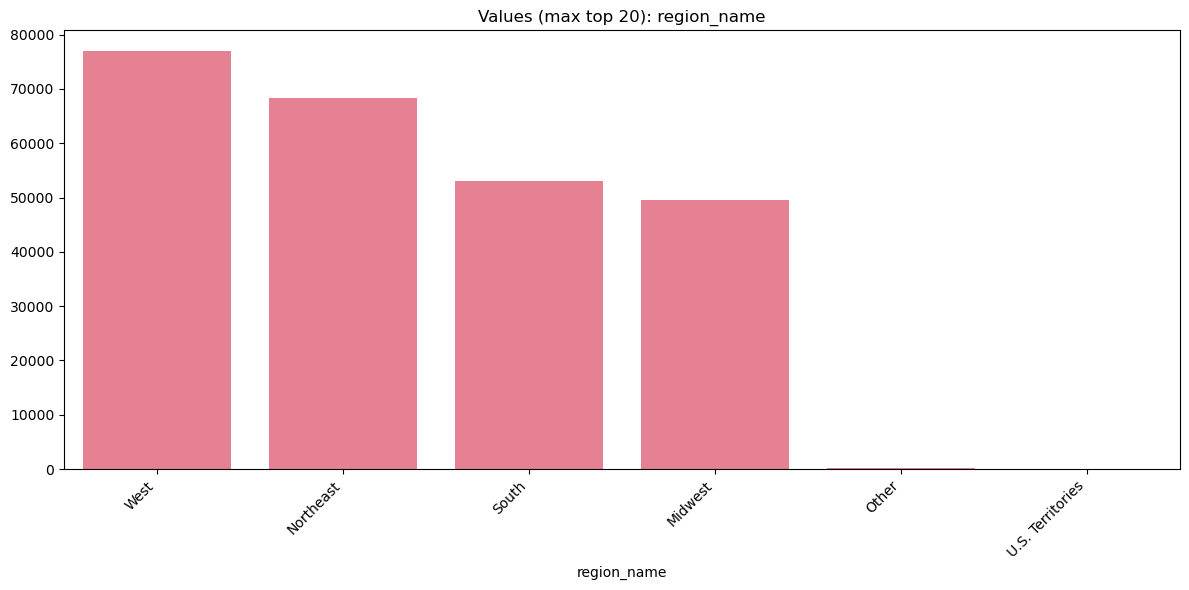

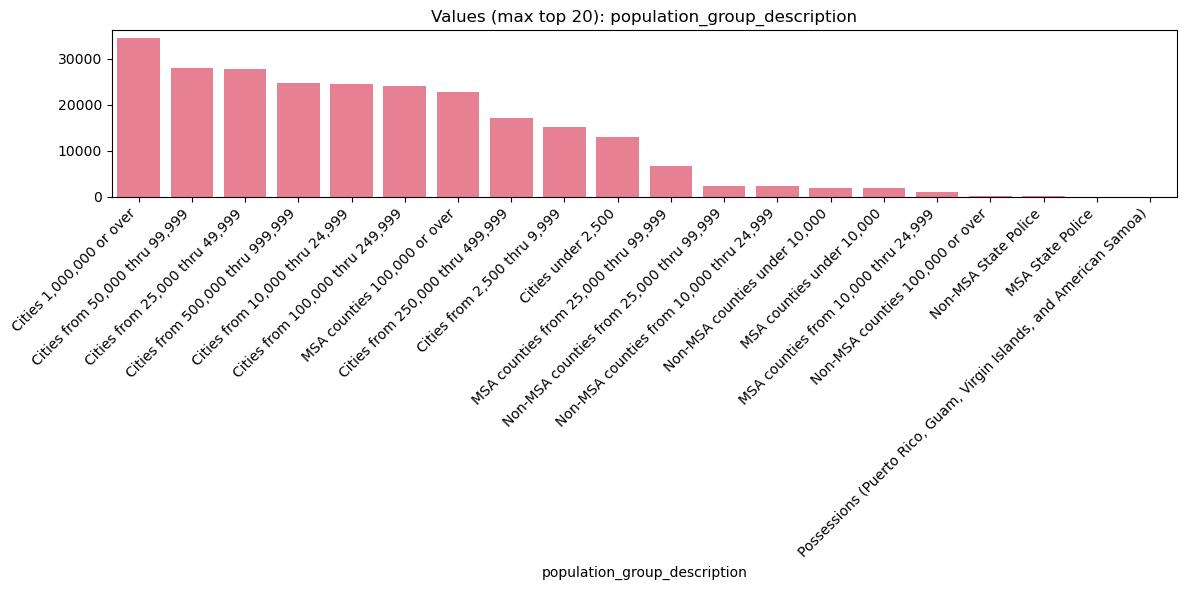

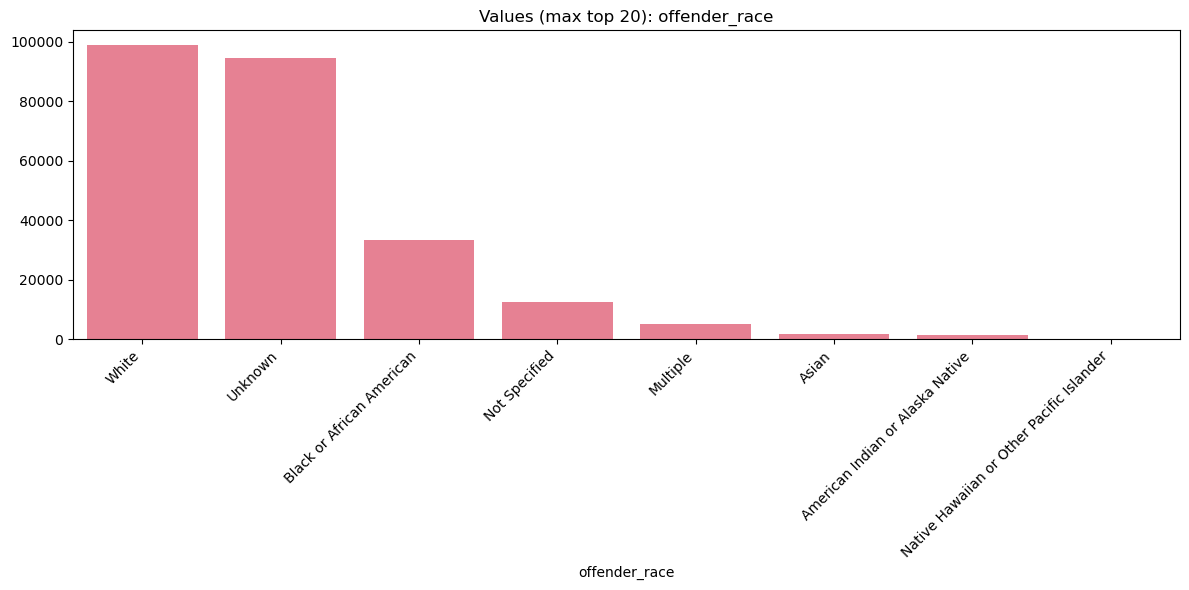

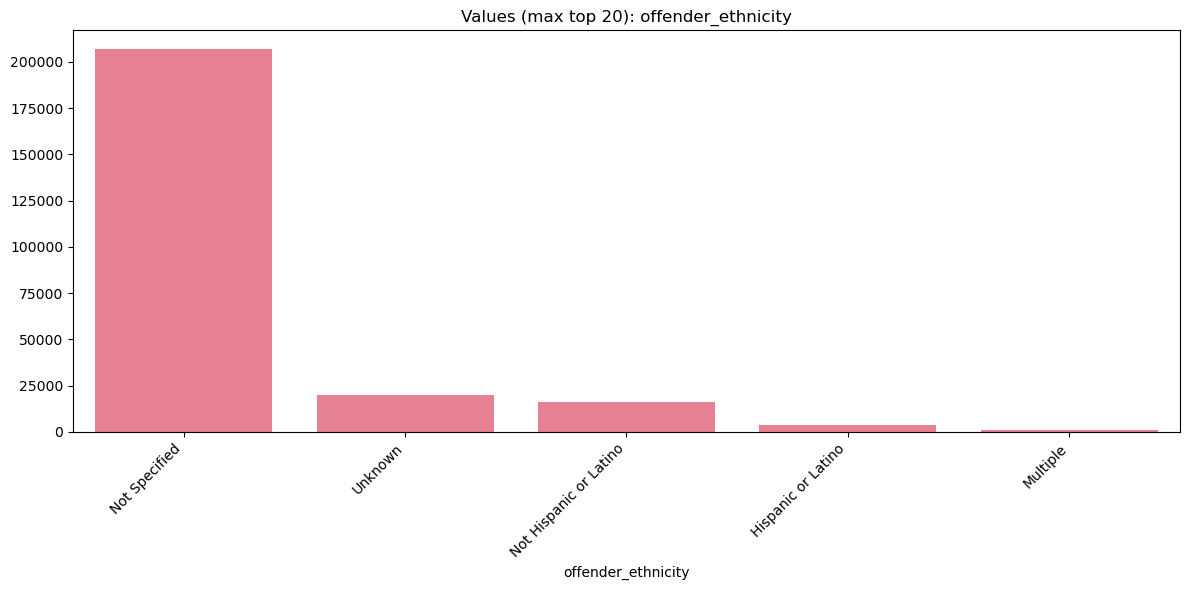

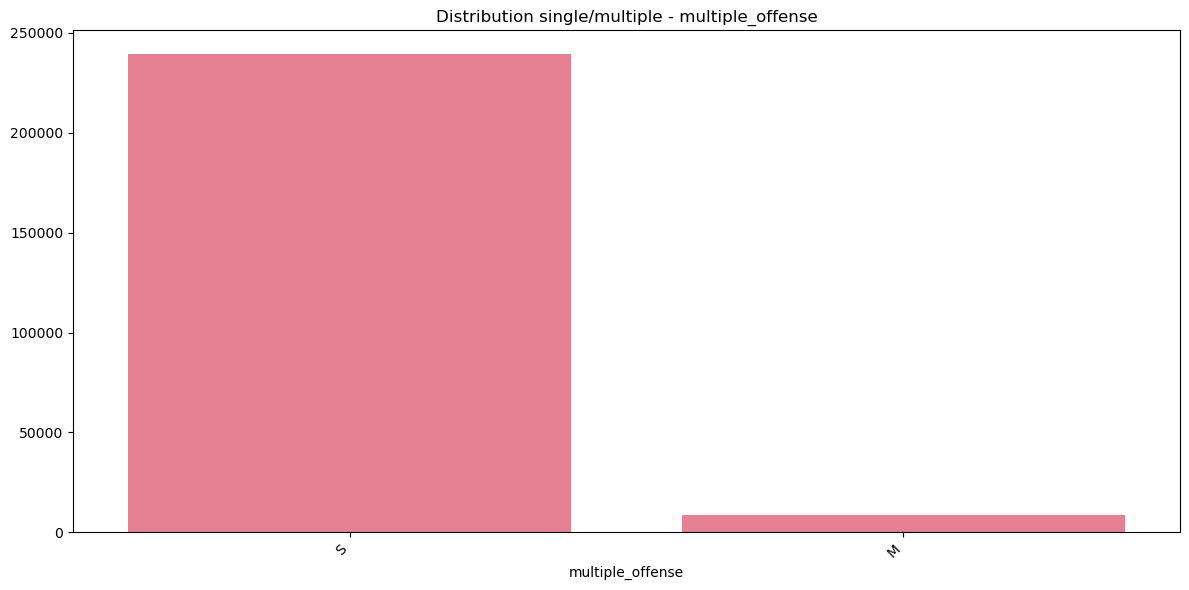

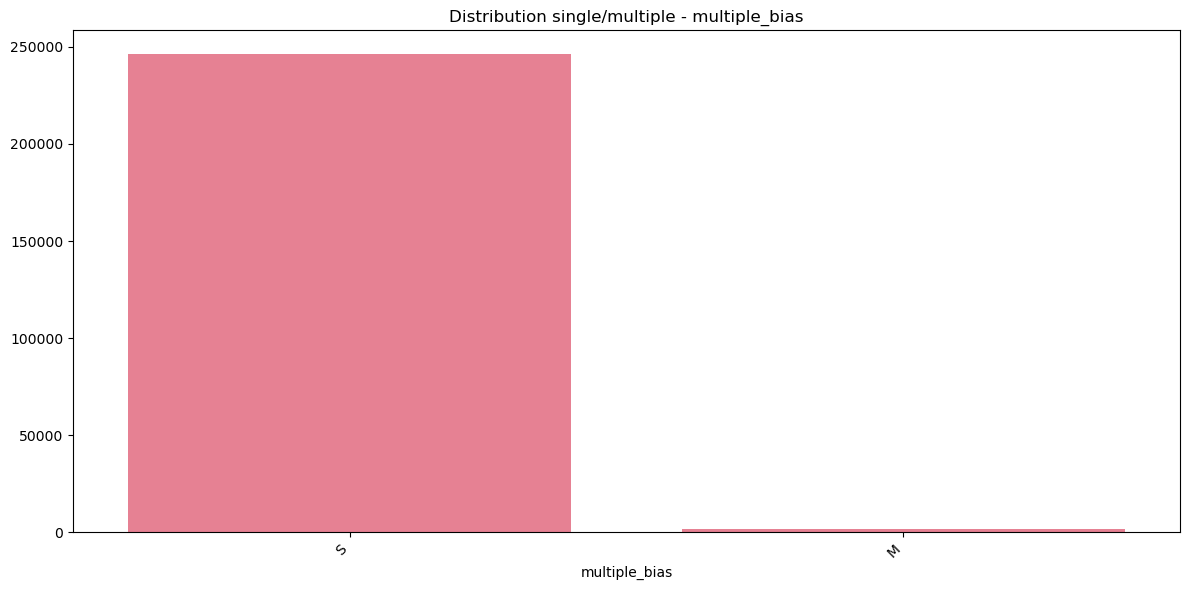

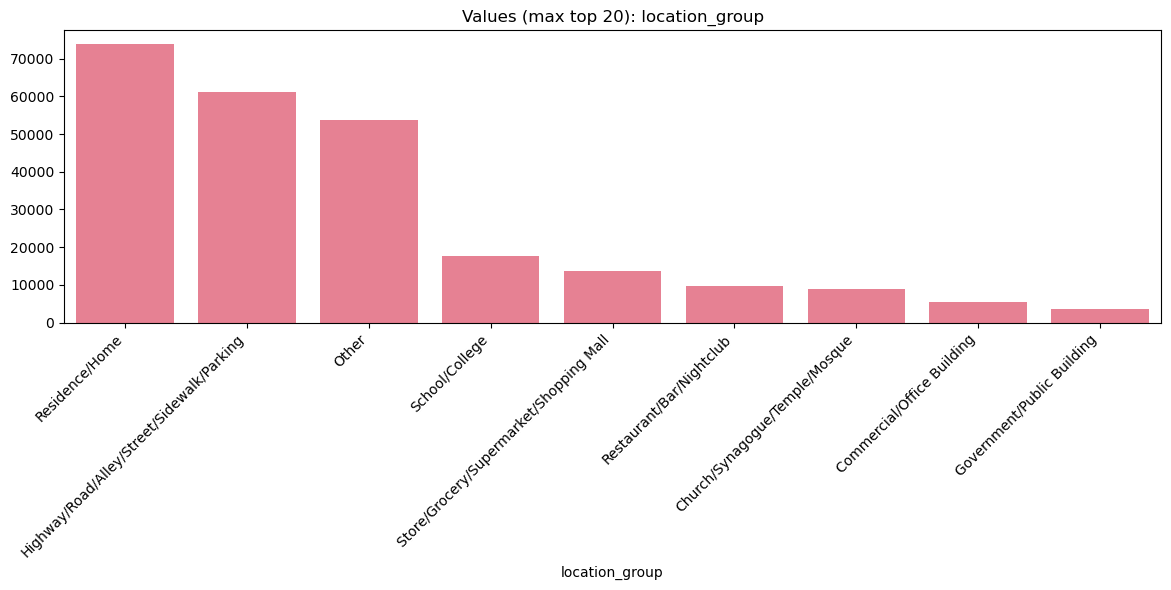

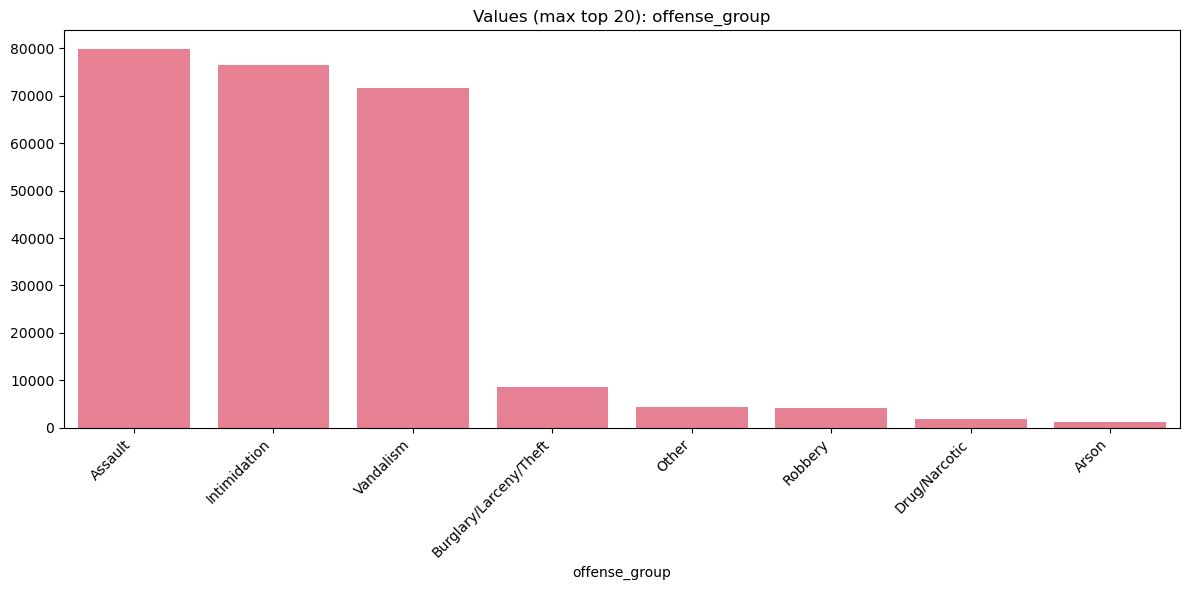

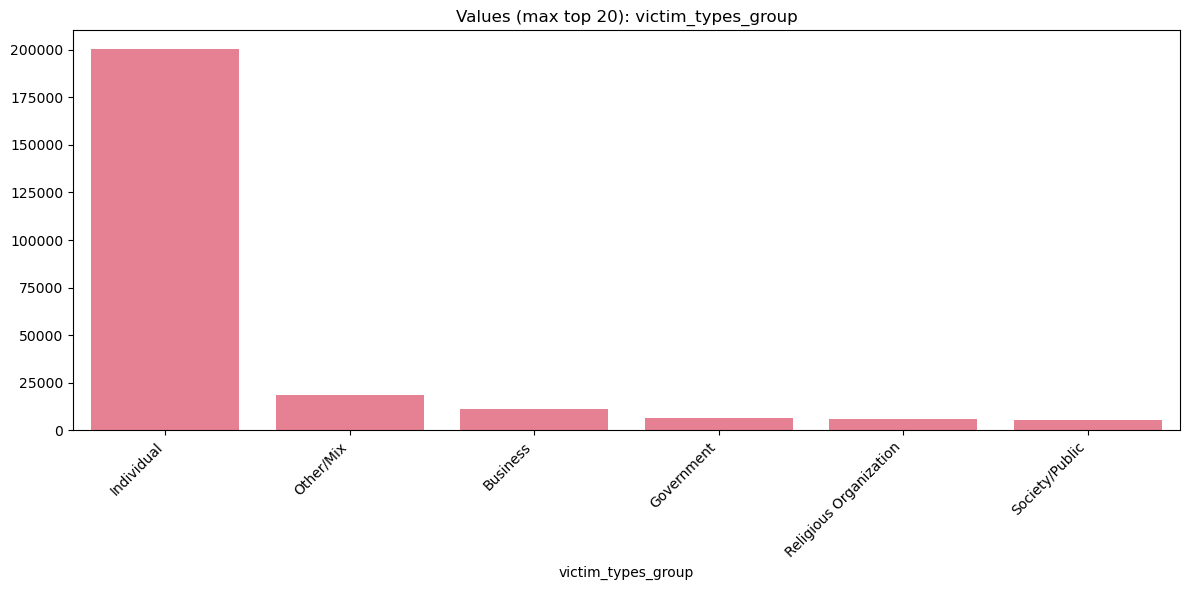

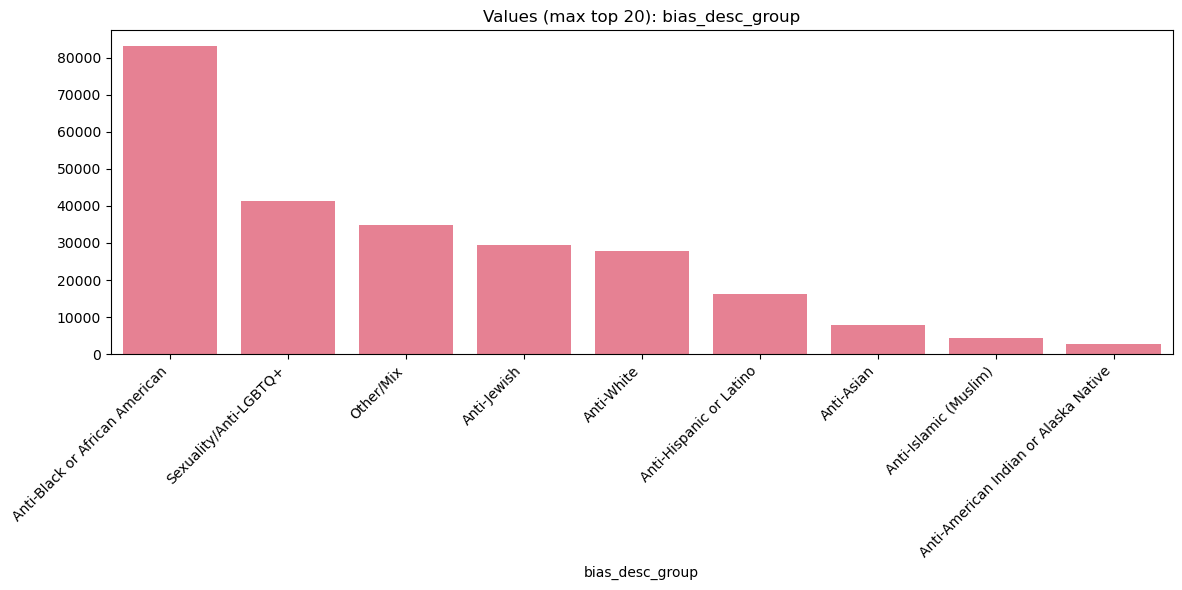

In [41]:
# Bar charts to check values of categorical variables
if len(categorical_columns) > 0:
    for col in categorical_columns:
        plt.figure(figsize = (12, 6))
        top_cats = df_clean[col].value_counts().head(20) 
        sns.barplot(x=top_cats.index, y = top_cats.values)
        if col == 'multiple_bias':
            plt.title('Distribution single/multiple - multiple_bias')
        elif col == 'multiple_offense':
            plt.title('Distribution single/multiple - multiple_offense')
        else:
            plt.title(f'Values (max top 20): {col}')
        plt.xticks(rotation = 45, ha = 'right')
        plt.tight_layout()
        plt.show()

Dominance by city agencies and incidents from urban regions, especially in West and Northeast. Most records from larger cities.

White is the most common offender race, many entries are marked as unknown. Ethnicity is often unspecified -> limiting interpretation.

Most offenses are single incidents involving individual victims, typically occurring at residences or public spaces.

Common offense types include assault, intimidation and vandalism.

Most frequent bias motivation is anti-Black or African American, followed by anti-LGBTQ+ and anti-Jewish.

### Outlier analysis

Identifying outliers using Z-score and IQR method

In [42]:
# Select data frame rows
z_scores = pd.DataFrame(index = df_clean.index)  

for column in numeric_columns:
    col_data = df_clean[column]
    
    # If no NAs found, calculate Z-score
    if col_data.isnull().sum() == 0:
        z_scores[column] = np.abs(stats.zscore(col_data))
    
    # If NAs found -> drop NAs before calculating Z-score:
    else:
        non_null_data = col_data.dropna()
        
        z = stats.zscore(non_null_data)
        
        # Create series and set index like non-zero values:
        z_series = pd.Series(z, index=non_null_data.index)
        
        # Transfer to the corresponding column of z_scores dataset and automatically fill NA positions of df with NaN
        z_scores[column] = z_series


# Identify outliers (|z| > 3)
print("Number of outliers per numerical column (|z| > 3):")
display((z_scores > 3).sum())

# IQR-Method
outliers_count = {}
for column in numeric_columns:
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df_clean[column] < (Q1 - 1.5 * IQR)) | (df_clean[column] > (Q3 + 1.5 * IQR))).sum()
    outliers_count[column] = outliers

print("\nNumber of outliers per numerical column (IQR-method):")
display(pd.Series(outliers_count))

Number of outliers per numerical column (|z| > 3):


total_offender_count        3939
victim_count                8678
total_individual_victims    1562
dtype: int64


Number of outliers per numerical column (IQR-method):


total_offender_count        16744
victim_count                 8678
total_individual_victims    80302
dtype: int64

The data is not normally distributed, otherwise there would be little difference between the Z-Score and IQR methods. There are many skewed or heavy-tailed distributions, especially in victim and offender counts.
Some columns contain a very high number of outliers (e.g. total_individual_victims —> over 80.000), which can distort results in PCA and clustering.

## Bivariate analysis

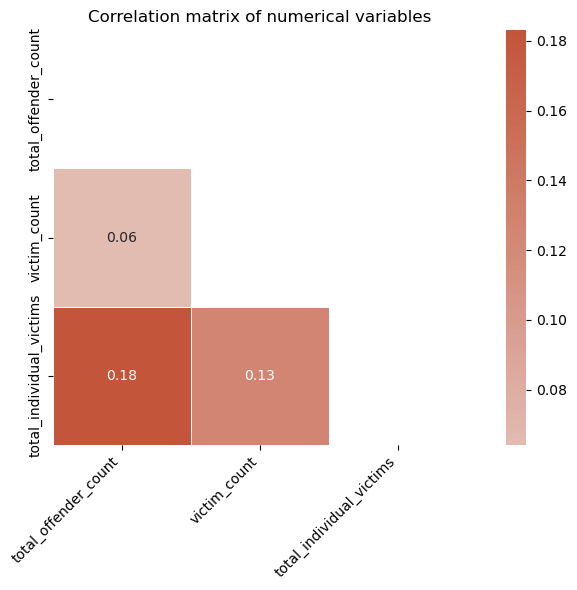

In [43]:
# Correlation between numerical variables
if len(numeric_columns) >= 2:
    # Correlation matrix with pairwise exclusion of missing values
    corr_matrix = df_clean[numeric_columns].corr(method='pearson', min_periods = 1)
    
    plt.figure(figsize = (8, 6))
    mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
    cmap = sns.diverging_palette(230, 20, as_cmap = True)
    sns.heatmap(corr_matrix, mask = mask, cmap = cmap, annot = True, fmt = '.2f', 
                square = True, linewidths = .5, center = 0)
    plt.title('Correlation matrix of numerical variables')
    plt.xticks(rotation = 45, ha = 'right')
    plt.tight_layout()
    plt.show()

In [44]:
# Strongest correlations, self-correlations excluded
corr_pairs = corr_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs < 1.0] 
high_corr = corr_pairs.abs().sort_values(ascending=False).head(6)
print("Strongest correlations:")
display(high_corr)

Strongest correlations:


total_offender_count      total_individual_victims    0.182989
total_individual_victims  total_offender_count        0.182989
victim_count              total_individual_victims    0.126418
total_individual_victims  victim_count                0.126418
total_offender_count      victim_count                0.064246
victim_count              total_offender_count        0.064246
dtype: float64

All correlations are weak (r < 0.2), meaning there is little to no linear relationship between the variables.

### Visualizing the relationship between categorical and selected numerical variables with boxplots

In [45]:
# Identify categorical columns with fewer than 10 unique values
print("Categorical columns with fewer than 10 unique values:")
for col in categorical_columns:
    if df_clean[col].nunique() < 10:
        print(f"{col}: {df_clean[col].nunique()} unique values")

Categorical columns with fewer than 10 unique values:
agency_type_name: 8 unique values
region_name: 6 unique values
offender_race: 8 unique values
offender_ethnicity: 5 unique values
multiple_offense: 2 unique values
multiple_bias: 2 unique values
location_group: 9 unique values
offense_group: 8 unique values
victim_types_group: 6 unique values
bias_desc_group: 9 unique values


Selected categorical columns: ['agency_type_name', 'region_name', 'offender_race']
Numeric columns: ['total_offender_count', 'victim_count', 'total_individual_victims']
df_clean shape: (248024, 14)


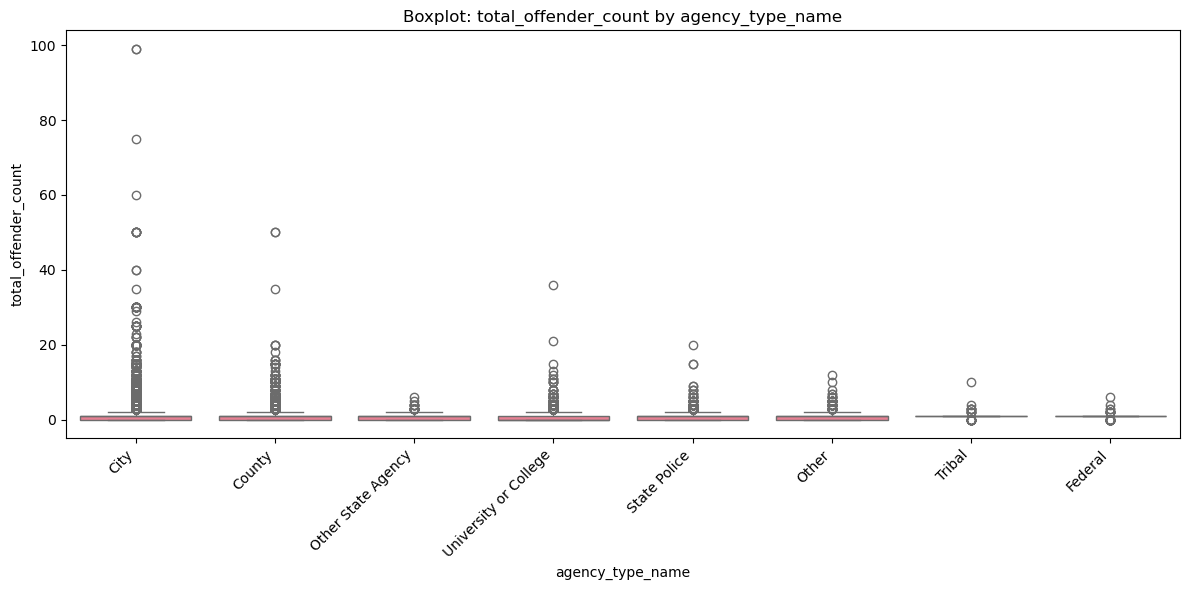

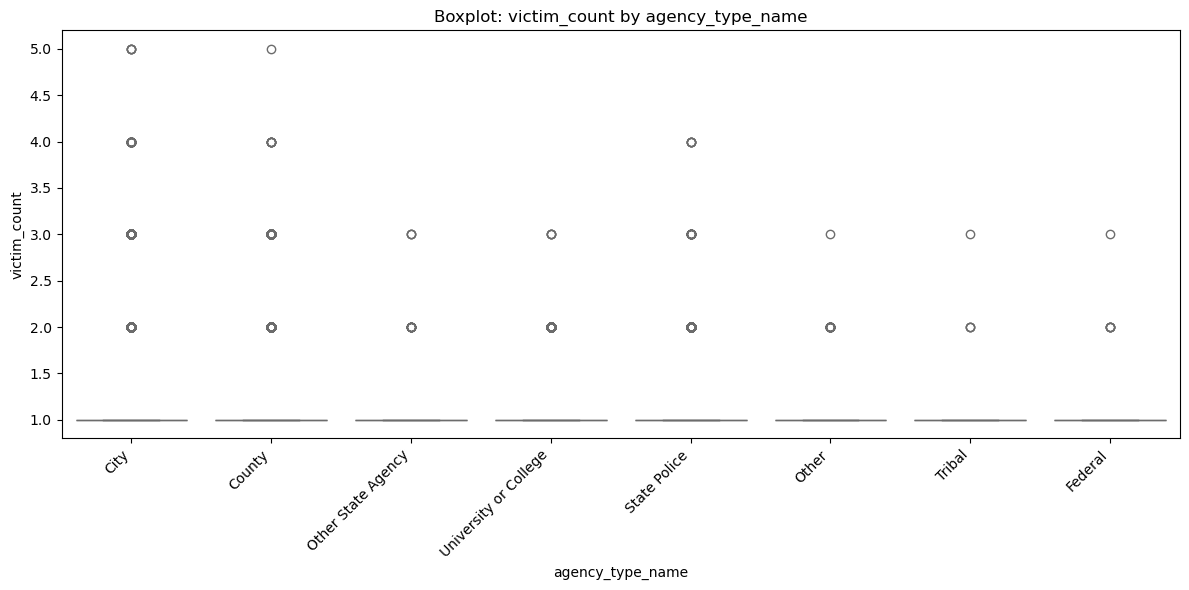

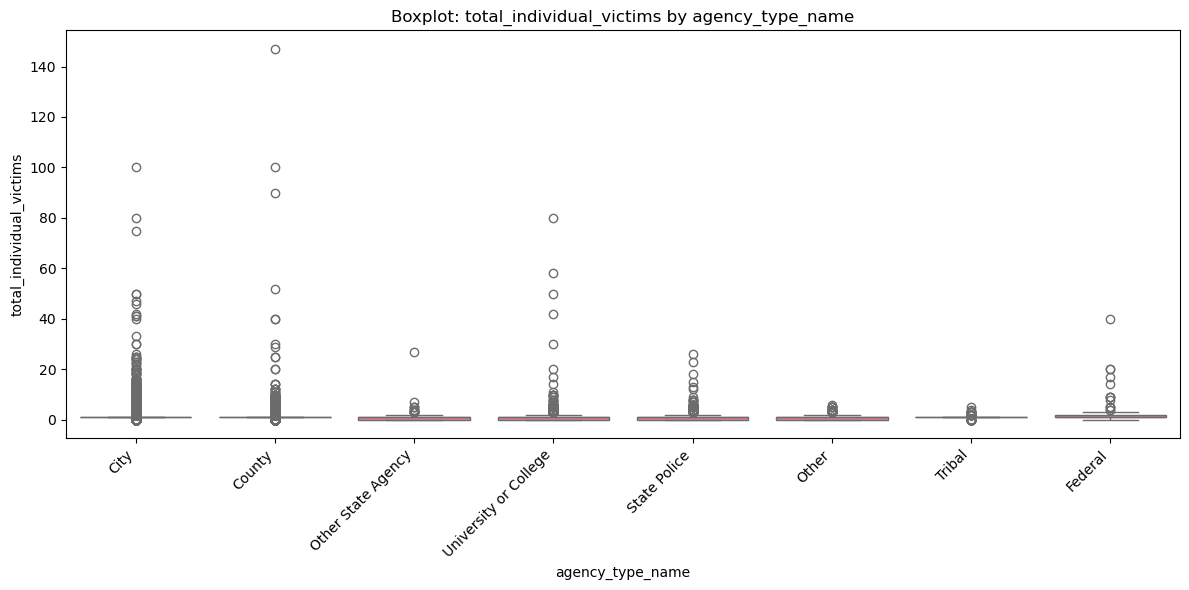

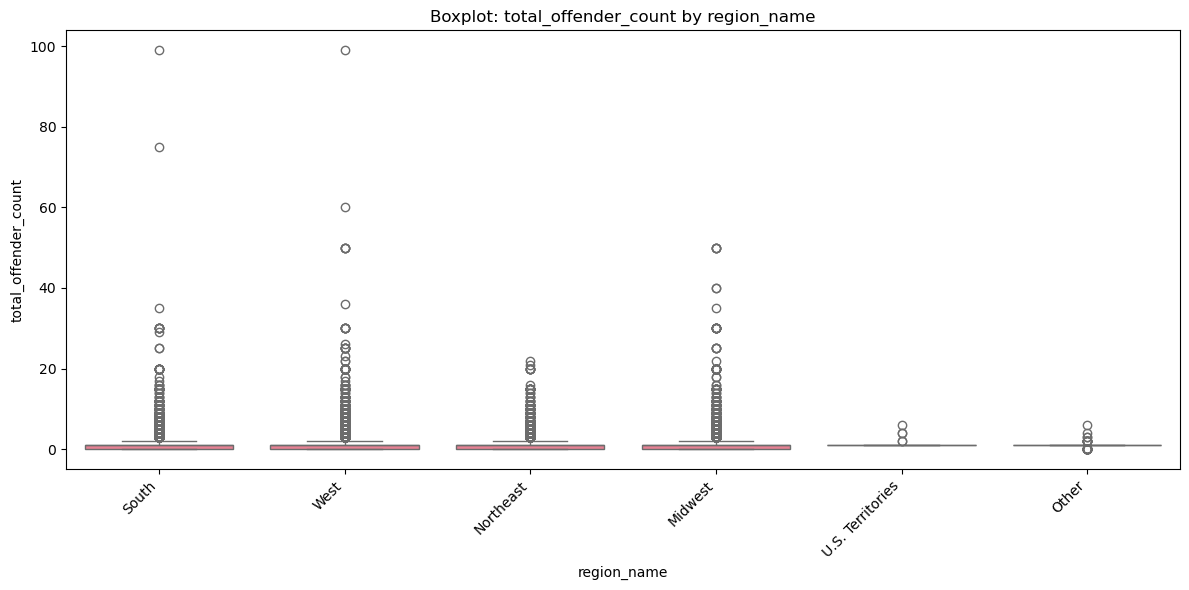

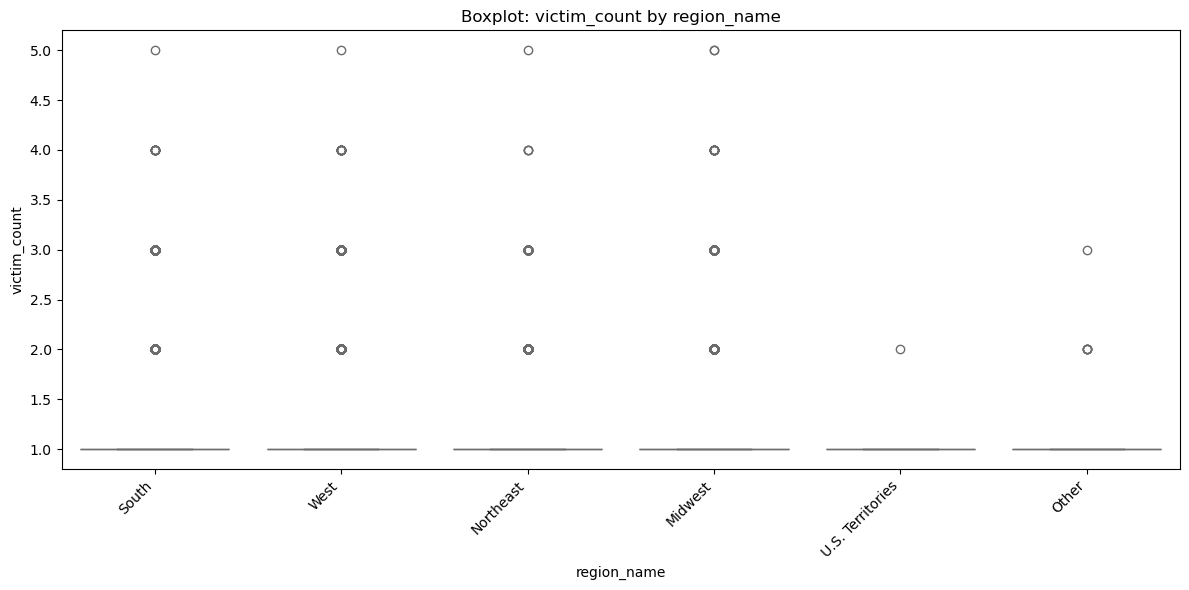

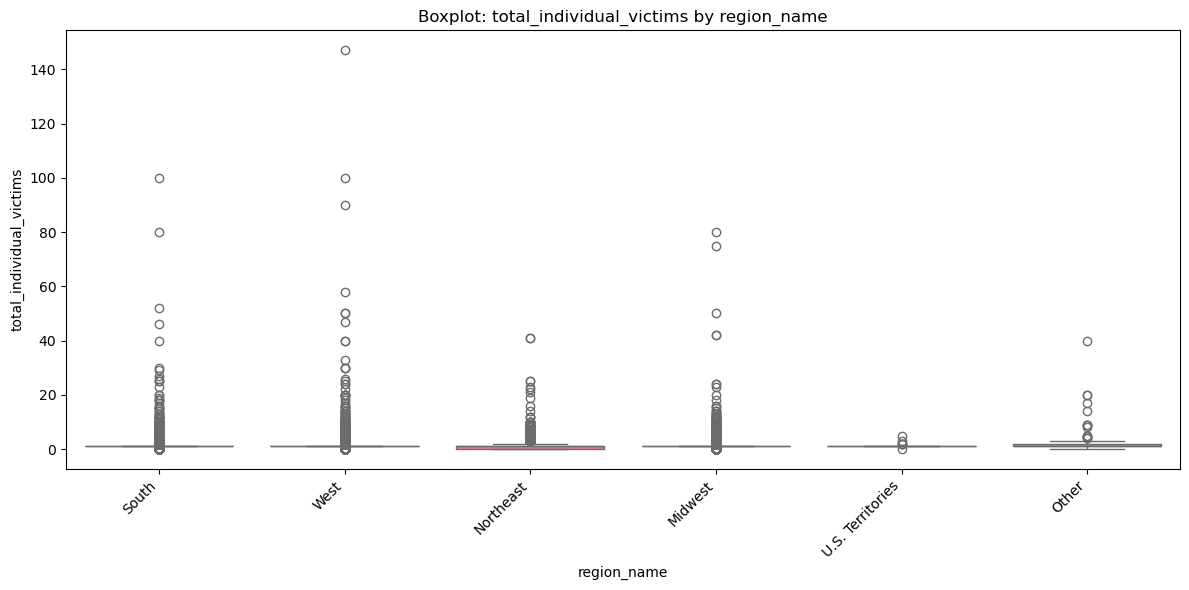

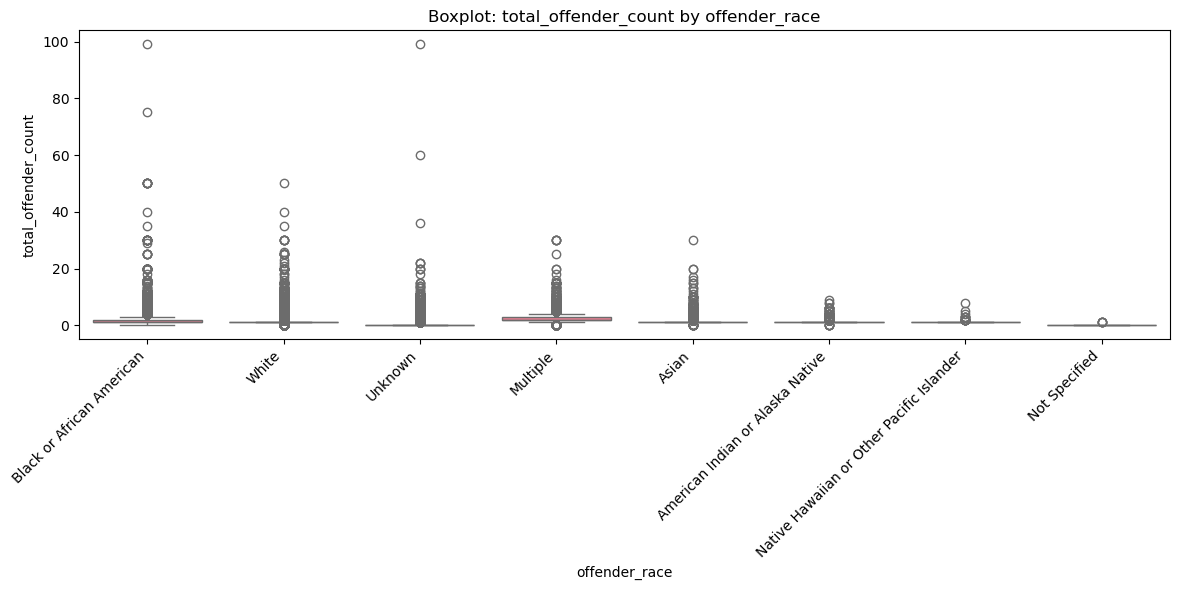

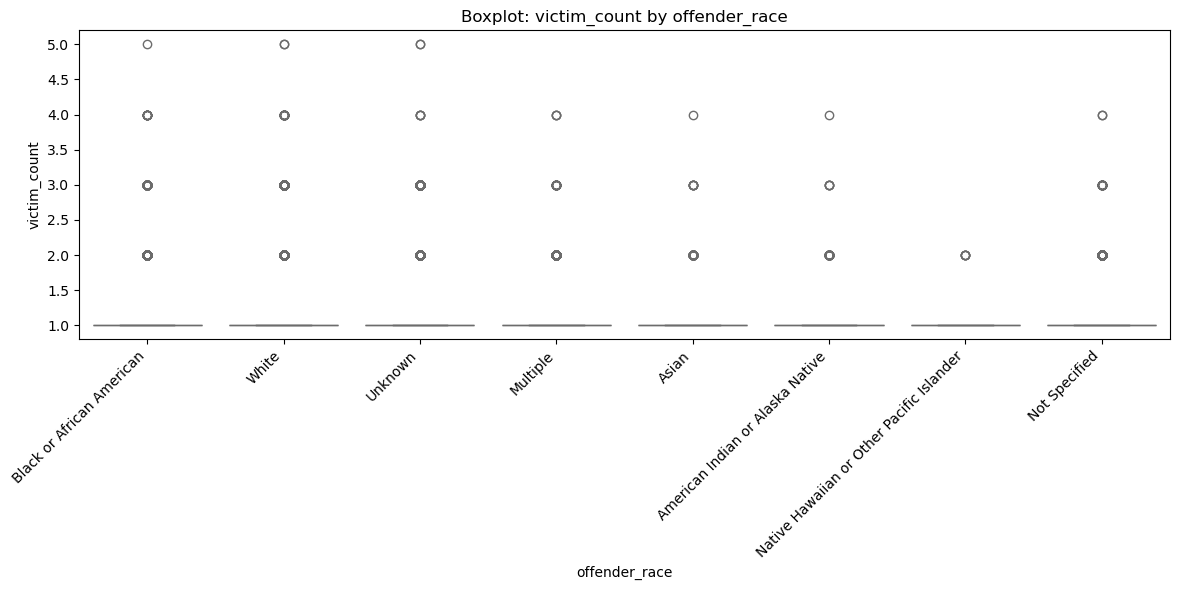

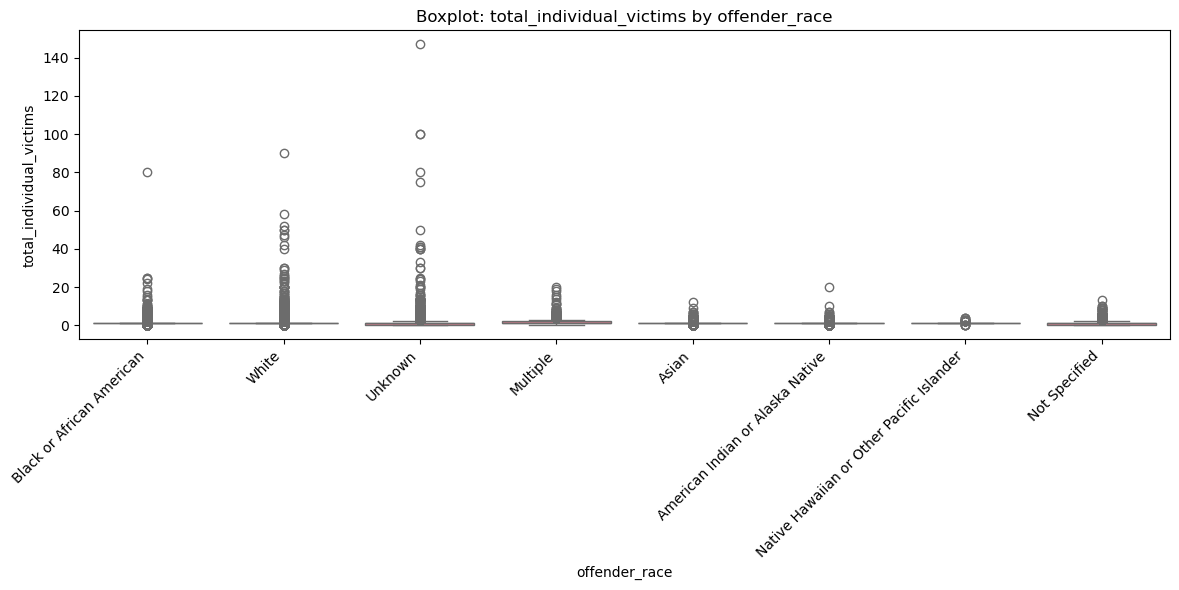

In [46]:
# Analysis of relationships between categorical and numerical variables to identify patterns and dependencies in hate crime data
 # Define categorical columns with fewer than 10 unique values as selected_categorical first, skip offender_ethnicity
selected_categorical = [
    'agency_type_name',
    'region_name',
    'offender_race',
    'multiple_offense',
    'multiple_bias',
    'location_group',
    'offense_group',
    'victim_types_group',
    'bias_desc_group'
]

# Limit to first 3 selected categorial columns and first 5 numerical columns -> Check selected columns
print(f"Selected categorical columns: {selected_categorical[:3]}")
print(f"Numeric columns: {numeric_columns[:5]}")
print(f"df_clean shape: {df_clean.shape}")

# Plotting boxplots for selected categorical and numerical columns
if len(selected_categorical) > 0 and len(numeric_columns) > 0:
    for cat_col in selected_categorical[:3]:
        for num_col in numeric_columns[:5]:
            plt.figure(figsize=(12, 6))
            sns.boxplot(x = cat_col, y = num_col, data = df_clean)
            plt.title(f'Boxplot: {num_col} by {cat_col}')
            plt.xticks(rotation = 45, ha = 'right')
            plt.tight_layout()
            plt.show()
        


Cities show the highest and most variable offender and victim counts.

South and West regions report higher and more spread-out offender and victim numbers.

“Unknown” and “White” categories in offender-race have the most outliers.

## Further analysis and transformation

### Checking the skewness in detail

In [47]:
# Analysis of skewness and distribution forms/presence of outliers of numerical variables
if len(numeric_columns) > 0:
    skewness = df_clean[numeric_columns].skew().sort_values(ascending = False)
    kurtosis = df_clean[numeric_columns].kurtosis().sort_values(ascending = False)
    
    distribution_stats = pd.DataFrame({
        'Skewness': skewness,
        'Kurtosis': kurtosis
    })
    
    print("Distribution statistics (sorted by skewness):")
    display(distribution_stats)

        
    

Distribution statistics (sorted by skewness):


Skewness     Kurtosis
total_individual_victims  32.501923  2917.765028
total_offender_count      11.070636   441.025034
victim_count               6.013303    42.282715

In [48]:
# Skewness interpretation:
def interpret_skewness(skew):
    if abs(skew) < 0.5:
        return "≈ Symmetric"
    elif abs(skew) < 1:
        return "Moderately skewed"
    else:
        return "Highly skewed"

def interpret_kurtosis(kurt):
    if kurt < 3:
        return "Platykurtic (light tails)"
    elif kurt == 3:
        return "Mesokurtic (normal)"
    else:
        return "Leptokurtic (heavy tails)"

# Create DataFrame
distribution_stats = pd.DataFrame({
    'Skewness': skewness,
    'Skewness_Interpretation': skewness.map(interpret_skewness),
    'Kurtosis': kurtosis,
    'Kurtosis_Interpretation': kurtosis.map(interpret_kurtosis)
})

# Output
print("Distribution statistics with interpretation (sorted by skewness):")
display(distribution_stats)

Distribution statistics with interpretation (sorted by skewness):


Skewness Skewness_Interpretation     Kurtosis  \
total_individual_victims  32.501923           Highly skewed  2917.765028   
total_offender_count      11.070636           Highly skewed   441.025034   
victim_count               6.013303           Highly skewed    42.282715   

                            Kurtosis_Interpretation  
total_individual_victims  Leptokurtic (heavy tails)  
total_offender_count      Leptokurtic (heavy tails)  
victim_count              Leptokurtic (heavy tails)

All three variables are strongly non-normal, with heavy right skew and many outliers -> Clustering (especially K-Means) is sensitive to outliers.

##### Log-transformation of skewed numerical variables to stabilize variance and improve clustering performance

In [49]:
# Define skewed columns and apply log transformation
skewed_cols = ['total_individual_victims', 'total_offender_count', 'victim_count']
df_clean[skewed_cols] = df_clean[skewed_cols].apply(lambda x: np.log1p(x))

## Encoding

##### Since the categorical data is nominal data, one-hot encoding is used.

In [50]:
# Encoding categorical variables
df_encoded = pd.get_dummies(df_clean, columns = categorical_columns)

In [51]:
# Check encoded DataFrame
print("\nEncoded DataFrame with dummy variables:")
df_encoded.head()


Encoded DataFrame with dummy variables:


total_offender_count  victim_count  total_individual_victims  \
0              0.693147      0.693147                  0.693147   
1              0.693147      1.098612                  0.693147   
2              0.693147      1.098612                  1.098612   
3              1.098612      0.693147                  0.693147   
4              0.693147      0.693147                  0.693147   

   agency_type_name_City  agency_type_name_County  agency_type_name_Federal  \
0                   True                    False                     False   
1                   True                    False                     False   
2                   True                    False                     False   
3                   True                    False                     False   
4                  False                     True                     False   

   agency_type_name_Other  agency_type_name_Other State Agency  \
0                   False                                False   
1                   False                                False   
2                   False                                False   
3                   False                                False   
4                   False                                False   

   agency_type_name_State Police  agency_type_name_Tribal  ...  \
0                          False                    False  ...   
1                          False                    False  ...   
2                          False                    False  ...   
3                          False                    False  ...   
4                          False                    False  ...   

   victim_types_group_Society/Public  \
0                              False   
1                              False   
2                              False   
3                              False   
4                              False   

   bias_desc_group_Anti-American Indian or Alaska Native  \
0                                              False       
1                                              False       
2                                              False       
3                                              False       
4                                              False       

   bias_desc_group_Anti-Asian  bias_desc_group_Anti-Black or African American  \
0                       False                                            True   
1                       False                                           False   
2                       False                                           False   
3                       False                                           False   
4                       False                                            True   

   bias_desc_group_Anti-Hispanic or Latino  \
0                                    False   
1                                    False   
2                                    False   
3                                    False   
4                                    False   

   bias_desc_group_Anti-Islamic (Muslim)  bias_desc_group_Anti-Jewish  \
0                                  False                        False   
1                                  False                        False   
2                                  False                        False   
3                                  False                        False   
4                                  False                        False   

   bias_desc_group_Anti-White  bias_desc_group_Other/Mix  \
0                       False                      False   
1                        True                      False   
2                        True                      False   
3                        True                      False   
4                       False                      False   

   bias_desc_group_Sexuality/Anti-LGBTQ+  
0                                  False  
1                                  False  
2                                  F

In [52]:
# New size of the dataset
print(f"\nSize of the dataset: {df_encoded.shape[0]} rows and {df_encoded.shape[1]} columns")


Size of the dataset: 248024 rows and 86 columns


Encoding resulted in large DataFrame.

## Standardize Data

In [53]:
# Standardize numerical variables
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

## Principal Component Analysis

##### Performing a PCA for dimension reduction -> 95 % variance

In [54]:
# Performing PCA to reduce dimensionality while retaining 95% of variance
pca = PCA(n_components = 0.95, random_state = 42)
df_pca = pca.fit_transform(df_scaled)
print(f"New Dimensions: {df_pca.shape[1]}")

New Dimensions: 62


-> Still quite large dataset.

##### Check contributing features in components

In [55]:
# Get feature importance from PCA components
feature_names = df_encoded.columns
n_components_to_show = 5

for i in range(n_components_to_show):
    component = pca.components_[i]
    # Get top 10 most important features for this component
    top_indices = np.argsort(np.abs(component))[-10:]
    top_features = [(feature_names[idx], component[idx]) for idx in top_indices]
    
    print(f"\nPC{i+1} - Top contributing features:")
    for feature, weight in sorted(top_features, key = lambda x: abs(x[1]), reverse = True):
        print(f"  {feature}: {weight:.3f}")


PC1 - Top contributing features:
  victim_types_group_Individual: 0.354
  offense_group_Vandalism: -0.333
  total_individual_victims: 0.320
  offender_race_Unknown: -0.297
  total_offender_count: 0.294
  offense_group_Assault: 0.245
  offender_race_White: 0.219
  victim_types_group_Other/Mix: -0.198
  bias_desc_group_Anti-Jewish: -0.190
  victim_types_group_Religious Organization: -0.145

PC2 - Top contributing features:
  agency_type_name_City: -0.476
  agency_type_name_County: 0.434
  population_group_description_MSA counties 100,000 or over: 0.322
  multiple_offense_M: 0.230
  multiple_offense_S: -0.230
  victim_count: 0.230
  region_name_South: 0.225
  population_group_description_MSA counties from 25,000 thru 99,999: 0.183
  region_name_Northeast: -0.146
  population_group_description_Cities 1,000,000 or over: -0.142

PC3 - Top contributing features:
  multiple_offense_M: 0.504
  multiple_offense_S: -0.504
  victim_count: 0.501
  agency_type_name_City: 0.204
  agency_type_name_Co

## k-Means Clustering, Inertia & Elbow Diagram

##### Applying k-Means clustering to the data, evaluating the inertia for different cluster counts, and plotting an elbow diagram to determine the optimal number of clusters.

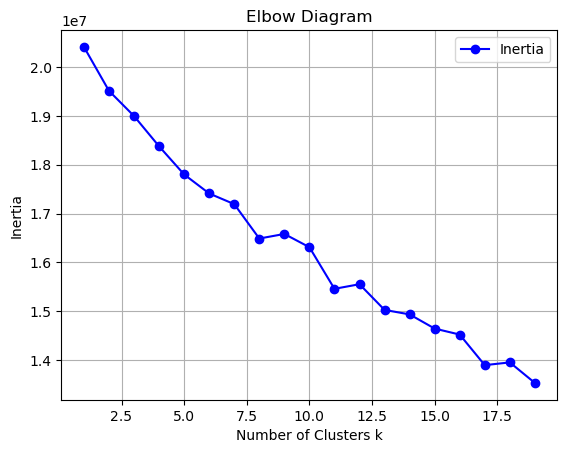

In [56]:
#Setting k_range to min 1 and max 19 (inclusive) clusters
inertia = []
k_range = range(1, 20)

for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters k')
plt.ylabel('Inertia')
plt.title('Elbow Diagram')
plt.legend(['Inertia'])
plt.grid(True)
plt.show()

No obvious clear inflexion -> Using the Kneedle algorithm to determine the best k value in the elbow diagram

In [57]:
# Using Kneedle to determine the optimal k value
kneedle = KneeLocator(k_range, inertia, curve="convex", direction = "decreasing")
optimal_k = kneedle.knee
print(f"Optimal k with Kneedle: {optimal_k}")

Optimal k with Kneedle: 8


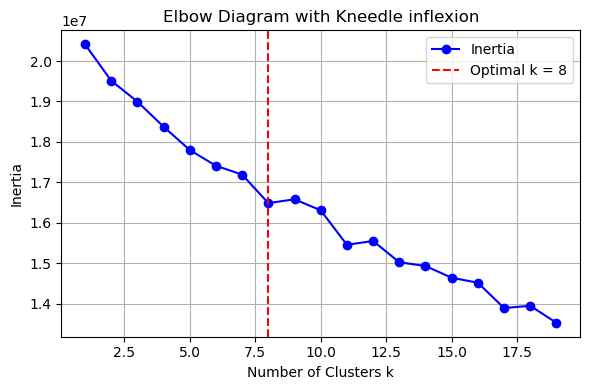

In [58]:
# Plotting the elbow diagram with Kneedle inflexion
plt.figure(figsize = (6, 4))
plt.plot(k_range, inertia, 'bo-', label = 'Inertia')
plt.xlabel("Number of Clusters k")
plt.ylabel("Inertia")
plt.title("Elbow Diagram with Kneedle inflexion")

plt.axvline(x = optimal_k, color = 'red', linestyle = '--', label = f'Optimal k = {optimal_k}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##### Running k-Means with 8 clusters

In [59]:
kmeans = KMeans(n_clusters = 8, random_state = 42)
kmeans.fit(df_pca)
labels = kmeans.labels_

##### Using Silhouette Score to check the quality

In [60]:
# Determine silhouette score for the optimal k value
score = silhouette_score(df_pca, labels)
print(f"Silhouette Score (k={optimal_k}): {score:.3f}")

Silhouette Score (k=8): 0.041


##### Silhouette Score Interpretation

In [61]:
# Score Interpretation:
def interpret_silhouette_score(score):
    if score > 0.7:
        return "Strong clustering structure"
    elif score > 0.5:
        return "Reasonable clustering structure"
    elif score > 0.25:
        return "Weak clustering structure"
    else:
        return "No clear clustering structure"

print(f"Silhouette Score: {score:.3f} -> {interpret_silhouette_score(score)}")

Silhouette Score: 0.041 -> No clear clustering structure


##### Silhouette Plot

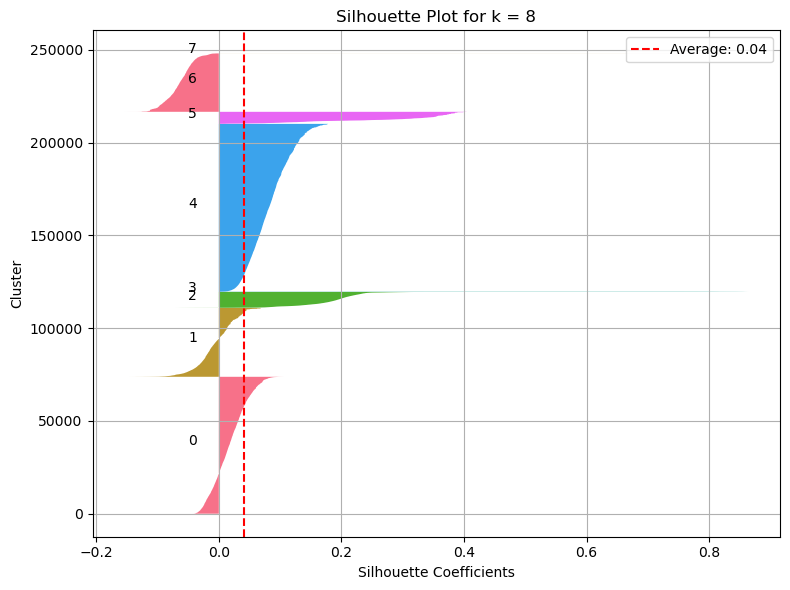

In [62]:
# Silhouette values
silhouette_vals = silhouette_samples(df_pca, labels)
k = len(np.unique(labels))

# Silhouette plot
fig, ax = plt.subplots(figsize = (8, 6))
y_lower = 10

for i in range(k):
    ith_cluster_sil_vals = silhouette_vals[labels == i]
    ith_cluster_sil_vals.sort()
    size_cluster_i = ith_cluster_sil_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_sil_vals)
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  

ax.axvline(x=score, color = "red", linestyle = "--", label = f"Average: {score:.2f}")
ax.set_xlabel("Silhouette Coefficients")
ax.set_ylabel("Cluster")
ax.set_title(f"Silhouette Plot for k = {k}")
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Average silhouette score of ~0.04 is very low -> poor clustering quality. Many points are near or across cluster boundaries and some clusters containing mostly misclassified points (-> negative scores).
Additionally, the clusters are imbalanced in size -> the algorithm may be forcing artificial groupings rather than discovering natural structure.

##### Systematic comparison of several values for k

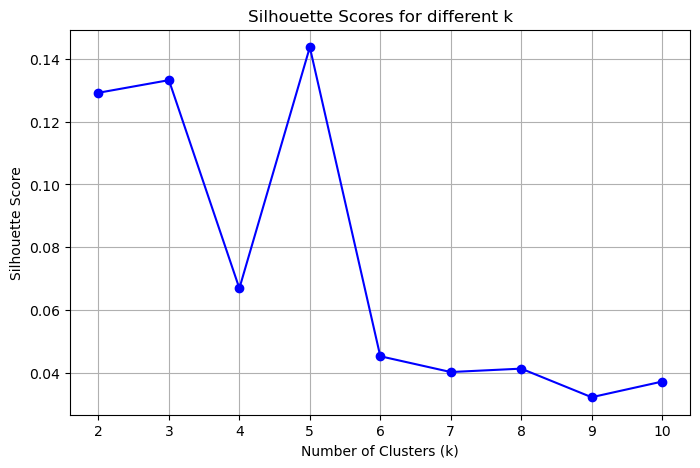

In [63]:
range_n_clusters = range(2, 11)
scores = []

for k in range_n_clusters:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    labels = kmeans.fit_predict(df_pca)
    score = silhouette_score(df_pca, labels, sample_size = 50000, random_state = 42)
    scores.append(score)

# Plot
plt.figure(figsize = (8, 5))
plt.plot(range_n_clusters, scores, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for different k")
plt.grid(True)
plt.show()

In [64]:
# Find peak silhouette score
best_k = range_n_clusters[scores.index(max(scores))]
best_score = max(scores)
print(f"Silhouette score peaks at k = {best_k} with a value of {best_score:.3f}")

Silhouette score peaks at k = 5 with a value of 0.144


Still very low score. Conclusion: The model does not separate the clusters better than chance.

### Start with PCA again

##### Setting 25 components

In [65]:
# Choosing n_components = 25 to reduce dimensionality further 
components = 25
pca = PCA(n_components = components, random_state = 42)
df_pca_reduced = pca.fit_transform(df_scaled)

##### Check the variance explained with 25 components

In [66]:
print(
    f"Explained variance with {components} components: {np.sum(pca.explained_variance_ratio_)}"
)

Explained variance with 25 components: 0.5348596007454892


Quite low variance explained. With 25 components, only ~53% of the information is retained.

##### Setting 35 components

In [67]:
# Choosing n_components = 35 
components = 35
pca = PCA(n_components = components, random_state = 42)
df_pca_reduced = pca.fit_transform(df_scaled)

In [68]:
print(f"New Dimensions: {df_pca_reduced.shape[1]}")

New Dimensions: 35


##### Check the variance explained with 35 components

In [69]:
print(
    f"Explained variance with {components} components: {np.sum(pca.explained_variance_ratio_)}"
)

Explained variance with 35 components: 0.6606908278751751


Still low variance explained.

##### New Elbow Diagram to search for optimal k

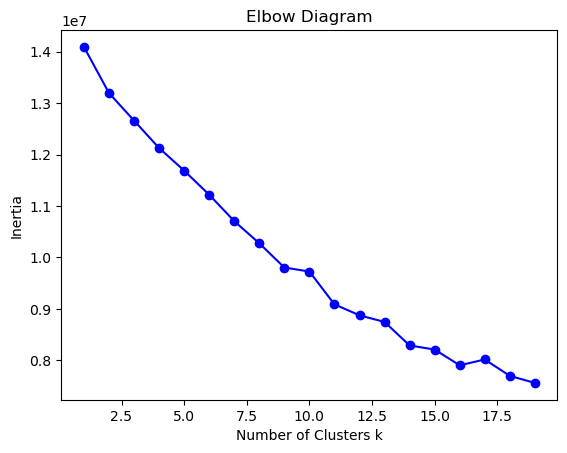

In [70]:
#Setting k_range to min 1 and max 19 (inclusive) clusters
inertia = []
k_range = range(1, 20)

for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(df_pca_reduced)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters k')
plt.ylabel('Inertia')
plt.title('Elbow Diagram')
plt.show()

Again no obvious inflexion -> Using Kneedle algorithm to determine the best k value in the elbow diagram

In [71]:
# Using Kneedle to determine the optimal k value
kneedle = KneeLocator(k_range, inertia, curve = "convex", direction = "decreasing")
optimal_k = kneedle.knee
print(f"Optimal k with Kneedle: {optimal_k}")

Optimal k with Kneedle: 11


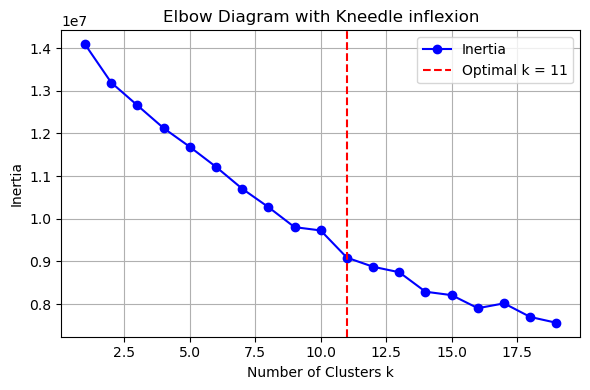

In [72]:
# Plotting the second elbow diagram with Kneedle inflexion
plt.figure(figsize = (6, 4))
plt.plot(k_range, inertia, 'bo-', label = 'Inertia')
plt.xlabel("Number of Clusters k")
plt.ylabel("Inertia")
plt.title("Elbow Diagram with Kneedle inflexion")

plt.axvline(x = optimal_k, color = 'red', linestyle = '--', label = f'Optimal k = {optimal_k}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### Running k-Means with 11 clusters

In [73]:
kmeans = KMeans(n_clusters = 11, random_state = 42)
kmeans.fit(df_pca_reduced)
labels = kmeans.labels_

##### Using Silhouette Score to check the quality

In [74]:
# Determine silhouette score for the optimal k value
score = silhouette_score(df_pca_reduced, labels)
print(f"Silhouette Score (k={optimal_k}): {score:.3f}")

Silhouette Score (k=11): 0.081


##### Very low Silhouette Score -> Comparing different k

k = 2, Silhouette Score = 0.159
k = 3, Silhouette Score = 0.076
k = 4, Silhouette Score = 0.151
k = 5, Silhouette Score = 0.079
k = 6, Silhouette Score = 0.074
k = 7, Silhouette Score = 0.074
k = 8, Silhouette Score = 0.063
k = 9, Silhouette Score = 0.086
k = 10, Silhouette Score = 0.072
k = 11, Silhouette Score = 0.081
k = 12, Silhouette Score = 0.071
k = 13, Silhouette Score = 0.081
k = 14, Silhouette Score = 0.095


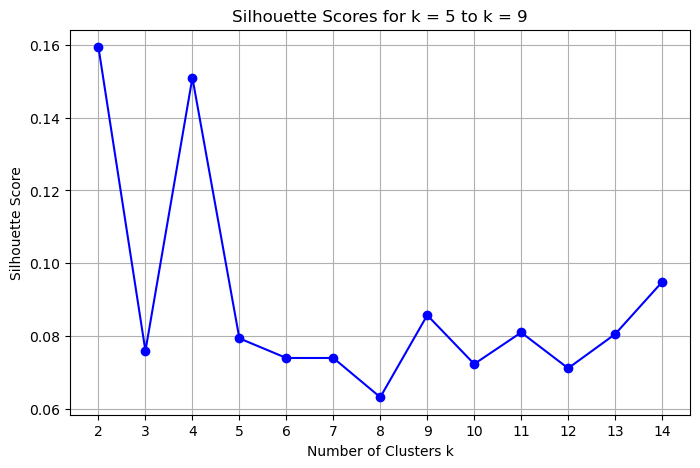

In [75]:
range_n_clusters_new = range(2, 15)
sil_scores = []

for k in range_n_clusters_new:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    labels = kmeans.fit_predict(df_pca_reduced)
    score = silhouette_score(df_pca_reduced, labels, sample_size = 50000, random_state = 42)
    sil_scores.append(score)
    print(f"k = {k}, Silhouette Score = {score:.3f}")

# Plot
plt.figure(figsize = (8, 5))
plt.plot(range_n_clusters_new, sil_scores, 'bo-')
plt.xlabel("Number of Clusters k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for k = 5 to k = 9")
plt.grid(True)
plt.xticks(range_n_clusters_new)
plt.show()

k = 2 seems to be the best choice at the moment, at least within this comparison range and based on the sample. The Silhouette score is still not really good, there is no strong, selective clustering structure.

#### Comparing different random subsamples of the data to assess the stability and consistency of clustering quality for different numbers of clusters (k)



Sampling with random_state=42: [0.15940308579070547, 0.17266095307966997, 0.17510482554677456, 0.09185568157280426, 0.06043040177246317, 0.07568195053147837, 0.0652314005112321, 0.08063401740560142, 0.05384505029095415, 0.06761614414657138, 0.0724449570965273, 0.1049422181151128, 0.09511673706915716]
Sampling with random_state=101: [0.15757274838683524, 0.1710401943236115, 0.17215888239372015, 0.05424102943894543, 0.06514417321246672, 0.07600828199613796, 0.07677318626516785, 0.06699198595672949, 0.07480258517048698, 0.08741282695373263, 0.10006084154828931, 0.0892523416240758, 0.08253807068946314]
Sampling with random_state=2024: [0.15911849151925336, 0.1729027174120449, 0.15628294386361802, 0.06250026620584616, 0.136827634577947, 0.06565207451814759, 0.08427461328642838, 0.08107524409095679, 0.08517998154682688, 0.09333217069567618, 0.089074160228893, 0.06546410087000215, 0.08677996735168171]


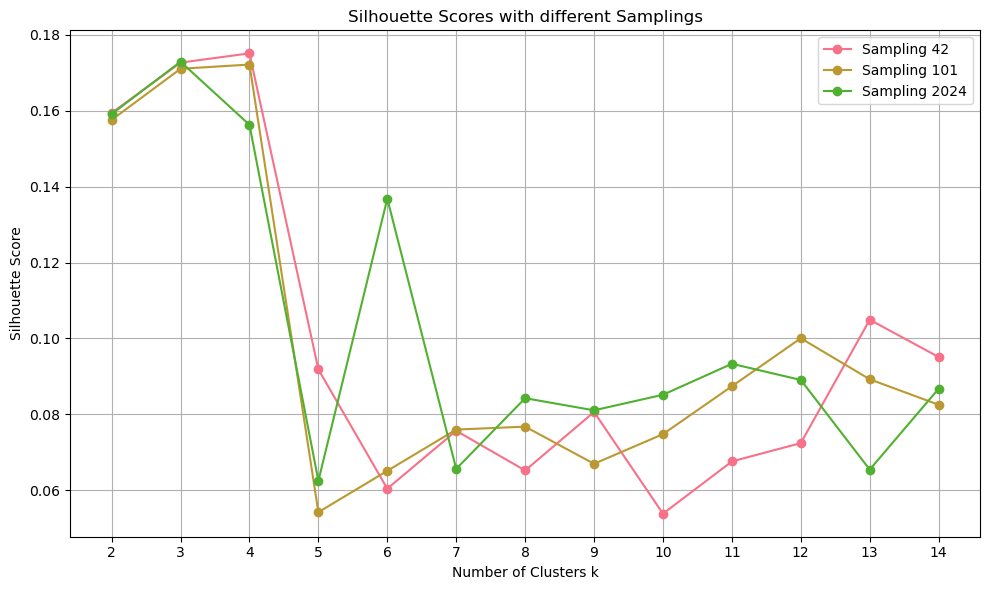

In [76]:
random_states = [42, 101, 2024]
range_n_clusters_new = range(2, 15)
sample_size = 50000

# Save results
all_scores = []

for state in random_states:
    # Subsampling
    df_sample = resample(df_pca_reduced, n_samples = sample_size, random_state = state)

    scores = []
    for k in range_n_clusters_new:
        kmeans = KMeans(n_clusters = k, random_state = 42)
        labels = kmeans.fit_predict(df_sample)
        score = silhouette_score(df_sample, labels)
        scores.append(score)

    all_scores.append(scores)
    print(f"Sampling with random_state={state}: {scores}")

# Plot
plt.figure(figsize = (10, 6))
for idx, scores in enumerate(all_scores):
    plt.plot(range_n_clusters_new, scores, marker = 'o', label = f'Sampling {random_states[idx]}')

plt.xlabel("Number of Clusters k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores with different Samplings")
plt.grid(True)
plt.xticks(range_n_clusters_new)
plt.legend()
plt.tight_layout()
plt.show()

Best k seems to be 4. Clustering results are consistently poor across all samples.

#### Visualization via t-SNE

##### Visualizing high-dimensional data in 2D using t-SNE to explore potential clustering structure

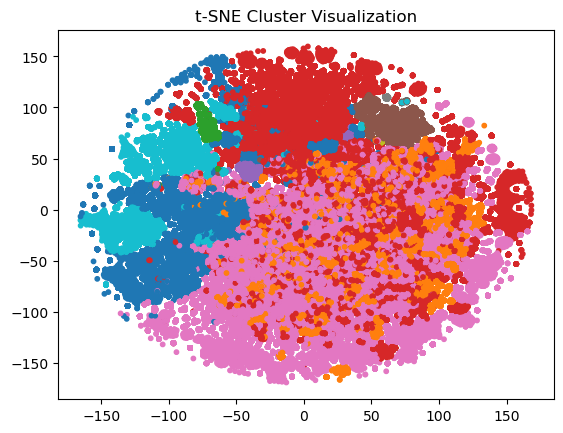

In [77]:
# Reduce data to 2 dimensions
tsne = TSNE(n_components = 2, random_state = 42)
labels = kmeans.fit_predict(df_pca_reduced)
tsne_proj = tsne.fit_transform(df_pca_reduced)

# Plot t-SNE projection
plt.scatter(tsne_proj[:, 0], tsne_proj[:, 1], c = labels, cmap = 'tab10', s = 10)
plt.title("t-SNE Cluster Visualization")
plt.show()


The t-SNE plot supports the silhouette score findings: clusters are weakly defined, with blurry boundaries and overlap.

##### Adding a 'Cluster' column to the DataFrame

In [78]:
# Create Column Names
pca_columns = [f"PCA_{i+1}" for i in range(df_pca_reduced.shape[1])]

# Array to Data Frame
df_pca_reduced = pd.DataFrame(df_pca_reduced, columns = pca_columns)

# Add Cluster Column
df_pca_reduced["Cluster"] = labels

In [79]:
print(df_pca_reduced.columns)

Index(['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8',
       'PCA_9', 'PCA_10', 'PCA_11', 'PCA_12', 'PCA_13', 'PCA_14', 'PCA_15',
       'PCA_16', 'PCA_17', 'PCA_18', 'PCA_19', 'PCA_20', 'PCA_21', 'PCA_22',
       'PCA_23', 'PCA_24', 'PCA_25', 'PCA_26', 'PCA_27', 'PCA_28', 'PCA_29',
       'PCA_30', 'PCA_31', 'PCA_32', 'PCA_33', 'PCA_34', 'PCA_35', 'Cluster'],
      dtype='object')


##### Displaying how the clusters differ on average

In [80]:
# Create table that shows how the individual clusters differ on average
cluster_profile = df_pca_reduced.groupby('Cluster').mean()


In [81]:
print(cluster_profile)

            PCA_1     PCA_2     PCA_3      PCA_4      PCA_5      PCA_6  \
Cluster                                                                  
0       -0.574718  2.843388 -1.254899   0.828959  -0.301815   0.650916   
1       -3.573163 -0.907397  0.618681   0.132108  -0.719384   0.437421   
2        1.721671 -0.600357 -0.394950   0.567545  -1.283412   0.805298   
3       -1.365462  3.444602 -0.834776   2.929195  -4.683848   2.390698   
4        1.944498 -0.610612 -0.288346   0.066607  -0.569245   0.258691   
5       -0.450634  3.220882 -1.771159  -0.690243   0.124259  -1.324623   
6        0.278213  1.211584  4.177794  11.456066   4.403546  -5.219176   
7        1.997646  3.705288  7.869419  -1.485121   0.079640   0.841677   
8       -0.505791 -1.214831  0.155662  -0.434037   0.710763  -0.587853   
9        1.255477 -0.818360 -0.251310  -0.377681   0.896380  -0.305504   
10       0.973548  3.901999 -1.638251  14.571418  17.499529  10.447360   
11       0.608986  4.766895 -2.388842 

Clusters like 11 and 10 have very high or very low values in multiple dimensions -> rare or extreme cases?

##### Adding the initial column names for easier interpretation

In [82]:
df_encoded_with_clusters = df_encoded.copy()
df_encoded_with_clusters["Cluster"] = labels

In [83]:
cluster_profile = df_encoded_with_clusters.groupby("Cluster").mean()
print(cluster_profile)

         total_offender_count  victim_count  total_individual_victims  \
Cluster                                                                 
0                    0.551995      0.702082                  0.612558   
1                    0.195045      0.693147                  0.042729   
2                    0.859853      0.693147                  0.729145   
3                    0.764145      0.716841                  0.000391   
4                    0.886440      0.693147                  0.761491   
5                    0.551327      0.693147                  0.648603   
6                    0.492286      0.766338                  0.712229   
7                    0.715925      1.120123                  0.885674   
8                    0.153752      0.693147                  0.717464   
9                    0.772557      0.693147                  0.748594   
10                   0.594612      0.713299                  0.960717   
11                   0.848998      0.709366        

Clusters mainly differ by agency type and bias. Some clusters are almost only city or federal agencies.

#### Create heatmap to visualize features per cluster

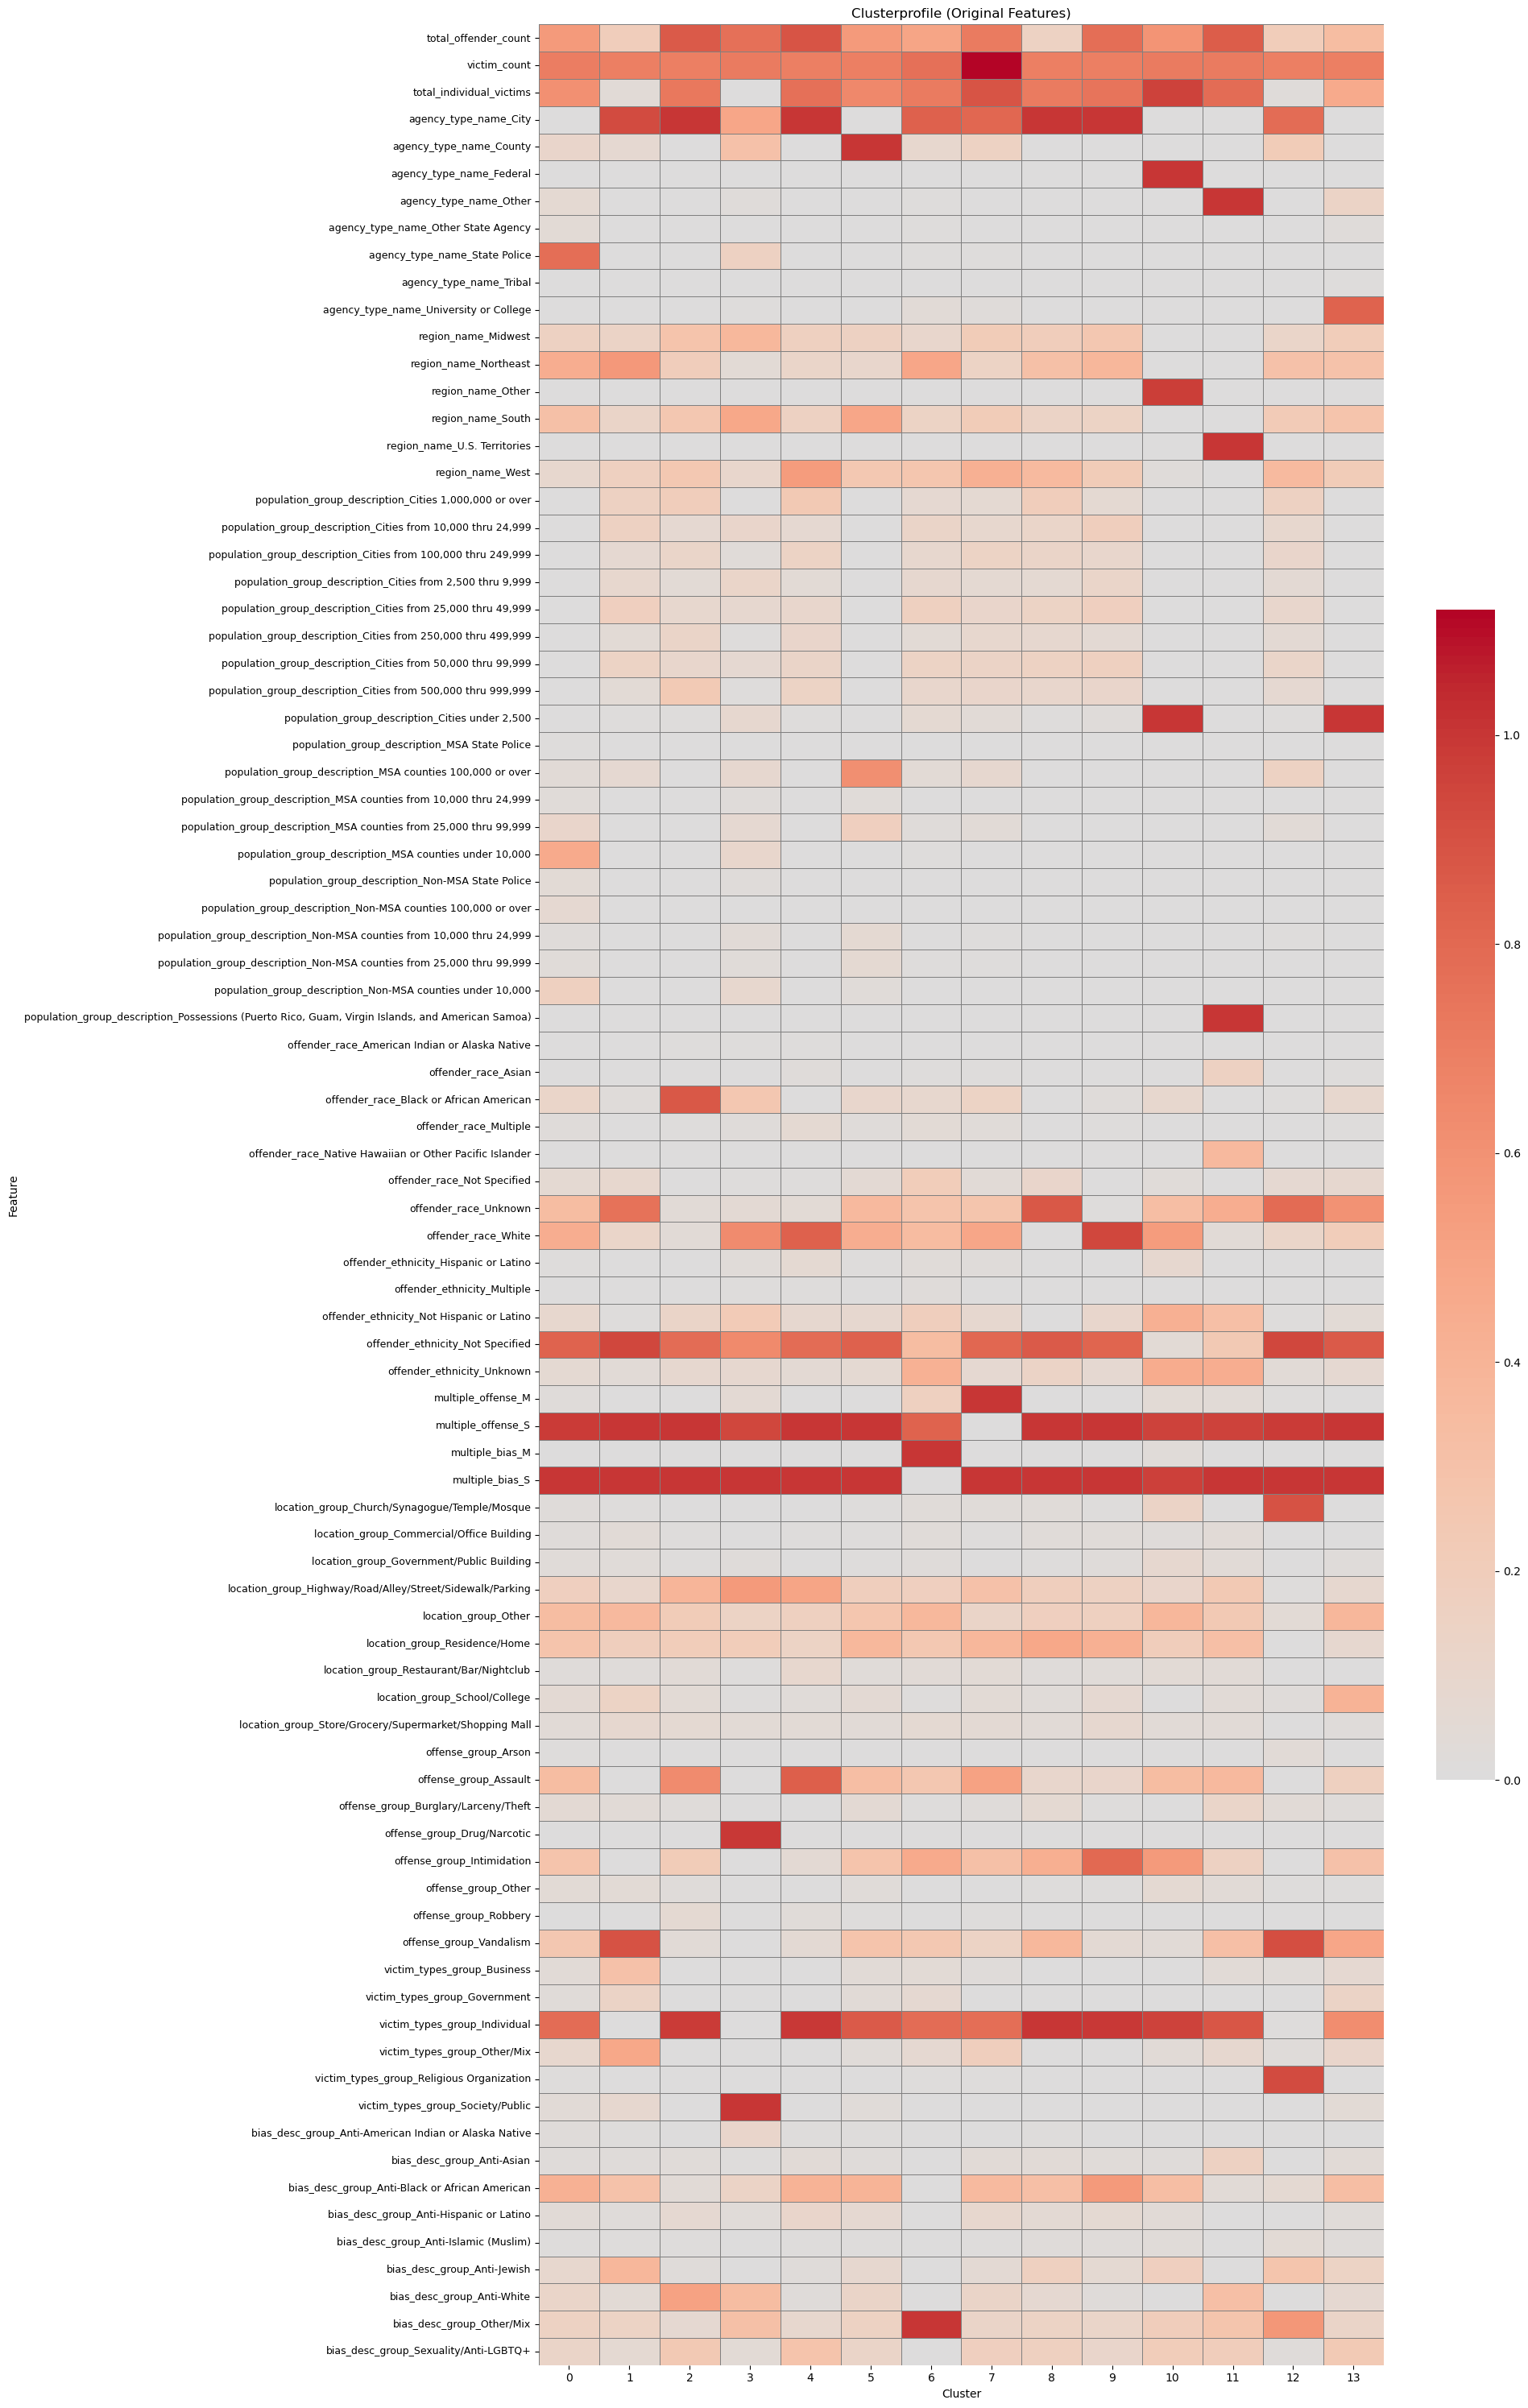

In [84]:
plt.figure(figsize = (20, 30)) 
sns.heatmap(cluster_profile.T, 
            cmap = "coolwarm", 
            center = 0, 
            linewidths = 0.5, 
            linecolor = "gray",
            cbar_kws = {'shrink': 0.5})
plt.title("Clusterprofile (Original Features)")
plt.xlabel("Cluster")
plt.ylabel("Feature")

plt.yticks(rotation = 0, fontsize = 9)  
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

##### A few more insights, e.g.:

Cluster 3: Victim types mainly Society/public; Offense group mainly Drug/Narcotic

Cluster 6: Bias group mainly Other/Mix and multiple

Cluster 10: Mainly "Other" region and agency type "Federal".

## First Conclusion

The data shows weak natural clustering. Even with t-SNE no clear cluster boundaries are visible. The clustering algorithm is forcing group structures that do not appear naturally in the dataset. The result is limited real insight.

### Perform segmentation to reduce feature set focus on interpretable groupings rather than optimizing for technical clustering metrics

##### Check unique values again

In [85]:
df_clean['agency_type_name'].unique()

array(['City', 'County', 'Other State Agency', 'University or College',
       'State Police', 'Other', 'Tribal', 'Federal'], dtype=object)

In [86]:
df_clean["bias_desc_group"].unique()

array(['Anti-Black or African American', 'Anti-White', 'Anti-Jewish',
       'Other/Mix', 'Anti-Islamic (Muslim)', 'Sexuality/Anti-LGBTQ+',
       'Anti-Asian', 'Anti-Hispanic or Latino',
       'Anti-American Indian or Alaska Native'], dtype=object)

##### Select only certain features for clustering

In [87]:
features_for_clustering = [
    # Numeric features
    "total_offender_count",
    "victim_count",
    "total_individual_victims",
    # Agency Type
    "agency_type_name_County",
    "agency_type_name_State Police",
    "agency_type_name_University or College",
    "agency_type_name_City",
    "agency_type_name_Federal",
    "agency_type_name_Other",
    "agency_type_name_Other State Agency",
    "agency_type_name_Tribal",
    # Bias Group
    "bias_desc_group_Anti-Asian",
    "bias_desc_group_Anti-American Indian or Alaska Native",
    "bias_desc_group_Other/Mix",
    "bias_desc_group_Anti-Black or African American",
    "bias_desc_group_Anti-White",
    "bias_desc_group_Sexuality/Anti-LGBTQ+",
    "bias_desc_group_Anti-Jewish",
    "bias_desc_group_Anti-Islamic (Muslim)",
    "bias_desc_group_Anti-Hispanic or Latino"
    ]

In [88]:
df_segment = df_encoded[features_for_clustering].copy()
scaler = StandardScaler()
df_segment_scaled = scaler.fit_transform(df_segment)

##### k-Means with 5 clusters for selected features

In [89]:
kmeans = KMeans(n_clusters = 5, random_state = 42)
labels = kmeans.fit_predict(df_segment_scaled)
df_segment["Cluster"] = labels

##### Create heatmap for segmentation

In [90]:
cluster_profile_segments = df_segment.groupby("Cluster").mean()

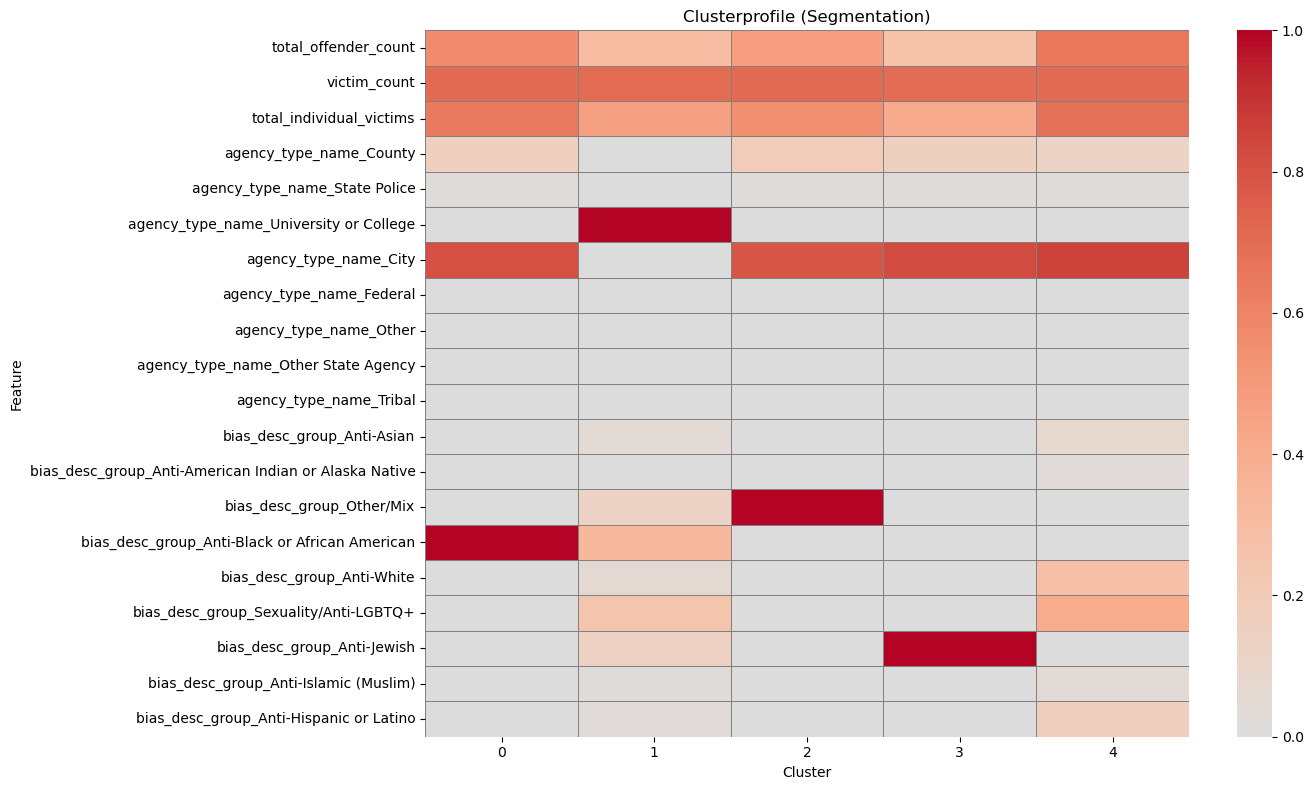

In [91]:
plt.figure(figsize = (14, 8))
sns.heatmap(cluster_profile_segments.T, cmap = "coolwarm", center = 0, linewidths = 0.5, linecolor = "gray")
plt.title("Clusterprofile (Segmentation)")
plt.xlabel("Cluster")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

By selecting a set of interpretable features clustering results became more meaningful, new clusters show clearer profiles, e.g.:

Cluster 0: Anti-Black bias

Cluster 1: University/college agencies

Cluster 2: “Other/Mix” bias

Cluster 3: Anti-Jewish incidents

Cluster 4: Slight Anti-White, Anti-LGBTQ+ and Anti-Hispanic bias -> less distinctive

### Focus on dominant biases in clusters

In [92]:
#Identify bias
bias_columns = [col for col in df_encoded.columns if col.startswith("bias_desc_group_")]

In [93]:
#Identify dominant bias per row
df_encoded["dominant_bias_group"] = df_encoded[bias_columns].idxmax(axis=1)

In [94]:
df_encoded["dominant_bias_group"].value_counts()

dominant_bias_group
bias_desc_group_Anti-Black or African American           83203
bias_desc_group_Sexuality/Anti-LGBTQ+                    41415
bias_desc_group_Other/Mix                                34776
bias_desc_group_Anti-Jewish                              29522
bias_desc_group_Anti-White                               27840
bias_desc_group_Anti-Hispanic or Latino                  16177
bias_desc_group_Anti-Asian                                7934
bias_desc_group_Anti-Islamic (Muslim)                     4366
bias_desc_group_Anti-American Indian or Alaska Native     2791
Name: count, dtype: int64

##### k-Means with 5 clusters

In [95]:
kmeans = KMeans(n_clusters = 5, random_state = 42)
labels = kmeans.fit_predict(df_segment_scaled)

df_encoded["Cluster"] = labels

In [96]:
crosstab = pd.crosstab(df_encoded["Cluster"], df_encoded["dominant_bias_group"])
print(crosstab)

dominant_bias_group  bias_desc_group_Anti-American Indian or Alaska Native  \
Cluster                                                                      
0                                                                    0       
1                                                                   36       
2                                                                    0       
3                                                                    0       
4                                                                 2755       

dominant_bias_group  bias_desc_group_Anti-Asian  \
Cluster                                           
0                                             0   
1                                           341   
2                                             0   
3                                             0   
4                                          7593   

dominant_bias_group  bias_desc_group_Anti-Black or African American  \
Cluster                 

Cluster 0: Dominated by Anti-Black bias

Cluster 1: Various biases

Cluster 2: Defined by Other/Mixed bias types

Cluster 3: Dominated by Anti-Jewish bias

Cluster 4: Various biases

##### Normalized visualization of dominant bias-groups per cluster

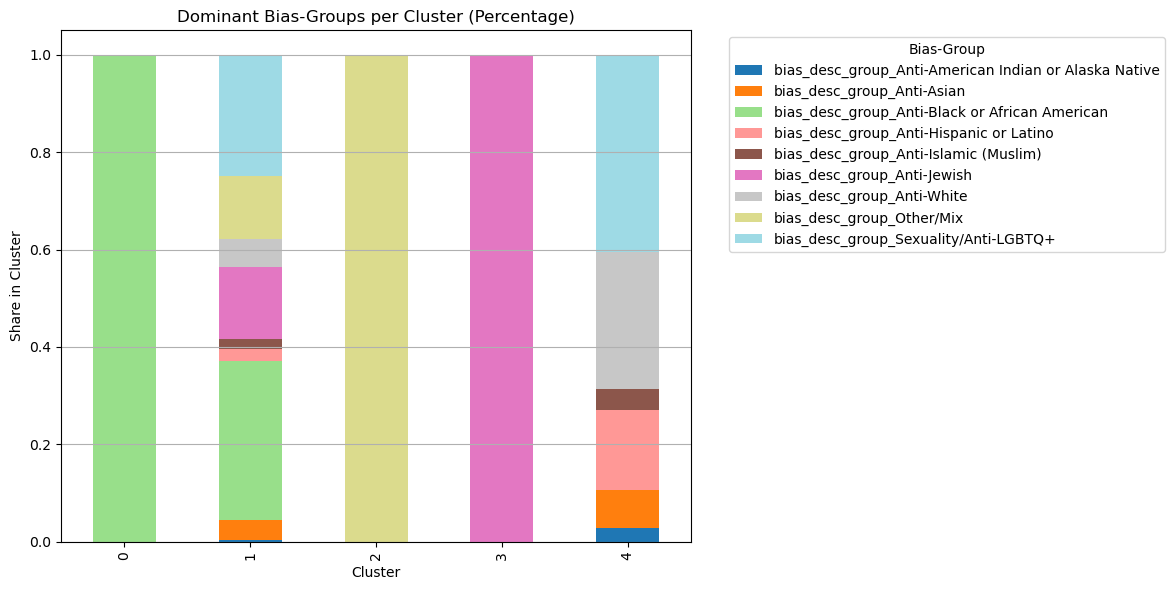

In [97]:
# Normalize
crosstab_normalized = crosstab.div(crosstab.sum(axis = 1), axis = 0)

# Bar plot of normalized crosstab
ax = crosstab_normalized.plot(kind = 'bar', stacked = True, figsize = (12, 6), colormap = 'tab20')
plt.title("Dominant Bias-Groups per Cluster (Percentage)")
plt.xlabel("Cluster")
plt.ylabel("Share in Cluster")
plt.legend(title = "Bias-Group", bbox_to_anchor=(1.05, 1), loc = 'upper left')
plt.grid(axis = 'y')
plt.tight_layout()
plt.show()

##### Investigating just one single bias-group -> Sexuality/Anti-LGBTQ+

In [98]:
# Filter bias-group 'Sexuality/Anti-LGBTQ+'
bias_column = "bias_desc_group_Sexuality/Anti-LGBTQ+"
df_lgbtq = df_encoded[df_encoded[bias_column] > 0].copy()

In [99]:
# Define relevant features
features = [
    'total_offender_count', 'victim_count', 'total_individual_victims',
    'agency_type_name_City', 'agency_type_name_State Police',
    'agency_type_name_University or College'
]
bias_check = df_lgbtq[features]

##### Scale data

In [100]:
bias_check_scaled = StandardScaler().fit_transform(bias_check)

##### PCA with 5 components

In [101]:
pca = PCA(n_components = 5)
bias_check_pca = pca.fit_transform(bias_check_scaled)

##### k_Means with 3 clusters

In [102]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
df_lgbtq['Cluster'] = kmeans.fit_predict(bias_check_pca)

##### Create cluster profile

In [103]:
cluster_profile = df_lgbtq.groupby('Cluster')[features].mean()
print(cluster_profile)

         total_offender_count  victim_count  total_individual_victims  \
Cluster                                                                 
0                    0.649374      0.707957                  0.699869   
1                    0.577788      0.713443                  0.632764   
2                    0.306892      0.703584                  0.523235   

         agency_type_name_City  agency_type_name_State Police  \
Cluster                                                         
0                     0.884505                            0.0   
1                     0.000000                            1.0   
2                     0.000000                            0.0   

         agency_type_name_University or College  
Cluster                                          
0                                           0.0  
1                                           0.0  
2                                           1.0  


##### Creating a cluster profile heatmap

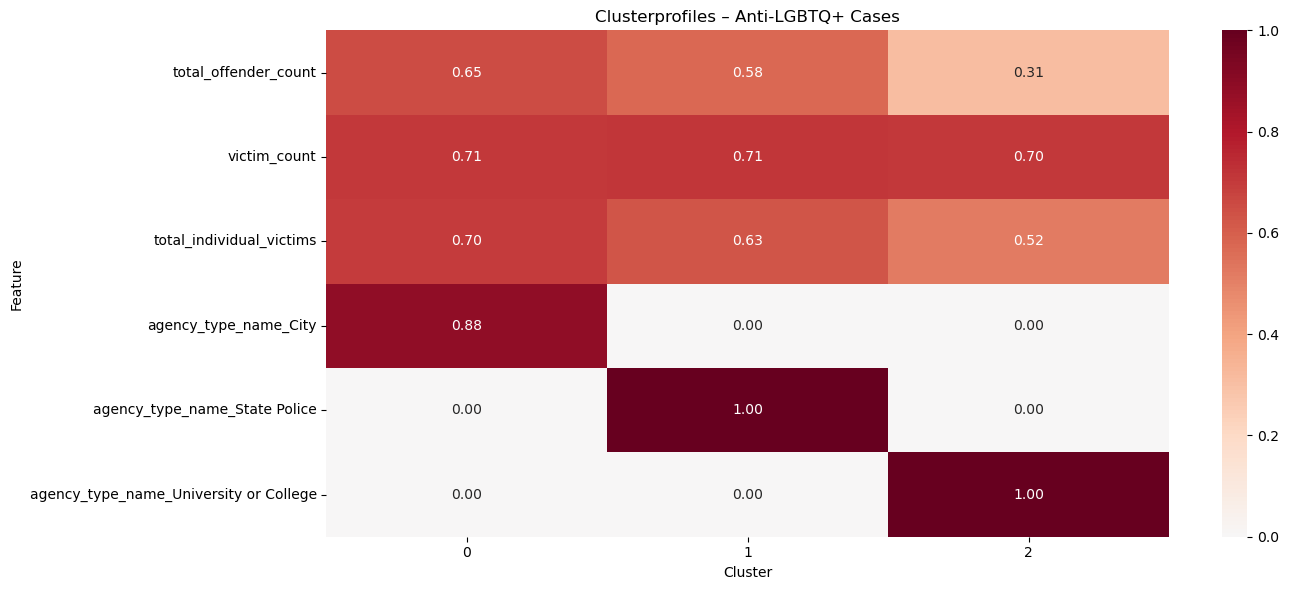

In [104]:
plt.figure(figsize=(14, 6))
sns.heatmap(cluster_profile.T, cmap = "RdBu_r", center = 0, annot = True, fmt = ".2f")
plt.title("Clusterprofiles – Anti-LGBTQ+ Cases")
plt.xlabel("Cluster")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

-> Doesn’t deliver much new or actionable insights

### Check PCA for latest years only

##### Latest Years

In [105]:
# Define latest years
last_years = sorted(df_raw['data_year'].dropna().unique())[-3:]
df_raw_actual = df_raw[df_raw['data_year'].isin(last_years)]

In [106]:
# Show actual data years
print(f"Latest years in data: {last_years}")

Latest years in data: [2021, 2022, 2023]


##### Drop columns not needed

In [107]:
# Define columns to drop for the actual data
drop_columns = [
    'incident_id', 'data_year', 'month', 'ori', 'pug_agency_name', 'pub_agency_unit',
    'state_abbr', 'state_name', 'population_group_code', 'division_name', 'incident_date',
    'offense_name', 'location_name', 'bias_desc', 'victim_types', 'adult_offender_count', 'juvenile_offender_count',
    'adult_victim_count', 'juvenile_victim_count'
]

# Clean the actual data by dropping unnecessary columns
df_clean_actual = df_raw_actual.drop(drop_columns, axis=1)
df_clean_actual.head()

agency_type_name region_name      population_group_description  \
219138             City        West    Cities from 25,000 thru 49,999   
219139             City        West      Cities from 2,500 thru 9,999   
219140             City        West      Cities from 2,500 thru 9,999   
219141     State Police        West  Non-MSA counties 100,000 or over   
219142     State Police        West  Non-MSA counties 100,000 or over   

        total_offender_count                     offender_race  \
219138                     2  American Indian or Alaska Native   
219139                     1                             White   
219140                     1                             White   
219141                     1  American Indian or Alaska Native   
219142                     0                     Not Specified   

            offender_ethnicity  victim_count  total_individual_victims  \
219138                 Unknown             1                       1.0   
219139  Not Hispanic or Latino             1                       1.0   
219140                 Unknown             1                       3.0   
219141           Not Specified             1                       1.0   
219142           Not Specified             1                       1.0   

       multiple_offense multiple_bias  \
219138                S             S   
219139                S             S   
219140                S             S   
219141                S             S   
219142                S             S   

                                    location_group offense_group  \
219138  Highway/Road/Alley/Street/Sidewalk/Parking       Assault   
219139     Store/Grocery/Supermarket/Shopping Mall  Intimidation   
219140                              Residence/Home       Assault   
219141                                       Other  Intimidation   
219142                                       Other     Vandalism   

       victim_types_group                 bias_desc_group  
219138         Individual           Sexuality/Anti-LGBTQ+  
219139         Individual  Anti-Black or African American  
219140         Individual           Sexuality/Anti-LGBTQ+  
219141         Individual                      Anti-White  
219142         Individual                      Anti-White

##### Remove null values

In [108]:
df_clean_actual.isnull().sum()

agency_type_name                   0
region_name                        0
population_group_description     375
total_offender_count               0
offender_race                      0
offender_ethnicity                 0
victim_count                       0
total_individual_victims        1642
multiple_offense                   0
multiple_bias                      0
location_group                     0
offense_group                      0
victim_types_group                 0
bias_desc_group                    0
dtype: int64

In [109]:
# Remove rows with missing values in the actual data
df_clean_actual = df_clean_actual.dropna()

##### Redefine categorical columns and encode data

In [110]:
# Redefine categorical columns for the actual data
categorical_columns_actual = df_clean_actual.select_dtypes(exclude=['number']).columns.tolist()
print(f"Categorical columns for actual data: {categorical_columns_actual}")

Categorical columns for actual data: ['agency_type_name', 'region_name', 'population_group_description', 'offender_race', 'offender_ethnicity', 'multiple_offense', 'multiple_bias', 'location_group', 'offense_group', 'victim_types_group', 'bias_desc_group']


In [111]:
# Encode categorical variables in the actual data
df_actual_encoded = pd.get_dummies(df_clean_actual, columns = categorical_columns_actual)

In [112]:
# Check the encoded DataFrame for actual data
df_actual_encoded.head()

total_offender_count  victim_count  total_individual_victims  \
219138                     2             1                       1.0   
219139                     1             1                       1.0   
219140                     1             1                       3.0   
219141                     1             1                       1.0   
219142                     0             1                       1.0   

        agency_type_name_City  agency_type_name_County  \
219138                   True                    False   
219139                   True                    False   
219140                   True                    False   
219141                  False                    False   
219142                  False                    False   

        agency_type_name_Federal  agency_type_name_Other  \
219138                     False                   False   
219139                     False                   False   
219140                     False                   False   
219141                     False                   False   
219142                     False                   False   

        agency_type_name_Other State Agency  agency_type_name_State Police  \
219138                                False                          False   
219139                                False                          False   
219140                                False                          False   
219141                                False                           True   
219142                                False                           True   

        agency_type_name_Tribal  ...  victim_types_group_Society/Public  \
219138                    False  ...                              False   
219139                    False  ...                              False   
219140                    False  ...                              False   
219141                    False  ...                              False   
219142                    False  ...                              False   

        bias_desc_group_Anti-American Indian or Alaska Native  \
219138                                              False       
219139                                              False       
219140                                              False       
219141                                              False       
219142                                              False       

        bias_desc_group_Anti-Asian  \
219138                       False   
219139                       False   
219140                       False   
219141                       False   
219142                       False   

        bias_desc_group_Anti-Black or African American  \
219138                                           False   
219139                                            True   
219140                                           False   
219141                                           False   
219142                                           False   

        bias_desc_group_Anti-Hispanic or Latino  \
219138                                    False   
219139                                    False   
219140                                    False   
219141                                    False   
219142                                    False   

        bias_desc_group_Anti-Islamic (Muslim)  bias_desc_group_Anti-Jewish  \
219138                                  False                        False   
219139                                  False                        False   
219140                                  False                        False   
219141                                  False                        False   
219142                                  False                        False   

        bias_desc_group_Anti-White  bias_desc_group_Other/Mix  \
219138                       False                      False   
219139                       False                      False   
21914

##### Check new DataFrame size

In [113]:
# Size of the dataset
print(f"\nSize of the dataset: {df_actual_encoded.shape[0]} rows and {df_actual_encoded.shape[1]} columns")


Size of the dataset: 32621 rows and 86 columns


Result is once again a large dataset.

##### Scale data

In [114]:
# Standardize numerical variables in the actual data
scaler = StandardScaler()
df_actual_scaled = scaler.fit_transform(df_actual_encoded)

##### PCA with 10 components

In [115]:
# Choosing n_components = 10 to reduce dimensionality
pca = PCA(n_components = 10, random_state = 42)
df_actual_pca = pca.fit_transform(df_actual_scaled)

In [116]:
# Explained variance check
print(f"Explained variance with {pca.n_components_} components: {np.sum(pca.explained_variance_ratio_):.3f}")

Explained variance with 10 components: 0.300


-> Very low varianvce explained.

##### Kneedle algorithm

In [117]:
inertia = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_actual_pca)
    inertia.append(kmeans.inertia_)

# Using Kneedle to determine the optimal k value
kneedle = KneeLocator(k_range, inertia, curve="convex", direction="decreasing")
optimal_k = kneedle.knee
print(f"Optimal k with Kneedle: {optimal_k}")

Optimal k with Kneedle: None


There is no obvious “elbow”.

##### Plotting elbow diagram

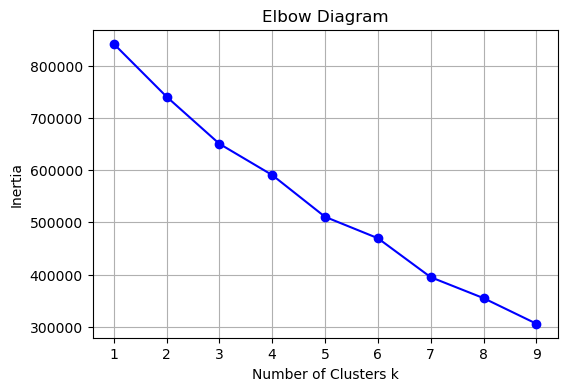

In [118]:
# Plotting another elbow diagram with Kneedle inflexion
plt.figure(figsize = (6, 4))
plt.plot(k_range, inertia, 'bo-', label = 'Inertia')
plt.xlabel("Number of Clusters k")
plt.ylabel("Inertia")
plt.title("Elbow Diagram")
plt.grid(True)
plt.show() 

#### k-Means with 4 clusters

In [119]:
kmeans = KMeans(n_clusters = 4, random_state = 42)
kmeans.fit(df_actual_pca)
labels = kmeans.labels_

##### Check silhouette score 

In [120]:
score = silhouette_score(df_actual_pca, labels)
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.307


When selecting only the latest three years and performing PCA and clustering, the silhouette score gets better -> but is still very low.

### Trying DBSCAN on data for latest years with min_samples = 10

##### DBSCAN may be more robust and might handle noisy data better than k-Means.

In [121]:
# Apply DBSCAN clustering with defined parameters
dbscan = DBSCAN(eps = 2, min_samples = 10) 
clusters = dbscan.fit_predict(df_actual_pca)

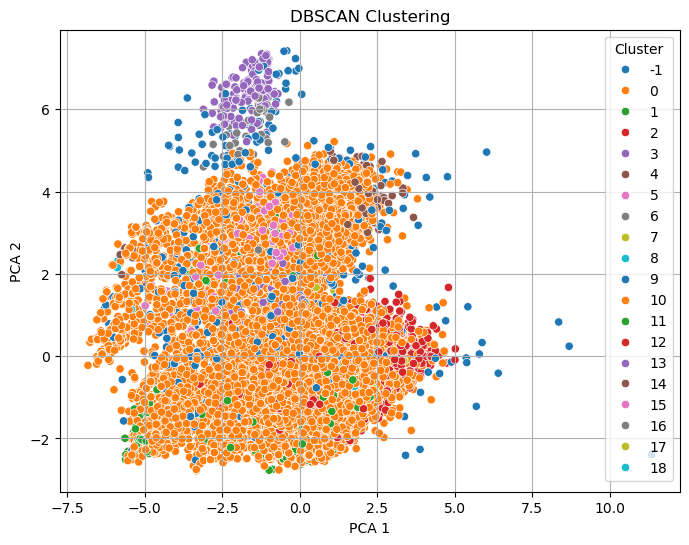

In [122]:
# Plot
plt.figure(figsize = (8, 6))
sns.scatterplot(x = df_actual_pca[:, 0], y = df_actual_pca[:, 1], hue = clusters, palette = 'tab10', legend = 'full')
plt.title('DBSCAN Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

Cluster 0 ist one large, dominant cluster here.

##### Using a k-distance plot to find a better value for the eps parameter -> max distance between two samples to be in the same neighborhood

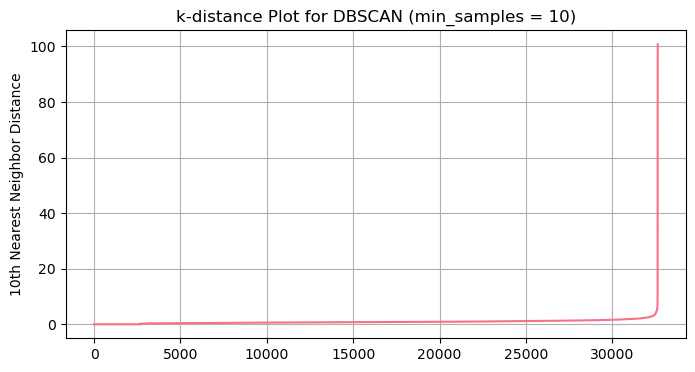

In [123]:
# Choose min_samples
neighbors = NearestNeighbors(n_neighbors = 10)
neighbors_fit = neighbors.fit(df_actual_pca)
distances, _ = neighbors_fit.kneighbors(df_actual_pca)

# Sort and plot the distances to find the elbow
distances = np.sort(distances[:, 9])  # 10th nearest neighbor
plt.figure(figsize = (8, 4))
plt.plot(distances)
plt.ylabel("10th Nearest Neighbor Distance")
plt.title("k-distance Plot for DBSCAN (min_samples = 10)")
plt.grid(True)
plt.show()

In [124]:
# Using Kneedle to detect the exact elbow
kneedle = KneeLocator(range(len(distances)), distances, S = 1.0, curve = "convex", direction = "increasing")
print("Estimated epsilon:", distances[kneedle.knee])

Estimated epsilon: 4.752998849923059


In [125]:
# Apply DBSCAN clustering again with improved eps parameter
dbscan = DBSCAN(eps = 5, min_samples = 10) 
clusters = dbscan.fit_predict(df_actual_pca)

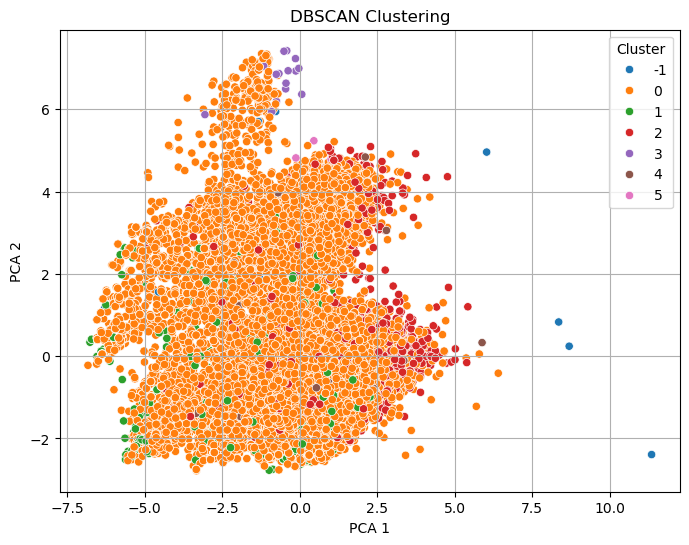

In [126]:
# Plot
plt.figure(figsize = (8, 6))
sns.scatterplot(x = df_actual_pca[:, 0], y = df_actual_pca[:, 1], hue = clusters, palette = 'tab10', legend = 'full')
plt.title('DBSCAN Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

No improvement -> Cluster 0 got even bigger.

In [127]:
df_dbscan = pd.DataFrame(df_actual_pca, columns = [f'PCA_{i+1}' for i in range(df_actual_pca.shape[1])])

# Add cluster labels 
df_dbscan['cluster'] = clusters

In [128]:
# Count the number of points in each cluster
df_dbscan['cluster'].value_counts()
cluster_centers = df_dbscan.groupby('cluster').mean()

In [129]:
# Reset index 
df_clean_actual = df_clean_actual.reset_index(drop = True)
df_dbscan = df_dbscan.reset_index(drop = True)

# Add 'Cluster' column to df_clean_actual
df_clean_actual['cluster'] = df_dbscan['cluster']

In [130]:
# Display the number of points in each cluster
df_clean_actual['cluster'].value_counts().sort_index()

cluster
-1       17
 0    30411
 1      886
 2     1173
 3       23
 4       92
 5       19
Name: count, dtype: int64

This overview confirms that cluster 0 is huge, while all other clusters are much smaller.

## Final clustering attempt with reduced/aggregated dataset (k-Means)

In [131]:
#Check columns again
df_raw.columns

Index(['incident_id', 'data_year', 'ori', 'pug_agency_name', 'pub_agency_unit',
       'agency_type_name', 'state_abbr', 'state_name', 'division_name',
       'region_name', 'population_group_code', 'population_group_description',
       'incident_date', 'adult_victim_count', 'juvenile_victim_count',
       'total_offender_count', 'adult_offender_count',
       'juvenile_offender_count', 'offender_race', 'offender_ethnicity',
       'victim_count', 'offense_name', 'total_individual_victims',
       'location_name', 'bias_desc', 'victim_types', 'multiple_offense',
       'multiple_bias', 'month', 'location_group', 'offense_group',
       'victim_types_group', 'bias_desc_group'],
      dtype='object')

In [132]:
# Remove unnecessary columns from the raw DataFrame
remove_columns = ['incident_id', 'ori', 'pug_agency_name', 'pub_agency_unit', 'agency_type_name', 'state_abbr', 'division_name', 'state_name', 'region_name', 'population_group_code', 'population_group_description', 'incident_date', 'adult_victim_count', 'juvenile_victim_count', 'multiple_bias','total_offender_count', 'adult_offender_count', 'offender_ethnicity',
       'juvenile_offender_count', 'total_individual_victims', 'victim_types', 'multiple_offense']
df_raw_small = df_raw.drop(columns = remove_columns)

In [133]:
# Display the first few rows of the cleaned DataFrame
df_raw_small.head()

data_year              offender_race  victim_count  \
0       1991  Black or African American             1   
1       1991  Black or African American             2   
2       1991  Black or African American             2   
3       1991  Black or African American             1   
4       1991                      White             1   

                                        offense_name  \
0                                 Aggravated Assault   
1  Aggravated Assault;Destruction/Damage/Vandalis...   
2  Aggravated Assault;Murder and Nonnegligent Man...   
3                                       Intimidation   
4                                       Intimidation   

                        location_name                       bias_desc  month  \
0                      Residence/Home  Anti-Black or African American      7   
1  Highway/Road/Alley/Street/Sidewalk                      Anti-White     12   
2                      Residence/Home                      Anti-White      7   
3                      Residence/Home                      Anti-White     10   
4                      School/College  Anti-Black or African American     10   

                               location_group offense_group  \
0                              Residence/Home       Assault   
1  Highway/Road/Alley/Street/Sidewalk/Parking       Assault   
2                              Residence/Home       Assault   
3                              Residence/Home  Intimidation   
4                              School/College  Intimidation   

  victim_types_group                 bias_desc_group  
0         Individual  Anti-Black or African American  
1         Individual                      Anti-White  
2         Individual                      Anti-White  
3         Individual                      Anti-White  
4         Individual  Anti-Black or African American

In [134]:
# Identify the last three years in the dataset
last_years = df_raw_small['data_year'].dropna().unique()[-3:]
df_raw_small_latest = df_raw_small[df_raw_small['data_year'].isin(last_years)]

In [135]:
# Display the size of the smaller DataFrame
df_raw_small_latest.size

381018

In [136]:
# Remove the 'data_year' column from the smaller DataFrame
remove_year = ['data_year']
df_raw_small_latest = df_raw_small_latest.drop(columns = remove_year)

In [137]:
# Number and percentage of missing values per column
missing_values = df_raw_small_latest.isnull().sum()
missing_percentage = (missing_values / len(df_raw_small_latest)) * 100
missing_info = pd.DataFrame({
    'Missing values': missing_values,
    'Percentage (%)': missing_percentage
})
missing_info = missing_info[missing_info['Missing values'] > 0].sort_values('Percentage (%)', ascending=False)

print("Missing values per column:")
if len(missing_info) > 0:
    display(missing_info)
else:
    print("No missing values found")

Missing values per column:
No missing values found


In [138]:
# Check unique values in 'bias_desc' column
df_raw_small_latest["bias_desc"].unique()

array(['Anti-Gay (Male)', 'Anti-Black or African American',
       'Anti-Lesbian (Female)', 'Anti-White',
       'Anti-Black or African American;Anti-Gay (Male)',
       'Anti-Transgender', 'Anti-Female',
       'Anti-Multiple Religions, Group', 'Anti-Jewish', 'Anti-Asian',
       'Anti-Hispanic or Latino',
       'Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)',
       'Anti-Catholic', 'Anti-American Indian or Alaska Native',
       'Anti-Gender Non-Conforming', 'Anti-Physical Disability',
       'Anti-Sikh', 'Anti-Other Race/Ethnicity/Ancestry',
       'Anti-Other Religion', 'Anti-Mental Disability',
       'Anti-Multiple Races, Group',
       'Anti-Eastern Orthodox (Russian, Greek, Other)', 'Anti-Bisexual',
       'Anti-Protestant', 'Anti-Buddhist', 'Anti-Other Christian',
       'Anti-American Indian or Alaska Native;Anti-Asian;Anti-Black or African American;Anti-Islamic (Muslim);Anti-White',
       'Anti-Native Hawaiian or Other Pacific Islander', 'Anti-Male',
       'A

In [139]:
# Aggregate bias descriptions into broader categories
def aggregate_bias_desc(name):
    # None/NaN/empty -> 'Unknown'
    if name is None or (isinstance(name, float) and pd.isna(name)):
        return 'Unknown'
    name = str(name).strip()
    if name == '':
        return 'Unknown'

    # Multiple biases (';')
    if ';' in name:
        return 'Multiple Biases'

    # Bias-Mapping
    gender = {'Anti-Male', 'Anti-Female'}

    religion = {
        'Anti-Jewish', 'Anti-Catholic', 'Anti-Islamic (Muslim)', 'Anti-Protestant',
        'Anti-Other Religion', 'Anti-Multiple Religions, Group', 'Anti-Other Christian',
        'Anti-Mormon', "Anti-Jehovah's Witness",
        'Anti-Eastern Orthodox (Greek, Russian, Other)', 'Anti-Hindu', 'Anti-Sikh',
        'Anti-Atheist/Agnostic'
    }

    disability = {'Anti-Physical Disability', 'Anti-Mental Disability'}

    gender_identity = {'Anti-Transgender', 'Anti-Gender Non-Conforming'}

    sexual_orientation = {
        'Anti-Lesbian (Female)', 'Anti-Gay (Male)', 'Anti-Bisexual', 'Anti-Heterosexual',
        'Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)'
    }

    race_ethnicity = {
        'Anti-Black or African American', 'Anti-White', 'Anti-Hispanic or Latino',
        'Anti-Asian', 'Anti-Arab', 'Anti-American Indian or Alaska Native',
        'Anti-Native Hawaiian or Other Pacific Islander', 'Anti-Multiple Races, Group',
        'Anti-Other Race/Ethnicity/Ancestry'
    }

    if name in gender:
        return 'Gender'
    elif name in religion:
        return 'Religion'
    elif name in disability:
        return 'Disability'
    elif name in gender_identity:
        return 'Gender Identity'
    elif name in sexual_orientation:
        return 'Sexual Orientation'
    elif name in race_ethnicity:
        return 'Race/Ethnicity/Ancestry'
    else:
        return 'Other' 

# Apply the aggregation function to the 'bias_desc' column:
df_raw_small_latest['bias_group'] = df_raw_small_latest['bias_desc'].apply(aggregate_bias_desc)

# Overview of the new bias groups
print(df_raw_small_latest['bias_group'].value_counts(dropna=False))

# Check originals in 'Other'
print(df_raw_small_latest.loc[df_raw_small_latest['bias_group'] == 'Other', 'bias_desc'].unique())


bias_group
Race/Ethnicity/Ancestry    19231
Religion                    6021
Sexual Orientation          5803
Gender Identity             1316
Multiple Biases             1079
Disability                   516
Other                        383
Gender                       289
Name: count, dtype: int64
['Anti-Eastern Orthodox (Russian, Greek, Other)' 'Anti-Buddhist'
 'Anti-Atheism/Agnosticism' 'Anti-Church of Jesus Christ']


In [140]:
# Fix mapping
# Map incorrectly classified 'Other' explicitly to 'Religion'
extra_map = {
    'Anti-Eastern Orthodox (Russian, Greek, Other)': 'Religion',
    'Anti-Buddhist': 'Religion',
    'Anti-Atheism/Agnosticism': 'Religion',
    'Anti-Church of Jesus Christ': 'Religion',
}

def aggregate_bias_desc(name):
    # None/NaN/empty -> 'Unknown'
    if name is None or (isinstance(name, float) and pd.isna(name)): return 'Unknown'
    name = str(name).strip()
    if name == '': return 'Unknown'

    # Multiple biases (';')
    if ';' in name: return 'Multiple Biases'

    # Extra mapping for specific cases
    if name in extra_map:
        return extra_map[name]
    

    # Mapping
    gender = {'Anti-Male', 'Anti-Female'}
    religion = {
        'Anti-Jewish','Anti-Catholic','Anti-Islamic (Muslim)','Anti-Protestant',
        'Anti-Other Religion','Anti-Multiple Religions, Group','Anti-Other Christian',
        'Anti-Mormon',"Anti-Jehovah's Witness",
        'Anti-Eastern Orthodox (Greek, Russian, Other)','Anti-Hindu','Anti-Sikh',
        'Anti-Atheist/Agnostic'
    }
    disability = {'Anti-Physical Disability','Anti-Mental Disability'}
    gender_identity = {'Anti-Transgender','Anti-Gender Non-Conforming'}
    sexual_orientation = {
        'Anti-Lesbian (Female)','Anti-Gay (Male)','Anti-Bisexual','Anti-Heterosexual',
        'Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)'
    }
    race_ethnicity = {
        'Anti-Black or African American','Anti-White','Anti-Hispanic or Latino','Anti-Asian','Anti-Arab',
        'Anti-American Indian or Alaska Native','Anti-Native Hawaiian or Other Pacific Islander',
        'Anti-Multiple Races, Group','Anti-Other Race/Ethnicity/Ancestry'
    }

    if name in gender: return 'Gender'
    elif name in religion: return 'Religion'
    elif name in disability: return 'Disability'
    elif name in gender_identity: return 'Gender Identity'
    elif name in sexual_orientation: return 'Sexual Orientation'
    elif name in race_ethnicity: return 'Race/Ethnicity/Ancestry'
    else: return 'Other'

# Apply
df_raw_small_latest['bias_group'] = df_raw_small_latest['bias_desc'].apply(aggregate_bias_desc)

# Check
print(df_raw_small_latest['bias_group'].value_counts(dropna=False))
print(df_raw_small_latest.loc[df_raw_small_latest['bias_group']=='Other', 'bias_desc'].unique())

bias_group
Race/Ethnicity/Ancestry    19231
Religion                    6404
Sexual Orientation          5803
Gender Identity             1316
Multiple Biases             1079
Disability                   516
Gender                       289
Name: count, dtype: int64
[]


In [141]:
# Display the first few rows of the updated DataFrame
df_raw_small_latest.head()

offender_race  victim_count  \
219138  American Indian or Alaska Native             1   
219139                             White             1   
219140                             White             1   
219141  American Indian or Alaska Native             1   
219142                     Not Specified             1   

                                    offense_name  \
219138                        Aggravated Assault   
219139                              Intimidation   
219140                            Simple Assault   
219141                              Intimidation   
219142  Destruction/Damage/Vandalism of Property   

                             location_name                       bias_desc  \
219138  Highway/Road/Alley/Street/Sidewalk                 Anti-Gay (Male)   
219139                     Specialty Store  Anti-Black or African American   
219140                      Residence/Home           Anti-Lesbian (Female)   
219141                          Cyberspace                      Anti-White   
219142                         Field/Woods                      Anti-White   

        month                              location_group offense_group  \
219138      8  Highway/Road/Alley/Street/Sidewalk/Parking       Assault   
219139      4     Store/Grocery/Supermarket/Shopping Mall  Intimidation   
219140      9                              Residence/Home       Assault   
219141      7                                       Other  Intimidation   
219142      8                                       Other     Vandalism   

       victim_types_group                 bias_desc_group  \
219138         Individual           Sexuality/Anti-LGBTQ+   
219139         Individual  Anti-Black or African American   
219140         Individual           Sexuality/Anti-LGBTQ+   
219141         Individual                      Anti-White   
219142         Individual                      Anti-White   

                     bias_group  
219138       Sexual Orientation  
219139  Race/Ethnicity/Ancestry  
219140       Sexual Orientation  
219141  Race/Ethnicity/Ancestry  
219142  Race/Ethnicity/Ancestry

In [142]:
# Drop the 'bias_desc' column as it is no longer needed (and change DataFrame name)
df_small_latest = df_raw_small_latest.drop(columns=['bias_desc'])

In [143]:
# Check teh unique values of the 'location_name' column
df_small_latest["location_name"].unique()

array(['Highway/Road/Alley/Street/Sidewalk', 'Specialty Store',
       'Residence/Home', 'Cyberspace', 'Field/Woods',
       'Parking/Drop Lot/Garage', 'Government/Public Building',
       'Parking/Drop Lot/Garage;Residence/Home', 'Hotel/Motel/Etc.',
       'Commercial/Office Building', 'Bar/Nightclub',
       'Church/Synagogue/Temple/Mosque', 'Shelter-Mission/Homeless',
       'School/College', 'Service/Gas Station', 'Convenience Store',
       'Air/Bus/Train Terminal', 'Lake/Waterway/Beach',
       'Jail/Prison/Penitentiary/Corrections Facility', 'Other/Unknown',
       'Restaurant', 'Bank/Savings and Loan', 'Auto Dealership New/Used',
       'School-Elementary/Secondary', 'Construction Site',
       'Rental Storage Facility', 'School-College/University',
       'Shopping Mall', 'Department/Discount Store',
       'Arena/Stadium/Fairgrounds/Coliseum',
       "Drug Store/Doctor's Office/Hospital", 'Grocery/Supermarket',
       'Dock/Wharf/Freight/Modal Terminal', 'Park/Playground',
  

In [144]:
# Aggregate location names into broader categories
def aggregate_location(name):
    if pd.isna(name) or str(name).strip() == "":
        return "Unknown"

    # Multiple locations
    if ";" in str(name):
        return "Multiple Locations"

    loc = str(name).strip()

    # Mapping
    residence = {
        'Residence/Home','Hotel/Motel/Etc.','Shelter-Mission/Homeless',
        'Daycare Facility','Abandoned/Condemned Structure','Rental Storage Facility'
    }
    public_space = {
        'Highway/Road/Alley/Street/Sidewalk','Field/Woods','Park/Playground',
        'Camp/Campground','Lake/Waterway/Beach','Rest Area','Tribal Lands'
    }
    education = {
        'School/College','School-Elementary/Secondary','School-College/University','Community Center'
    }
    religious = {'Church/Synagogue/Temple/Mosque'}
    commercial = {
        'Specialty Store','Convenience Store','Department/Discount Store','Grocery/Supermarket',
        'Shopping Mall','Liquor Store','Restaurant','Bar/Nightclub','Bank/Savings and Loan',
        'Auto Dealership New/Used','Service/Gas Station',"Drug Store/Doctor's Office/Hospital"
    }
    entertainment = {
        'Arena/Stadium/Fairgrounds/Coliseum','Amusement Park','Gambling Facility/Casino/Race Track'
    }
    work = {
        'Commercial/Office Building','Industrial Site','Construction Site',
        'Government/Public Building','Military Installation'
    }
    transport = {
        'Air/Bus/Train Terminal','Dock/Wharf/Freight/Modal Terminal',
        'ATM Separate from Bank','Parking/Drop Lot/Garage'
    }
    correctional = {'Jail/Prison/Penitentiary/Corrections Facility'}
    digital = {'Cyberspace'}

    if loc in residence: return 'Residence/Housing'
    elif loc in public_space: return 'Public Space/Outdoors'
    elif loc in education: return 'Education'
    elif loc in religious: return 'Religious Institution'
    elif loc in commercial: return 'Commercial/Retail'
    elif loc in entertainment: return 'Entertainment/Leisure'
    elif loc in work: return 'Work/Institutional'
    elif loc in transport: return 'Transport/Transit'
    elif loc in correctional: return 'Correctional Facility'
    elif loc in digital: return 'Digital/Virtual'
    else: return 'Other/Unknown'

# New column
df_small_latest['location_group'] = df_small_latest['location_name'].apply(aggregate_location)

# Overview
print(df_small_latest['location_group'].value_counts(dropna=False))
print(df_small_latest.loc[df_small_latest['location_group']=='Other/Unknown','location_name'].unique())

location_group
Residence/Housing        9879
Public Space/Outdoors    7268
Commercial/Retail        4508
Education                3520
Other/Unknown            3064
Transport/Transit        2535
Work/Institutional       1547
Religious Institution    1285
Correctional Facility     433
Digital/Virtual           396
Entertainment/Leisure     124
Multiple Locations         79
Name: count, dtype: int64
['Other/Unknown' 'Farm Facility']


In [145]:
# Display the first few rows of the updated DataFrame
df_small_latest.head()

offender_race  victim_count  \
219138  American Indian or Alaska Native             1   
219139                             White             1   
219140                             White             1   
219141  American Indian or Alaska Native             1   
219142                     Not Specified             1   

                                    offense_name  \
219138                        Aggravated Assault   
219139                              Intimidation   
219140                            Simple Assault   
219141                              Intimidation   
219142  Destruction/Damage/Vandalism of Property   

                             location_name  month         location_group  \
219138  Highway/Road/Alley/Street/Sidewalk      8  Public Space/Outdoors   
219139                     Specialty Store      4      Commercial/Retail   
219140                      Residence/Home      9      Residence/Housing   
219141                          Cyberspace      7        Digital/Virtual   
219142                         Field/Woods      8  Public Space/Outdoors   

       offense_group victim_types_group                 bias_desc_group  \
219138       Assault         Individual           Sexuality/Anti-LGBTQ+   
219139  Intimidation         Individual  Anti-Black or African American   
219140       Assault         Individual           Sexuality/Anti-LGBTQ+   
219141  Intimidation         Individual                      Anti-White   
219142     Vandalism         Individual                      Anti-White   

                     bias_group  
219138       Sexual Orientation  
219139  Race/Ethnicity/Ancestry  
219140       Sexual Orientation  
219141  Race/Ethnicity/Ancestry  
219142  Race/Ethnicity/Ancestry

In [146]:
# Drop the 'location_name' column as it is no longer needed
df_small_latest = df_small_latest.drop(columns=['location_name'])

In [147]:
# Display the first few rows of the updated DataFrame
df_small_latest.head()

offender_race  victim_count  \
219138  American Indian or Alaska Native             1   
219139                             White             1   
219140                             White             1   
219141  American Indian or Alaska Native             1   
219142                     Not Specified             1   

                                    offense_name  month  \
219138                        Aggravated Assault      8   
219139                              Intimidation      4   
219140                            Simple Assault      9   
219141                              Intimidation      7   
219142  Destruction/Damage/Vandalism of Property      8   

               location_group offense_group victim_types_group  \
219138  Public Space/Outdoors       Assault         Individual   
219139      Commercial/Retail  Intimidation         Individual   
219140      Residence/Housing       Assault         Individual   
219141        Digital/Virtual  Intimidation         Individual   
219142  Public Space/Outdoors     Vandalism         Individual   

                       bias_desc_group               bias_group  
219138           Sexuality/Anti-LGBTQ+       Sexual Orientation  
219139  Anti-Black or African American  Race/Ethnicity/Ancestry  
219140           Sexuality/Anti-LGBTQ+       Sexual Orientation  
219141                      Anti-White  Race/Ethnicity/Ancestry  
219142                      Anti-White  Race/Ethnicity/Ancestry

In [148]:
# Check the unique values of the 'offense_name' column
df_small_latest["offense_name"].unique()

array(['Aggravated Assault', 'Intimidation', 'Simple Assault',
       'Destruction/Damage/Vandalism of Property',
       'Destruction/Damage/Vandalism of Property;Intimidation',
       'All Other Larceny;Destruction/Damage/Vandalism of Property',
       'Theft of Motor Vehicle Parts or Accessories',
       'Burglary/Breaking & Entering', 'Theft From Building',
       'Drug/Narcotic Violations',
       'Counterfeiting/Forgery;Pocket-picking', 'Motor Vehicle Theft',
       'All Other Larceny;Destruction/Damage/Vandalism of Property;Theft From Motor Vehicle',
       'Drug Equipment Violations', 'Counterfeiting/Forgery',
       'All Other Larceny', 'Pocket-picking', 'Shoplifting',
       'False Pretenses/Swindle/Confidence Game',
       'All Other Larceny;Destruction/Damage/Vandalism of Property;Intimidation',
       'Drug Equipment Violations;Drug/Narcotic Violations',
       'Identity Theft', 'Stolen Property Offenses', 'Rape',
       'Theft From Motor Vehicle',
       'Credit Card/Autom

In [149]:
# Aggregate offense names into broader categories
def aggregate_offense(name):
    # None/NaN/empty -> "Unknown"
    if name is None or (isinstance(name, float) and pd.isna(name)):
        return "Unknown"
    s = str(name).strip()
    if s == "":
        return "Unknown"

    # Multiple offenses
    if ";" in s:
        return "Multiple Offenses"

    # Mapping
    crime_against_persons = {
        "Aggravated Assault", "Simple Assault", "Intimidation",
        "Robbery", "Kidnapping/Abduction",
        "Murder and Nonnegligent Manslaughter", "Negligent Manslaughter"
    }

    sexual_offenses = {
        "Rape", "Sodomy", "Sexual Assault With An Object",
        "Criminal Sexual Contact", "Statutory Rape"
    }

    property_damage = {
        "Destruction/Damage/Vandalism of Property", "Arson"
    }

    burglary_larceny_theft = {
        "Burglary/Breaking & Entering", "All Other Larceny", "Shoplifting",
        "Theft From Building", "Theft From Motor Vehicle",
        "Theft of Motor Vehicle Parts or Accessories",
        "Purse-snatching", "Pocket-picking", "Motor Vehicle Theft",
        "Stolen Property Offenses", "Identity Theft",
        "False Pretenses/Swindle/Confidence Game", "Counterfeiting/Forgery",
        "Credit Card/Automated Teller Machine Fraud", "Embezzlement",
        "Wire Fraud", "Impersonation", "Welfare Fraud",
        "Theft From Coin-Operated Machine or Device"
    }

    drugs = {
        "Drug/Narcotic Violations", "Drug Equipment Violations"
    }

    weapons = {"Weapon Law Violations"}

    public_order_other = {
        "Animal Cruelty", "Bribery", "Extortion/Blackmail",
        "Prostitution", "Assisting or Promoting Prostitution",
        "Human Trafficking, Commercial Sex Acts",
        "Human Trafficking, Involuntary Servitude",
        "Hacking/Computer Invasion", "Treason", "Not Specified",
        "Federal Liquor Offenses"
    }


    if s in crime_against_persons:
        return "Violent Crime (Person)"
    elif s in sexual_offenses:
        return "Sexual Offense"
    elif s in property_damage:
        return "Property Damage/Arson"
    elif s in burglary_larceny_theft:
        return "Burglary/Larceny/Fraud/Theft"
    elif s in drugs:
        return "Drug Offense"
    elif s in weapons:
        return "Weapons Law"
    elif s in public_order_other:
        return "Public Order / Other"
    else:
        return "Other/Unknown"


df_small_latest["offense_group"] = df_small_latest["offense_name"].apply(aggregate_offense)

print(df_small_latest["offense_group"].value_counts(dropna=False))

# Check
print(df_small_latest.loc[df_small_latest["offense_group"]=="Other/Unknown","offense_name"].unique()[:50])

offense_group
Violent Crime (Person)          21554
Property Damage/Arson            8644
Burglary/Larceny/Fraud/Theft     2268
Multiple Offenses                1313
Drug Offense                      412
Sexual Offense                    160
Public Order / Other              127
Weapons Law                       126
Other/Unknown                      34
Name: count, dtype: int64
['Pornography/Obscene Material']


In [150]:
# Display the first few rows of the updated DataFrame
df_small_latest.head()

offender_race  victim_count  \
219138  American Indian or Alaska Native             1   
219139                             White             1   
219140                             White             1   
219141  American Indian or Alaska Native             1   
219142                     Not Specified             1   

                                    offense_name  month  \
219138                        Aggravated Assault      8   
219139                              Intimidation      4   
219140                            Simple Assault      9   
219141                              Intimidation      7   
219142  Destruction/Damage/Vandalism of Property      8   

               location_group           offense_group victim_types_group  \
219138  Public Space/Outdoors  Violent Crime (Person)         Individual   
219139      Commercial/Retail  Violent Crime (Person)         Individual   
219140      Residence/Housing  Violent Crime (Person)         Individual   
219141        Digital/Virtual  Violent Crime (Person)         Individual   
219142  Public Space/Outdoors   Property Damage/Arson         Individual   

                       bias_desc_group               bias_group  
219138           Sexuality/Anti-LGBTQ+       Sexual Orientation  
219139  Anti-Black or African American  Race/Ethnicity/Ancestry  
219140           Sexuality/Anti-LGBTQ+       Sexual Orientation  
219141                      Anti-White  Race/Ethnicity/Ancestry  
219142                      Anti-White  Race/Ethnicity/Ancestry

In [151]:
# Drop the 'offense_name' column as it is no longer needed
df_small_latest.drop(columns=["offense_name"], inplace=True)

In [152]:
# Create separate lists for numerical and categorical columns
numeric_columns = df_small_latest.select_dtypes(include = ['number']).columns.tolist()
categorical_columns = df_small_latest.select_dtypes(exclude =['number']).columns.tolist()

print(f"\nNumerical columns ({len(numeric_columns)}): {numeric_columns}")
print(f"Categorical columns ({len(categorical_columns)}): {categorical_columns}")


Numerical columns (2): ['victim_count', 'month']
Categorical columns (6): ['offender_race', 'location_group', 'offense_group', 'victim_types_group', 'bias_desc_group', 'bias_group']


In [153]:
# Check skewness of numerical column(s)

if len(numeric_columns) > 0:
    skewness = df_small_latest[numeric_columns].skew().sort_values(ascending = False)
    kurtosis = df_small_latest[numeric_columns].kurtosis().sort_values(ascending = False)

    distribution_stats = pd.DataFrame({
        'Skewness': skewness,
        'Kurtosis': kurtosis
    })

def interpret_skewness(skew):
    if abs(skew) < 0.5:
        return "≈ Symmetric"
    elif abs(skew) < 1:
        return "Moderately skewed"
    else:
        return "Highly skewed"

def interpret_kurtosis(kurt):
    if kurt < 3:
        return "Platykurtic (light tails)"
    elif kurt == 3:
        return "Mesokurtic (normal)"
    else:
        return "Leptokurtic (heavy tails)"

# Create DataFrame
distribution_stats = pd.DataFrame({
    'Skewness': skewness,
    'Skewness_Interpretation': skewness.map(interpret_skewness),
    'Kurtosis': kurtosis,
    'Kurtosis_Interpretation': kurtosis.map(interpret_kurtosis)
})

# Output
print("Distribution statistics with interpretation (sorted by skewness):")
display(distribution_stats)

Distribution statistics with interpretation (sorted by skewness):


Skewness Skewness_Interpretation   Kurtosis  \
victim_count  0.829943       Moderately skewed  15.214083   
month        -0.045992             ≈ Symmetric  -1.140187   

                Kurtosis_Interpretation  
victim_count  Leptokurtic (heavy tails)  
month         Platykurtic (light tails)

In [154]:
# Encoding categorical variables
df_small_encoded = pd.get_dummies(df_small_latest, columns = categorical_columns)

In [155]:
# Standardize numerical variables
scaler = StandardScaler()
df_small_scaled = scaler.fit_transform(df_small_encoded)

In [156]:
# Performing PCA to reduce dimensionality while retaining 90% of variance
pca = PCA(n_components = 0.90, random_state = 42)
df_small_pca = pca.fit_transform(df_small_scaled)
print(f"New Dimensions: {df_small_pca.shape[1]}")

New Dimensions: 36


In [157]:
# Get feature importance from PCA components
feature_names = df_small_encoded.columns
n_components_to_show = 5

for i in range(n_components_to_show):
    component = pca.components_[i]
    # Get top 10 most important features for this component
    top_indices = np.argsort(np.abs(component))[-10:]
    top_features = [(feature_names[idx], component[idx]) for idx in top_indices]
    
    print(f"\nPC{i+1} - Top contributing features:")
    for feature, weight in sorted(top_features, key = lambda x: abs(x[1]), reverse = True):
        print(f"  {feature}: {weight:.3f}")


PC1 - Top contributing features:
  victim_types_group_Individual: -0.383
  offense_group_Property Damage/Arson: 0.368
  offense_group_Violent Crime (Person): -0.354
  bias_group_Religion: 0.317
  bias_desc_group_Anti-Jewish: 0.272
  bias_group_Race/Ethnicity/Ancestry: -0.205
  victim_types_group_Business: 0.203
  victim_types_group_Religious Organization: 0.183
  offender_race_White: -0.182
  location_group_Religious Institution: 0.181

PC2 - Top contributing features:
  bias_desc_group_Sexuality/Anti-LGBTQ+: 0.508
  bias_group_Race/Ethnicity/Ancestry: -0.494
  bias_group_Sexual Orientation: 0.474
  bias_desc_group_Anti-Black or African American: -0.334
  bias_group_Gender Identity: 0.147
  victim_types_group_Individual: 0.136
  bias_desc_group_Anti-White: -0.112
  victim_types_group_Society/Public: -0.099
  location_group_Residence/Housing: 0.093
  bias_desc_group_Anti-Hispanic or Latino: -0.091

PC3 - Top contributing features:
  victim_types_group_Society/Public: 0.521
  offense_gr

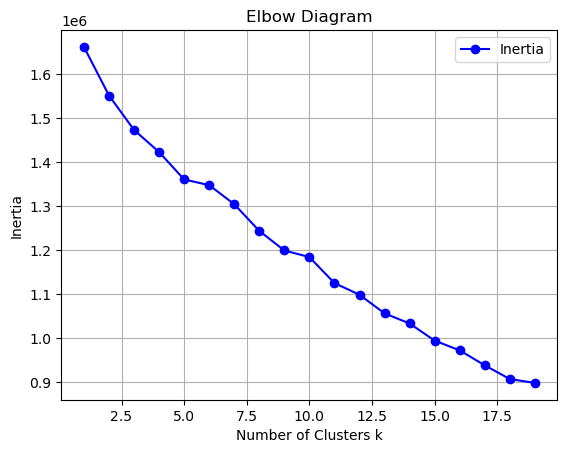

In [158]:
#Setting k_range to min 1 and max 19 (inclusive) clusters
inertia = []
k_range = range(1, 20)

for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(df_small_pca)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters k')
plt.ylabel('Inertia')
plt.title('Elbow Diagram')
plt.legend(['Inertia'])
plt.grid(True)
plt.show()


In [159]:
# Using Kneedle to determine the optimal k value
kneedle = KneeLocator(k_range, inertia, curve="convex", direction = "decreasing")
optimal_k = kneedle.knee
print(f"Optimal k with Kneedle: {optimal_k}")

Optimal k with Kneedle: 11


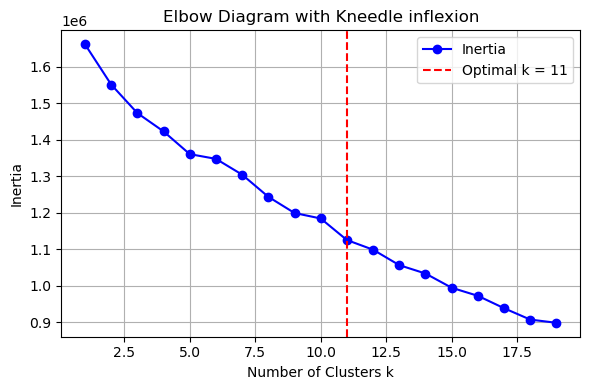

In [160]:
# Plotting the elbow diagram with Kneedle inflexion
plt.figure(figsize = (6, 4))
plt.plot(k_range, inertia, 'bo-', label = 'Inertia')
plt.xlabel("Number of Clusters k")
plt.ylabel("Inertia")
plt.title("Elbow Diagram with Kneedle inflexion")

plt.axvline(x = optimal_k, color = 'red', linestyle = '--', label = f'Optimal k = {optimal_k}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [161]:
# Perform k-Means clustering with the optimal k value
kmeans = KMeans(n_clusters = 6, random_state = 42)
kmeans.fit(df_small_pca)
labels = kmeans.labels_

In [162]:
# Determine silhouette score for the optimal k value
score = silhouette_score(df_small_pca, labels)
print(f"Silhouette Score (k={optimal_k}): {score:.3f}")

Silhouette Score (k=11): 0.101


In [163]:
# Score Interpretation:
def interpret_silhouette_score(score):
    if score > 0.7:
        return "Strong clustering structure"
    elif score > 0.5:
        return "Reasonable clustering structure"
    elif score > 0.25:
        return "Weak clustering structure"
    else:
        return "No clear clustering structure"

print(f"Silhouette Score: {score:.3f} -> {interpret_silhouette_score(score)}")

Silhouette Score: 0.101 -> No clear clustering structure


-> Still very low score, no clear clustering structure!

---------------------------------------------------------------------------

# Business-Driven Grouping

A business-driven approach appears more useful than relying solely on unsupervised machine learning, as DBSCAN and k-Means fail to reveal clear or meaningful group structures due to the complex and overlapping nature of the data. 

ML techniques could potentially benefit from more advanced feature engineering (developing ratios etc.) but the resulting clusters would likely lack interpretability and offer limited value for designing effective hate crime prevention programs.

The EDA provides sound findings on frequencies, target groups and regional characteristics from which specific measures might be derived.

### Investigating bias-groups

##### Count bias group per US state for all years in data

In [164]:
bias_counts_all_years = (
    df_raw.groupby(['state_abbr', 'bias_desc_group'])
    .size()
    .reset_index(name = 'count')
)

##### Sort data and determine dominant bias-group per US state

In [165]:
# Sort state name and bias-group
bias_sorted_all = bias_counts_all_years.sort_values(['state_abbr', 'count'], ascending = [True, False])

# Extract dominant bias-group
top_bias_all_years = bias_sorted_all.groupby('state_abbr').nth(0).reset_index()

# Print
print("Top Bias-Group per State (All Years):")
for _, row in top_bias_all_years.iterrows():
    print(f"{row['state_abbr']:<4} 1st: {row['bias_desc_group']}")

Top Bias-Group per State (All Years):
AK   1st: Anti-Black or African American
AL   1st: Other/Mix
AR   1st: Anti-White
AZ   1st: Anti-Black or African American
CA   1st: Anti-Black or African American
CO   1st: Anti-Black or African American
CT   1st: Anti-Black or African American
DC   1st: Sexuality/Anti-LGBTQ+
DE   1st: Anti-Black or African American
FL   1st: Anti-Black or African American
FS   1st: Anti-Black or African American
GA   1st: Anti-Black or African American
GM   1st: Anti-White
HI   1st: Anti-White
IA   1st: Anti-Black or African American
ID   1st: Anti-Black or African American
IL   1st: Anti-Black or African American
IN   1st: Anti-Black or African American
KS   1st: Anti-Black or African American
KY   1st: Anti-Black or African American
LA   1st: Anti-Black or African American
MA   1st: Anti-Black or African American
MD   1st: Anti-Black or African American
ME   1st: Anti-Black or African American
MI   1st: Anti-Black or African American
MN   1st: Anti-Black or Afr

##### Visualize dominant bias-group per US state for all years 

In [166]:
# Plot
fig = px.choropleth(
    top_bias_all_years,
    locations = 'state_abbr',
    locationmode = 'USA-states',
    color = 'bias_desc_group',
    scope = 'usa',
    title = 'Dominant bias-group per US state (all years)',
    color_discrete_sequence = px.colors.qualitative.Set2,
    labels = {'bias_desc_group': 'Dominant bias-group'}
)

fig.show()

Most states show Anti-Black or African American as most frequent bias motivation in reported hate crimes. There are some exceptions, like New York, where Anti-Jewish incidents are most common, or D.C., where Anti-LGBTQ+ is the top category. In a few other states, Anti-White or Other/Mix were reported most often.

##### Count bias group per US state for latest year in data only

In [167]:
# Determine latest year
latest_year = df_raw['data_year'].max()
df_latest = df_raw[df_raw['data_year'] == latest_year]

In [168]:
bias_counts = (
    df_latest
    .groupby(['state_abbr', 'bias_desc_group'])
    .size()
    .reset_index(name = 'count')
)

##### Sort values and determine dominant and second dominant bias-group per US state

In [169]:
# Sort by state and count
bias_sorted = bias_counts.sort_values(['state_abbr', 'count'], ascending = [True, False])

# Dominant bias-group per state
top1 = bias_sorted.groupby('state_abbr').nth(0).reset_index()
top1['rank'] = '1st'

# Second dominant bias-group per state
top2 = bias_sorted.groupby('state_abbr').nth(1).reset_index()
top2['rank'] = '2nd'

# Concat top 1 and top 2 data
top_biases = pd.concat([top1, top2], ignore_index=True)

# Pivot
pivoted = top_biases.pivot(index = 'state_abbr', columns = 'rank', values = 'bias_desc_group').reset_index()

# Display the top biases per state
for _, row in pivoted.iterrows():
    print(f"{row['state_abbr']:<4} 1st: {row['1st']:<35} 2nd: {row['2nd']}")

AK   1st: Sexuality/Anti-LGBTQ+               2nd: Anti-Black or African American
AL   1st: Other/Mix                           2nd: Anti-Black or African American
AR   1st: Other/Mix                           2nd: Anti-Black or African American
AZ   1st: Anti-Black or African American      2nd: Other/Mix
CA   1st: Anti-Black or African American      2nd: Sexuality/Anti-LGBTQ+
CO   1st: Sexuality/Anti-LGBTQ+               2nd: Anti-Black or African American
CT   1st: Other/Mix                           2nd: Anti-Black or African American
DC   1st: Sexuality/Anti-LGBTQ+               2nd: Other/Mix
DE   1st: Anti-Jewish                         2nd: Anti-Black or African American
FL   1st: Anti-Jewish                         2nd: Anti-Black or African American
FS   1st: Anti-Jewish                         2nd: Anti-Black or African American
GA   1st: Anti-Black or African American      2nd: Other/Mix
HI   1st: Anti-Black or African American      2nd: Other/Mix
IA   1st: Anti-Black or Afr

In [170]:
# Plot dominant bias-group
fig1 = px.choropleth(
    top_biases[top_biases['rank'] == '1st'],
    locations = 'state_abbr',
    locationmode = 'USA-states',
    color = 'bias_desc_group',
    scope = 'usa',
    title = f"Dominant bias-group per US state ({latest_year})",
    color_discrete_sequence = px.colors.qualitative.Set1,
    labels = {'bias_desc_group': 'bias-group'}
)

# Plot second dominant bias-group
fig2 = px.choropleth(
    top_biases[top_biases['rank'] == '2nd'],
    locations = 'state_abbr',
    locationmode = 'USA-states',
    color = 'bias_desc_group',
    scope = 'usa',
    title = f"Second dominant bias-group per US state ({latest_year})",
    color_discrete_sequence = px.colors.qualitative.Set3,
    labels = {'bias_desc_group': 'bias-group'}
)

fig1.show()
fig2.show()

In 2023 most states have Anti-Black or African American as the top bias group. In some states like Texas, Washington, or DC, the most common bias is Sexuality/Anti-LGBTQ+. A few states (like New York and Florida) show Anti-Jewish as the top or second bias.

For second place, there are many states with Other/Mix bias, meaning there are many different types of bias grouped together. Anti-Black and Anti-LGBTQ+ are also often in the top two.

These results show clear patterns by region and can help guide prevention efforts.

##### Determine number of different bias-groups per US state

In [171]:
# Define bias diversity as number of different bias-groups
bias_diversity_latest = (
    df_latest.groupby("state_abbr")["bias_desc_group"]
    .nunique()
    .reset_index()
    .rename(columns = {"bias_desc_group": "bias_diversity"})
)

# Sort by diversity descending
bias_diversity_latest = bias_diversity_latest.sort_values("bias_diversity", ascending = False)

# Print bias diversity per state
for _, row in bias_diversity_latest.iterrows():
    print(f"{row['state_abbr']:<4}{row['bias_diversity']}")

KY  9
IL  9
NJ  9
PA  9
RI  9
AL  9
MO  9
MN  9
MI  9
TX  9
MD  9
UT  9
OK  9
IN  9
OH  9
VA  9
WA  9
AZ  9
CA  9
CO  9
MA  8
NC  8
NY  8
OR  8
NM  8
WV  8
KS  8
VT  8
SC  8
FS  8
TN  8
IA  8
CT  8
DC  8
WI  8
FL  8
AK  7
MS  7
NV  7
ND  7
ME  7
HI  7
GA  7
NH  6
NB  6
SD  6
MT  6
ID  6
AR  6
WY  6
LA  5
DE  5


In [184]:
# Plot
fig = px.choropleth(
    bias_diversity_latest,
    locations = "state_abbr",
    locationmode = "USA-states",
    color = "bias_diversity",
    scope = "usa",
    title = f"Number of different bias-groups per US state ({latest_year})",
    color_continuous_scale = "YlOrRd"
)

fig.update_layout(
    coloraxis = dict(
        cmin = 0,
        cmax = bias_diversity_latest["bias_diversity"].max(),
        colorbar = dict(title = "Number bias-groups")
    )
)
fig.show()

Many states have a high number of distinct hate crime bias groups reported in 2023.

### Investigating crime scene locations 

##### Check location groups for all years in data

In [173]:
top_locations_all_years = (
    df_raw.groupby(["state_abbr", "location_group"])
    .size()
    .reset_index(name = "count")
    .sort_values(["state_abbr", "count"], ascending = [True, False])
    .groupby("state_abbr")
    .first()
    .reset_index()
)

In [174]:
top_locations_all_years.head(10)

state_abbr                              location_group  count
0         AK  Highway/Road/Alley/Street/Sidewalk/Parking    111
1         AL                              Residence/Home    397
2         AR                              Residence/Home    536
3         AZ                              Residence/Home   2604
4         CA  Highway/Road/Alley/Street/Sidewalk/Parking  13990
5         CO  Highway/Road/Alley/Street/Sidewalk/Parking   1505
6         CT                              Residence/Home   1034
7         DC  Highway/Road/Alley/Street/Sidewalk/Parking    912
8         DE  Highway/Road/Alley/Street/Sidewalk/Parking    262
9         FL  Highway/Road/Alley/Street/Sidewalk/Parking   1784

In [175]:
# Count how many states have each location_group as top location
location_group_counts = top_locations_all_years["location_group"].value_counts().reset_index()
location_group_counts.columns = ["location_group", "state_count"]

# Calculate share in %
total_states = top_locations_all_years["state_abbr"].nunique()
location_group_counts["share_percent"] = (location_group_counts["state_count"] / total_states * 100).round(1)

# Display
print(location_group_counts)

                               location_group  state_count  share_percent
0                              Residence/Home           39           73.6
1  Highway/Road/Alley/Street/Sidewalk/Parking           12           22.6
2                                       Other            2            3.8


In [176]:
# Sum incidents for each top location group
incident_totals = top_locations_all_years.groupby("location_group")["count"].sum().reset_index()

# Calculate share in %
total_incidents = top_locations_all_years["count"].sum()
incident_totals["share_percent"] = (incident_totals["count"] / total_incidents * 100).round(1)

# Display
print(incident_totals.sort_values("share_percent", ascending=False))

                               location_group  count  share_percent
2                              Residence/Home  49045           53.0
0  Highway/Road/Alley/Street/Sidewalk/Parking  25856           28.0
1                                       Other  17593           19.0


Residence/Home is the most common top location across states and also where the majority of hate crimes occurred in total. Public spaces (like roads and sidewalks) follow.

##### Visualize dominant location per US state

In [177]:
fig = px.choropleth(
    top_locations_all_years,
    locations = "state_abbr",
    locationmode = "USA-states",
    color = "location_group",
    scope = "usa",
    title = "Dominant crime scene location per US state (all years)",
    color_discrete_sequence = px.colors.qualitative.Set3
)

fig.update_layout(
    legend_title_text = "Crime scene location"
)

fig.show()

##### Check locations for latest year

In [178]:
top_locations = (
    df_latest.groupby(["state_abbr", "location_group"])
    .size()
    .reset_index(name = "count")
    .sort_values(["state_abbr", "count"], ascending = [True, False])
    .groupby("state_abbr")
    .first()
    .reset_index()
)

In [179]:
top_locations.head(10)

state_abbr                              location_group  count
0         AK  Highway/Road/Alley/Street/Sidewalk/Parking      6
1         AL                              Residence/Home     64
2         AR                              Residence/Home     16
3         AZ                              Residence/Home     69
4         CA  Highway/Road/Alley/Street/Sidewalk/Parking    598
5         CO  Highway/Road/Alley/Street/Sidewalk/Parking     72
6         CT                                       Other     34
7         DC  Highway/Road/Alley/Street/Sidewalk/Parking     69
8         DE                                       Other     13
9         FL                              Residence/Home     66

In [180]:
# Count how many states have each location_group as top location
location_group_counts_latest = top_locations["location_group"].value_counts().reset_index()
location_group_counts_latest.columns = ["location_group", "state_count"]

# Calculate share in %
total_states = top_locations["state_abbr"].nunique()
location_group_counts_latest["share_percent"] = (location_group_counts_latest["state_count"] / total_states * 100).round(1)

# Display
print(location_group_counts_latest)

                               location_group  state_count  share_percent
0                              Residence/Home           25           48.1
1                                       Other           21           40.4
2  Highway/Road/Alley/Street/Sidewalk/Parking            6           11.5


In [181]:
# Sum incidents for each top location group
incident_totals_latest = top_locations.groupby("location_group")["count"].sum().reset_index()

# Calculate share in %
total_incidents = top_locations["count"].sum()
incident_totals_latest["share_percent"] = (incident_totals_latest["count"] / total_incidents * 100).round(1)

# Display
print(incident_totals_latest.sort_values("share_percent", ascending=False))

                               location_group  count  share_percent
1                                       Other   1820           44.3
2                              Residence/Home   1450           35.3
0  Highway/Road/Alley/Street/Sidewalk/Parking    836           20.4


In 2023 Residence/Home is still very relevant but less dominant than before, and public spaces like roads appear even less frequently.

##### Visualize dominant location for latest year

In [183]:
# Plot
fig = px.choropleth(
    top_locations,
    locations = "state_abbr",
    locationmode = "USA-states",
    color = "location_group",
    scope = "usa",
    title = f"Dominant crime scene location per US state ({latest_year})",
    color_discrete_sequence = px.colors.qualitative.Set3
)

fig.update_layout(
    legend_title_text = "Crime scene location"
)

fig.show()